In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from datetime import datetime, timedelta

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
base_path = '/content/drive/MyDrive/FSI'
data_path = base_path+'/data'

In [7]:
train_all = pd.read_csv(data_path+"/train.csv")
test_all = pd.read_csv(data_path+"/test.csv")
cond_all = pd.read_excel(data_path+"/데이터_명세_및_생성조건.xlsx", header=1)

In [8]:
train_all

ID  Customer_Birthyear Customer_Gender  \
0       TRAIN_000000                1980            male   
1       TRAIN_000001                1964            male   
2       TRAIN_000002                1982          female   
3       TRAIN_000003                1982          female   
4       TRAIN_000004                1982          female   
...              ...                 ...             ...   
119995  TRAIN_119995                1991          female   
119996  TRAIN_119996                1991          female   
119997  TRAIN_119997                2004            male   
119998  TRAIN_119998                2004          female   
119999  TRAIN_119999                2004          female   

       Customer_personal_identifier Customer_identification_number  \
0                               이상호                 BJWQxd-WBASPLJ   
1                               박상철                 kurCwX-odPUXEt   
2                               조옥자                 OiERQa-CTXBoaX   
3                               조옥자                 OiERQa-CTXBoaX   
4                               조옥자                 OiERQa-CTXBoaX   
...                             ...                            ...   
119995                          유아름                 MBpRXq-QfPDZwF   
119996                          장지은                 PchfPH-CxuDqYG   
119997                          윤지훈                 lEIytT-xVrZZIO   
119998                          김경희                 JQKetZ-JOWiLRU   
119999                          김경희                 JQKetZ-JOWiLRU   

       Customer_registration_datetime Customer_credit_rating  \
0                 2003-01-06 18:38:01                      B   
1                 2003-01-07 16:40:44                      C   
2                 2003-01-11 14:08:36                      B   
3                 2003-01-11 14:08:36                      B   
4                 2003-01-11 14:08:36                      B   
...                               ...                    ...   
119995            2010-08-23 09:16:18                      C   
119996            2012-11-14 12:57:03                      B   
119997            2024-07-15 06:28:05                      B   
119998            2024-05-12 00:31:19                      A   
119999            2024-05-12 00:31:19                      A   

        Customer_flag_change_of_authentication_1  \
0                                              0   
1                                              0   
2                                              1   
3                                              1   
4                                              1   
...                                          ...   
119995                                         0   
119996                                         0   
119997                                         1   
119998                                         1   
119999                                         1   

        Customer_flag_change_of_authentication_2  \
0                                              1   
1                                              1   
2                                              1   
3                                              1   
4                                              1   
...                                          ...   
119995                                         1   
119996                                         1   
119997                                         1   
119998                                         1   
119999                                         1   

        Customer_flag_change_of_authentication_3  ...  \
0                                              0  ...   
1                                              0  ...   
2                                              0  ...   
3                                              1  ...   
4                                              1  ...   
...                                          ...  ...   
119995                                

In [9]:
cond_all.drop(columns="Unnamed: 0", inplace=True)


cond_all.loc[cond_all['항목명'] == 'Trnasaction_Amount', '항목명'] = 'Transaction_Amount'
cond_all.loc[cond_all['항목명'] == 'Time Difference', '항목명'] = 'Time_difference'
cond_all.loc[cond_all['항목명'] == 'Fruad_Type', '항목명'] = 'Fraud_Type'

In [10]:
display(train_all.head(),
        test_all.head(),
        cond_all.head())

ID  Customer_Birthyear Customer_Gender  \
0  TRAIN_000000                1980            male   
1  TRAIN_000001                1964            male   
2  TRAIN_000002                1982          female   
3  TRAIN_000003                1982          female   
4  TRAIN_000004                1982          female   

  Customer_personal_identifier Customer_identification_number  \
0                          이상호                 BJWQxd-WBASPLJ   
1                          박상철                 kurCwX-odPUXEt   
2                          조옥자                 OiERQa-CTXBoaX   
3                          조옥자                 OiERQa-CTXBoaX   
4                          조옥자                 OiERQa-CTXBoaX   

  Customer_registration_datetime Customer_credit_rating  \
0            2003-01-06 18:38:01                      B   
1            2003-01-07 16:40:44                      C   
2            2003-01-11 14:08:36                      B   
3            2003-01-11 14:08:36                      B   
4            2003-01-11 14:08:36                      B   

   Customer_flag_change_of_authentication_1  \
0                                         0   
1                                         0   
2                                         1   
3                                         1   
4                                         1   

   Customer_flag_change_of_authentication_2  \
0                                         1   
1                                         1   
2                                         1   
3                                         1   
4                                         1   

   Customer_flag_change_of_authentication_3  ...  \
0                                         0  ...   
1                                         0  ...   
2                                         0  ...   
3                                         1  ...   
4                                         1  ...   

   Last_atm_transaction_datetime  Last_bank_branch_transaction_datetime  \
0            2003-01-22 23:38:48                    2003-01-22 23:38:48   
1            2003-01-21 21:29:08                    2003-01-31 00:19:46   
2            2003-01-31 07:13:28                    2003-01-31 07:13:28   
3            2003-01-31 11:49:56                    2003-01-31 07:13:28   
4            2003-01-31 11:49:56                    2003-01-31 07:13:28   

   Flag_deposit_more_than_tenMillion  Unused_account_status  \
0                                  1                      1   
1                                  0                      1   
2                                  0                      0   
3                                  1                      1   
4                                  1                      0   

  Recipient_account_suspend_status  Number_of_transaction_with_the_account  \
0                                1                                       0   
1                                0                                       0   
2                                1                                       1   
3                                0                                       0   
4                                0                                       1   

   Transaction_history_with_the_account  First_time_iOS_by_vulnerable_user  \
0                                     0                                  0   
1                                     0                                  0   
2                                     1                                  0   
3                                     0                                  0   
4                                     1                                  0   

   Fraud_Type  Transaction_resumed_date  
0           m       2003-01-22 23:38:48  
1           m       2003-01-19 21:29:08  
2           m       2003-01-31 07:13:28  
3           m       2003-01-31 07:13:28  
4           m       2003-01-31 07:13:28  

[5 rows x 64 columns]

ID  Customer_Birthyear Customer_Gender  \
0  TEST_000000                1960          female   
1  TEST_000001                1960          female   
2  TEST_000002                1951            male   
3  TEST_000003                1999          female   
4  TEST_000004                1996          female   

  Customer_personal_identifier Customer_identification_number  \
0                          주지아                 DOMcBN-kRMFflJ   
1                          주지아                 DOMcBN-kRMFflJ   
2                          김정수                 pZrAvI-mhxfVyw   
3                          김현지                 fVlbzX-wvugTpH   
4                          박은정                 chYftA-AjVuXMW   

  Customer_registration_datetime Customer_credit_rating  \
0            2003-01-07 10:59:08                      E   
1            2003-01-07 10:59:08                      E   
2            2003-01-06 18:10:55                      B   
3            2003-01-08 05:28:53                      B   
4            2003-01-17 03:37:22                      A   

   Customer_flag_change_of_authentication_1  \
0                                         1   
1                                         1   
2                                         1   
3                                         0   
4                                         0   

   Customer_flag_change_of_authentication_2  \
0                                         0   
1                                         1   
2                                         1   
3                                         1   
4                                         1   

   Customer_flag_change_of_authentication_3  ...  Unused_terminal_status  \
0                                         0  ...                       1   
1                                         1  ...                       0   
2                                         1  ...                       0   
3                                         1  ...                       1   
4                                         0  ...                       1   

   Last_atm_transaction_datetime  Last_bank_branch_transaction_datetime  \
0            2003-01-10 05:27:56                    2003-01-08 05:27:56   
1            2003-01-11 21:29:50                    2003-01-08 05:27:56   
2            2003-01-13 01:08:19                    2003-01-13 01:08:19   
3            2003-01-21 10:03:32                    2003-01-26 13:49:24   
4            2003-01-28 19:04:19                    2003-01-28 19:04:19   

   Flag_deposit_more_than_tenMillion Unused_account_status  \
0                                  0                     1   
1                                  0                     1   
2                                  1                     0   
3                                  0                     1   
4                                  0                     1   

   Recipient_account_suspend_status  Number_of_transaction_with_the_account  \
0                                 1                                       0   
1                                 0                                       0   
2                                 0                                       2   
3                                 1                                       0   
4                                 1                                       0   

   Transaction_history_with_the_account  First_time_iOS_by_vulnerable_user  \
0                                     0                                  0   
1                                     0                                  0   
2                                     2                                  0   
3                                     0                                  0   
4                                     0                                  0   

   Transaction_resumed_date  
0       2003-01-08 05:27:56  
1       2003-01-08 05:27:56  
2       2003-01-13 01:08:19  
3       2003-01-20 10:03:32  


No.                             항목명 데이터 형태      항목 설명          데이터 예시  \
0    1                              ID    범주형  샘플 식별자 번호               -   
1    2              Customer_Birthyear    수치형    고객 출생년도            1951   
2    3                 Customer_Gender    범주형      고객 성별          female   
3    4    Customer_personal_identifier    범주형        고객명             조정희   
4    5  Customer_identification_number    범주형       주민번호  pbnqyl-NAGLPeQ   

         데이터 범위           생성 조건            생성 예시  
0             -              NaN             NaN  
1   1950 ~ 2004                -            1950  
2  male, female     male, female            male  
3             -     2~5자의 한글로 구성             윤하윤  
4             -  알파벳 6글자-알파벳 7글자  IWPhCA-gjeNwJN

In [11]:
print(train_all.shape)

(120000, 64)


In [12]:
print(train_all.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 64 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   ID                                             120000 non-null  object 
 1   Customer_Birthyear                             120000 non-null  int64  
 2   Customer_Gender                                120000 non-null  object 
 3   Customer_personal_identifier                   120000 non-null  object 
 4   Customer_identification_number                 120000 non-null  object 
 5   Customer_registration_datetime                 120000 non-null  object 
 6   Customer_credit_rating                         120000 non-null  object 
 7   Customer_flag_change_of_authentication_1       120000 non-null  int64  
 8   Customer_flag_change_of_authentication_2       120000 non-null  int64  
 9   Customer_flag_change_of_authenticatio

In [13]:
print(cond_all['데이터 형태'].value_counts())

데이터 형태
범주형    49
수치형    15
Name: count, dtype: int64


## 범주형 변수

In [14]:
count = 0
for column, describtion, col_type, col_range in zip(cond_all["항목명"],
                                                    cond_all["항목 설명"],
                                                    cond_all['데이터 형태'],
                                                    cond_all['데이터 범위']):

  if col_type == '범주형' and col_range != '-':
     count += 1
     print(f'{column} : {describtion} ({col_range})')

print(f'\n카테고리 변수 총 개수 : {count}개')

Customer_Gender : 고객 성별 (male, female)
Customer_credit_rating : 고객 등급 (S, A, B, C, D, E)
Customer_flag_change_of_authentication_1 : 3개월 이내 금융/공동인증서 발급 여부 (0, 1)
Customer_flag_change_of_authentication_2 : 3개월 이내 사설인증서 발급 여부 (0, 1)
Customer_flag_change_of_authentication_3 : 3개월 이내 보안카드 및 OTP 발급 여부 (0, 1)
Customer_flag_change_of_authentication_4 : 3개월 이내 개인정보 수정 여부 (0, 1)
Customer_rooting_jailbreak_indicator : 탈옥 및 루팅 여부 (0, 1)
Customer_mobile_roaming_indicator : 모바일 로밍 여부 (0, 1)
Customer_VPN_Indicator : VPN 사용 여부 (0, 1)
Customer_loan_type : 대출 신청 유형(a: 없음, b: 신용대출, c: 담보대출, d: 할부금융, e: 기타) (a, b, c, d, e)
Customer_flag_terminal_malicious_behavior_1 : 전화번호 조작 여부 (0, 1)
Customer_flag_terminal_malicious_behavior_2 : 원격제어 여부 (0, 1)
Customer_flag_terminal_malicious_behavior_3 : 템퍼링 여부 (0, 1)
Customer_flag_terminal_malicious_behavior_4 : 피싱 여부 (0, 1)
Customer_flag_terminal_malicious_behavior_5 : 신뢰할 수 없는 인증서 사용 여부 (0, 1)
Customer_flag_terminal_malicious_behavior_6 : 키로깅 여부 (0, 1)
Customer_inqu

In [15]:
count = 0
for column, describtion, col_type, col_range, col_format in zip(cond_all["항목명"],
                                                                cond_all["항목 설명"],
                                                                cond_all['데이터 형태'],
                                                                cond_all['데이터 범위'],
                                                                cond_all['생성 조건 ']):

  if col_type == '범주형' and col_range == '-':
     count += 1
     try:
      format = col_format.split('예:')[0]
      format = format.replace('\n', ' ')
      print(f'{column} : {describtion} ({format})')

     except:
      print(f'{column} : {describtion} ({col_type})')

     max_value = train_all[column].max()
     min_value = train_all[column].min()
     print(f'최대값 : {max_value}')
     print(f'최소값 : {min_value}')
     print()

print(f'\n문자형 변수 총 개수 : {count}개')

ID : 샘플 식별자 번호 (범주형)
최대값 : TRAIN_119999
최소값 : TRAIN_000000

Customer_personal_identifier : 고객명 (2~5자의 한글로 구성)
최대값 : 황현지
최소값 : 강건우

Customer_identification_number : 주민번호 (알파벳 6글자-알파벳 7글자)
최대값 : zzvGhQ-rqfrOLi
최소값 : AAZPCi-hggJtmF

Customer_registration_datetime : 고객 등록일자 (YYYY-MM-DD HH:MM:SS' 형식)
최대값 : 2024-11-16 07:31:46
최소값 : 2003-01-05 11:03:41

Account_account_number : 암호화된 계좌번호 (알파벳 10글자)
최대값 : zzkVQziDey
최소값 : AAUuveUGwi

Account_creation_datetime : 계좌 개설 일자 (YYYY-MM-DD HH:MM:SS' 형식)
최대값 : 2024-12-01 17:06:38
최소값 : 2003-01-14 02:01:26

Transaction_Datetime : 거래일자 (YYYY-MM-DD HH:MM:SS' 형식)
최대값 : 2058-06-30 19:13:38
최소값 : 2003-01-25 22:20:34

IP_Address : 거래에 사용한 단말기 IP주소 (유효한 IPv4 형식 각 옥텟은 0에서 255 사이의 정수 )
최대값 : 99.99.251.148
최소값 : 1.0.147.196

MAC_Address : 거래에 사용한 단말기 MAC주소 (6개의 2자리 16진수 그룹 그룹은 콜론(:) 또는 하이픈(-)으로 구분 )
최대값 : fc:ff:b0:1e:01:39
최소값 : 00:00:2c:c4:9d:00

Location : 거래 발생 위치 (2~4개의 단어로 구성된 주소 주소 뒤에 두 개의 숫자(위도와 경도)가 있어야 함 )
최대값 : 충청북도 충주시 호암동 36.954277 127.932452
최소값 : 강

In [16]:
colon_count = 0
hyphen_count = 0

for i in train_all['MAC_Address']:
  if ':' in i:
    colon_count += 1
  if '-' in i:
    hyphen_count += 1

print(f'콜론(:) 사용한 데이터 수 : {colon_count}')
print(f'하이폰(-) 사용한 데이터 수 : {hyphen_count}')

콜론(:) 사용한 데이터 수 : 120000
하이폰(-) 사용한 데이터 수 : 0


In [17]:
threshold_date = '2024-08-05 10:00:00' # 데이터셋 공개 시간
# threshold_date = '2024-12-31 23:59:59' # 2024년 이후

Transaction_Datetime_2024_count = 0
Last_atm_transaction_datetime_2024_count = 0
Last_bank_branch_transaction_datetime_2024_count = 0
Transaction_resumed_date_2024_count = 0

for transaction, last_atm, last_bank_branch, transaction_resumed in zip(train_all['Transaction_Datetime'],
                                                                        train_all['Last_atm_transaction_datetime'],
                                                                        train_all['Last_bank_branch_transaction_datetime'],
                                                                        train_all['Transaction_resumed_date']):
  if transaction > threshold_date:
    Transaction_Datetime_2024_count += 1
  if last_atm > threshold_date:
    Last_atm_transaction_datetime_2024_count += 1
  if last_bank_branch > threshold_date:
    Last_bank_branch_transaction_datetime_2024_count += 1
  if transaction_resumed > threshold_date:
    Transaction_resumed_date_2024_count += 1

print(f'특정 시점 이후 데이터 수 ({threshold_date})\n')
print(f'Transaction_Datetime : {Transaction_Datetime_2024_count} ({Transaction_Datetime_2024_count/train_all.shape[0]*100 :.2f}%)')
print(f'Last_atm_transaction_datetime : {Last_atm_transaction_datetime_2024_count} ({Last_atm_transaction_datetime_2024_count/train_all.shape[0]*100 :.2f}%)')
print(f'Last_bank_branch_transaction_datetime : {Last_bank_branch_transaction_datetime_2024_count} ({Last_bank_branch_transaction_datetime_2024_count/train_all.shape[0]*100 :.2f}%)')
print(f'Transaction_resumed_date : {Transaction_resumed_date_2024_count} ({Transaction_resumed_date_2024_count/train_all.shape[0]*100 :.2f}%)')

특정 시점 이후 데이터 수 (2024-08-05 10:00:00)

Transaction_Datetime : 45176 (37.65%)
Last_atm_transaction_datetime : 43348 (36.12%)
Last_bank_branch_transaction_datetime : 43367 (36.14%)
Transaction_resumed_date : 44848 (37.37%)


## 데이터셋 공개 시간 이후의 데이터 삭제

In [18]:
# 특정 시점 이후의 데이터를 필터링하여 제외
threshold_date = '2024-08-05 10:00:00'

# datetime 형식으로 변환
train_all['Transaction_Datetime'] = pd.to_datetime(train_all['Transaction_Datetime'])
train_all['Last_atm_transaction_datetime'] = pd.to_datetime(train_all['Last_atm_transaction_datetime'])
train_all['Last_bank_branch_transaction_datetime'] = pd.to_datetime(train_all['Last_bank_branch_transaction_datetime'])
train_all['Transaction_resumed_date'] = pd.to_datetime(train_all['Transaction_resumed_date'])

# 조건에 맞는 데이터를 제외
train_all = train_all[
    (train_all['Transaction_Datetime'] <= threshold_date) &
    (train_all['Last_atm_transaction_datetime'] <= threshold_date) &
    (train_all['Last_bank_branch_transaction_datetime'] <= threshold_date) &
    (train_all['Transaction_resumed_date'] <= threshold_date)
]

# 결과 확인
print(f'삭제 후 남은 데이터 수: {train_all.shape[0]}')

삭제 후 남은 데이터 수: 74824


## 수치형 변수

In [19]:
count = 0
for column, describtion, col_type, col_range in zip(cond_all["항목명"],
                                                    cond_all["항목 설명"],
                                                    cond_all['데이터 형태'],
                                                    cond_all['데이터 범위']):

  if col_type == '수치형':
     count += 1

     if col_range != '-':
       print(f'{column} : {describtion} ({col_range})')
     else:
       print(f'{column} : {describtion}')

     max_value = train_all[column].max()
     min_value = train_all[column].min()
     print(f'최대값 : {max_value}')
     print(f'최소값 : {min_value}')
     print()

print(f'\n수치형 변수 총 개수 : {count}개')


Customer_Birthyear : 고객 출생년도 (1950 ~ 2004)
최대값 : 2004
최소값 : 1950

Account_initial_balance : 거래 전 잔액
최대값 : 359864858
최소값 : -45157585

Account_balance : 거래 후 잔액
최대값 : 408024828
최소값 : -45756563

Account_amount_daily_limit : 1일 거래 한도
최대값 : 50000000
최소값 : 1000000

Account_remaining_amount_daily_limit_exceeded : 1일 거래 한도 잔여액
최대값 : 254680000
최소값 : 0

Account_one_month_max_amount : 1개월 거래내역 중 최대 이체(출금) 금액
최대값 : 438260000
최소값 : 0

Account_one_month_std_dev : 1개월 거래내역 이체(출금) 금액 표준편차(중앙값)
최대값 : 233069466
최소값 : 0

Account_dawn_one_month_max_amount : 1개월 새벽 거래내역 중 최대 이체(출금) 금액
최대값 : 425780000
최소값 : 0

Account_dawn_one_month_std_dev : 1개월 새벽 거래내역 이체(출금) 금액 표준편처(중앙값)
최대값 : 222356798
최소값 : 0

Transaction_Amount : 이체 금액
최대값 : 406690000
최소값 : -292450000

Transaction_num_connection_failure : 거래 시스템 접속 실패 횟수
최대값 : 5
최소값 : 0

Distance : 직전 거래 발생지와의 거리 차이
최대값 : 612.4856798650596
최소값 : 0.0

Time_difference : 직전 거래와의 시간 차이
최대값 : 7 days 00:00:49
최소값 : -10158 days +03:35:13

Number_of_transaction_with_the_accou

In [20]:
threshold_value = 0

Account_initial_balance_minus_count = 0
Account_balance_minus_count = 0
Transaction_Amount_minus_count = 0
Time_difference_minus_count = 0

for account_initial, account_balance, transaction_amount, time_diff in zip(train_all['Account_initial_balance'],
                                                                           train_all['Account_balance'],
                                                                           train_all['Transaction_Amount'],
                                                                           train_all['Time_difference']):
  if account_initial < threshold_value:
    Account_initial_balance_minus_count += 1
  if account_balance < threshold_value:
    Account_balance_minus_count += 1
  if transaction_amount < threshold_value:
    Transaction_Amount_minus_count += 1

  if '-' in time_diff:
    Time_difference_minus_count += 1

print(f'음수인 데이터 수\n')
print(f'Account_initial_balance : {Account_initial_balance_minus_count} ({Account_initial_balance_minus_count/train_all.shape[0]*100 :.2f}%)')
print(f'Account_balance : {Account_balance_minus_count} ({Account_balance_minus_count/train_all.shape[0]*100 :.2f}%)')
print(f'Transaction_Amount : {Transaction_Amount_minus_count} ({Transaction_Amount_minus_count/train_all.shape[0]*100 :.2f}%)')
print(f'Time_difference : {Time_difference_minus_count} ({Time_difference_minus_count/train_all.shape[0]*100 :.2f}%)')

음수인 데이터 수

Account_initial_balance : 2626 (3.51%)
Account_balance : 1045 (1.40%)
Transaction_Amount : 22641 (30.26%)
Time_difference : 156 (0.21%)


In [21]:
threshold_value = 0

Account_remaining_amount_daily_limit_exceeded_zero_count = 0
Account_one_month_max_amount_zero_count = 0
Account_one_month_std_dev_zero_count = 0
Account_dawn_one_month_max_amount_zero_count = 0
Account_dawn_one_month_std_dev_zero_count = 0
Transaction_num_connection_failure_zero_count = 0
Distance_zero_count = 0
Number_of_transaction_with_the_account_zero_count = 0

for account_remaining, one_m_max, one_m_std, dawn_max, dawn_std, failure, distance, transaction in zip(train_all['Account_remaining_amount_daily_limit_exceeded'],
                                                                                                       train_all['Account_one_month_max_amount'],
                                                                                                       train_all['Account_one_month_std_dev'],
                                                                                                       train_all['Account_dawn_one_month_max_amount'],
                                                                                                       train_all['Account_dawn_one_month_std_dev'],
                                                                                                       train_all['Transaction_num_connection_failure'],
                                                                                                       train_all['Distance'],
                                                                                                       train_all['Number_of_transaction_with_the_account']):
  if account_remaining == threshold_value:
    Account_remaining_amount_daily_limit_exceeded_zero_count += 1

  if one_m_max == threshold_value:
    Account_one_month_max_amount_zero_count += 1

  if one_m_std == threshold_value:
    Account_one_month_std_dev_zero_count += 1

  if dawn_max == threshold_value:
    Account_dawn_one_month_max_amount_zero_count += 1

  if dawn_std == threshold_value:
    Account_dawn_one_month_std_dev_zero_count += 1

  if failure == threshold_value:
    Transaction_num_connection_failure_zero_count += 1

  if distance == threshold_value:
    Distance_zero_count += 1

  if transaction == threshold_value:
    Number_of_transaction_with_the_account_zero_count += 1

print(f'0인 데이터 수\n')
print(f'Account_remaining_amount_daily_limit_exceeded : {Account_remaining_amount_daily_limit_exceeded_zero_count} ({Account_remaining_amount_daily_limit_exceeded_zero_count/train_all.shape[0]*100 :.2f}%)')
print(f'Account_one_month_max_amount : {Account_one_month_max_amount_zero_count} ({Account_one_month_max_amount_zero_count/train_all.shape[0]*100 :.2f}%)')
print(f'Account_one_month_std_dev : {Account_one_month_std_dev_zero_count} ({Account_one_month_std_dev_zero_count/train_all.shape[0]*100 :.2f}%)')
print(f'Account_dawn_one_month_max_amount : {Account_dawn_one_month_max_amount_zero_count} ({Account_dawn_one_month_max_amount_zero_count/train_all.shape[0]*100 :.2f}%)')
print(f'Account_dawn_one_month_std_dev : {Account_dawn_one_month_std_dev_zero_count} ({Account_dawn_one_month_std_dev_zero_count/train_all.shape[0]*100 :.2f}%)')
print(f'Transaction_num_connection_failure : {Transaction_num_connection_failure_zero_count} ({Transaction_num_connection_failure_zero_count/train_all.shape[0]*100 :.2f}%)')
print(f'Distance : {Distance_zero_count} ({Distance_zero_count/train_all.shape[0]*100 :.2f}%)')
print(f'Number_of_transaction_with_the_account : {Number_of_transaction_with_the_account_zero_count} ({Number_of_transaction_with_the_account_zero_count/train_all.shape[0]*100 :.2f}%)')

0인 데이터 수

Account_remaining_amount_daily_limit_exceeded : 20 (0.03%)
Account_one_month_max_amount : 6750 (9.02%)
Account_one_month_std_dev : 26095 (34.88%)
Account_dawn_one_month_max_amount : 42457 (56.74%)
Account_dawn_one_month_std_dev : 42503 (56.80%)
Transaction_num_connection_failure : 45531 (60.85%)
Distance : 7 (0.01%)
Number_of_transaction_with_the_account : 47537 (63.53%)


# 데이터 불균형

In [22]:
for column, col_type, col_range in zip(cond_all['항목명'],
                                       cond_all['데이터 형태'],
                                       cond_all['데이터 범위']):

  if col_type == '범주형' and col_range != '-':
     print(f'변수 명 : {column}')
     for value in col_range.split(','):
         value = value.replace(' ', '')
         if value == '1' or value == '0':
            value = int(value)
         count = len(train_all[train_all[column] == value])
         print(f'{value} : {count}')

     print()

변수 명 : Customer_Gender
male : 37132
female : 37692

변수 명 : Customer_credit_rating
S : 4122
A : 14978
B : 33105
C : 15087
D : 3848
E : 3684

변수 명 : Customer_flag_change_of_authentication_1
0 : 17364
1 : 57460

변수 명 : Customer_flag_change_of_authentication_2
0 : 9250
1 : 65574

변수 명 : Customer_flag_change_of_authentication_3
0 : 17312
1 : 57512

변수 명 : Customer_flag_change_of_authentication_4
0 : 9385
1 : 65439

변수 명 : Customer_rooting_jailbreak_indicator
0 : 69429
1 : 5395

변수 명 : Customer_mobile_roaming_indicator
0 : 72338
1 : 2486

변수 명 : Customer_VPN_Indicator
0 : 69355
1 : 5469

변수 명 : Customer_loan_type
a : 16186
b : 25610
c : 25700
d : 3654
e : 3674

변수 명 : Customer_flag_terminal_malicious_behavior_1
0 : 71018
1 : 3806

변수 명 : Customer_flag_terminal_malicious_behavior_2
0 : 67669
1 : 7155

변수 명 : Customer_flag_terminal_malicious_behavior_3
0 : 67635
1 : 7189

변수 명 : Customer_flag_terminal_malicious_behavior_4
0 : 67640
1 : 7184

변수 명 : Customer_flag_terminal_malicious_behavior_5
0

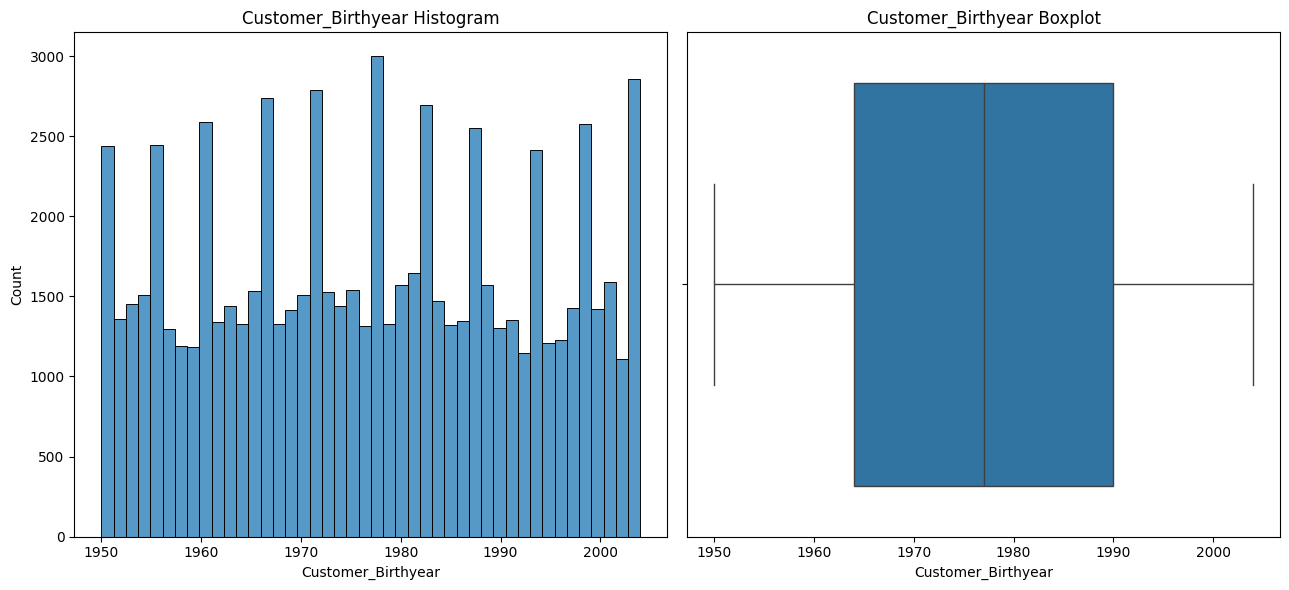

count    74824.000000
mean      1977.044357
std         15.674182
min       1950.000000
25%       1964.000000
50%       1977.000000
75%       1990.000000
max       2004.000000
Name: Customer_Birthyear, dtype: float64

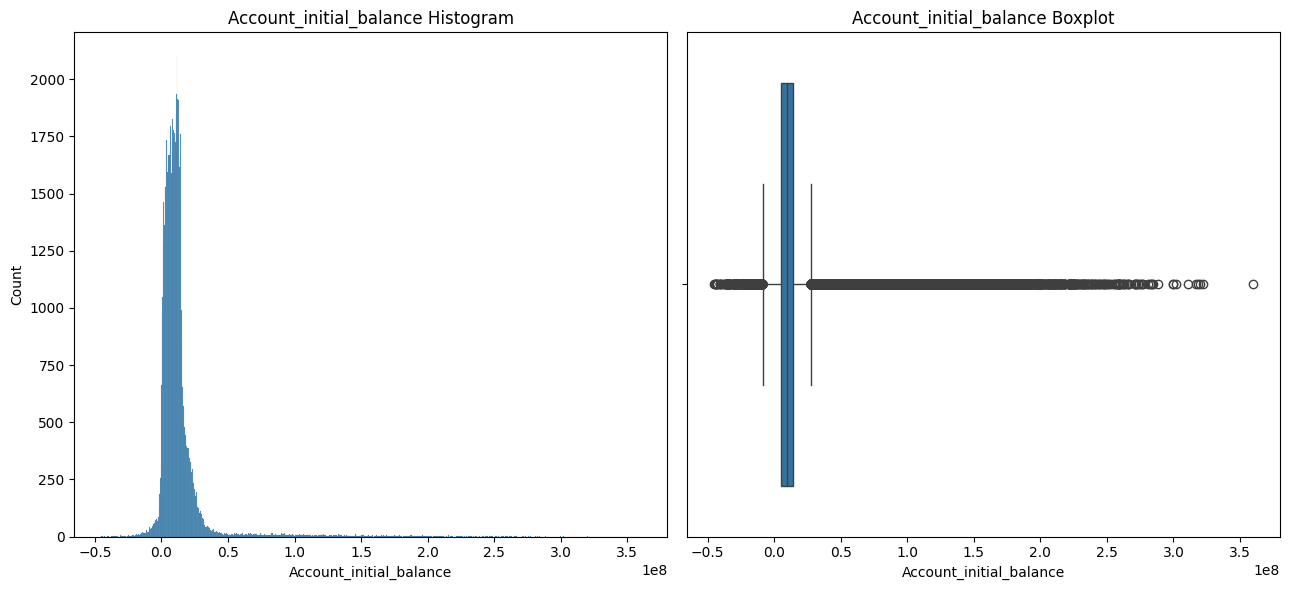

count    7.482400e+04
mean     1.319566e+07
std      2.180704e+07
min     -4.515758e+07
25%      4.916749e+06
50%      9.599988e+06
75%      1.403302e+07
max      3.598649e+08
Name: Account_initial_balance, dtype: float64

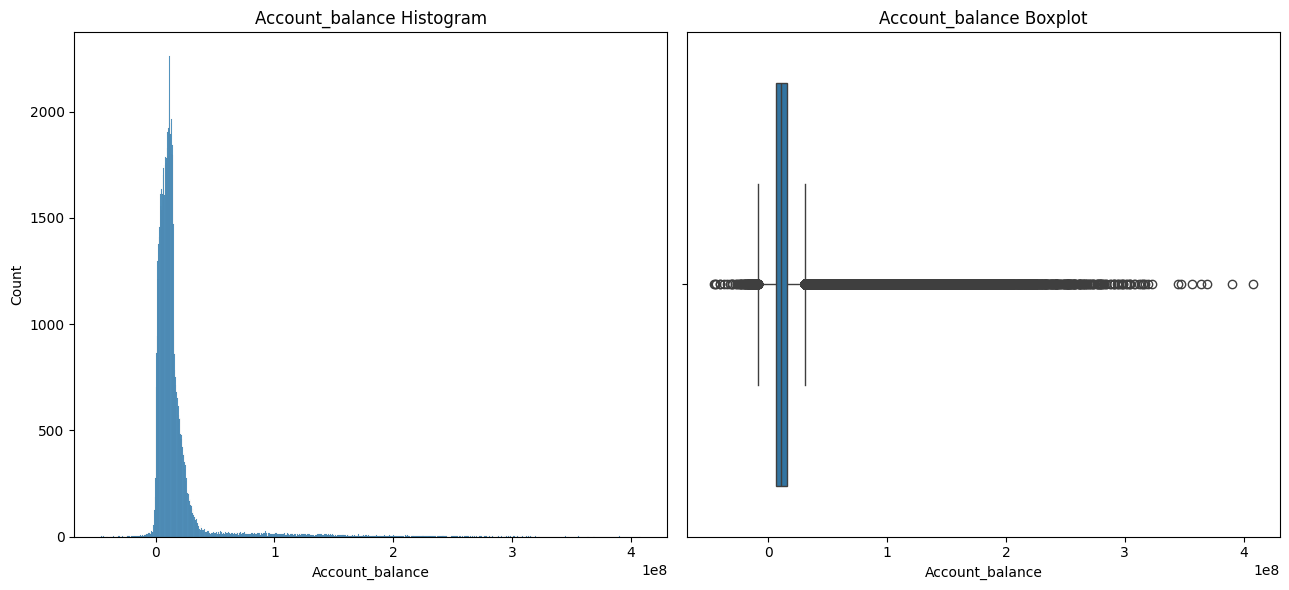

count    7.482400e+04
mean     1.653770e+07
std      2.707135e+07
min     -4.575656e+07
25%      6.087780e+06
50%      1.092612e+07
75%      1.582304e+07
max      4.080248e+08
Name: Account_balance, dtype: float64

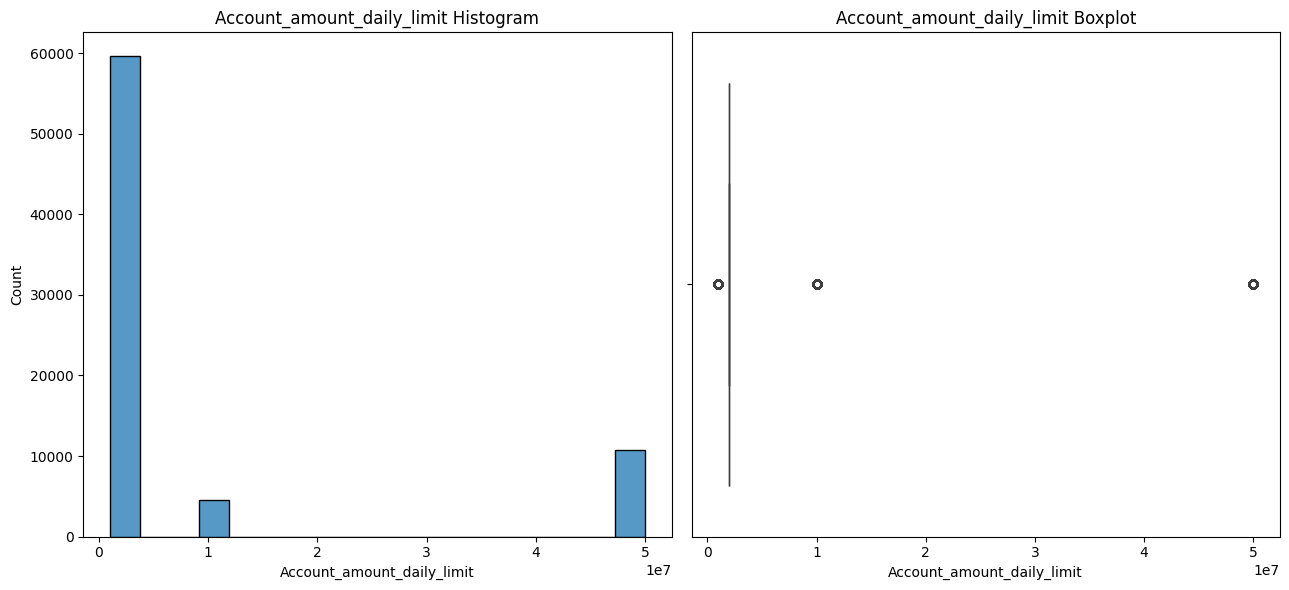

count    7.482400e+04
mean     9.101639e+06
std      1.681940e+07
min      1.000000e+06
25%      2.000000e+06
50%      2.000000e+06
75%      2.000000e+06
max      5.000000e+07
Name: Account_amount_daily_limit, dtype: float64

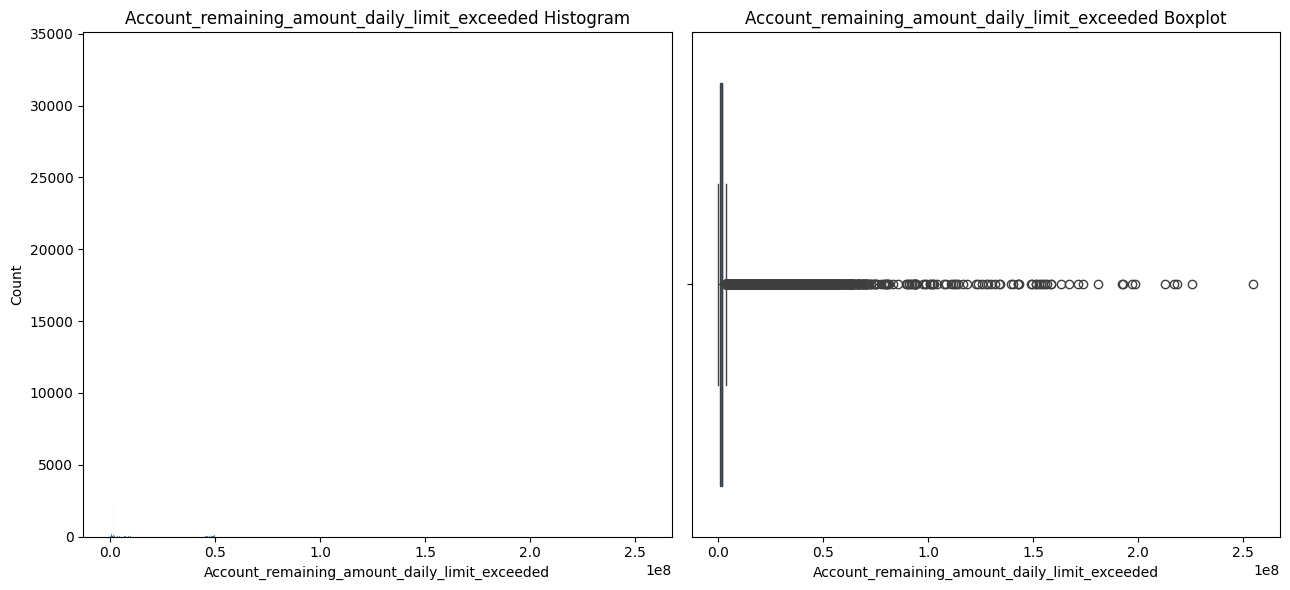

count    7.482400e+04
mean     8.871490e+06
std      1.685996e+07
min      0.000000e+00
25%      1.000000e+06
50%      2.000000e+06
75%      2.000000e+06
max      2.546800e+08
Name: Account_remaining_amount_daily_limit_exceeded, dtype: float64

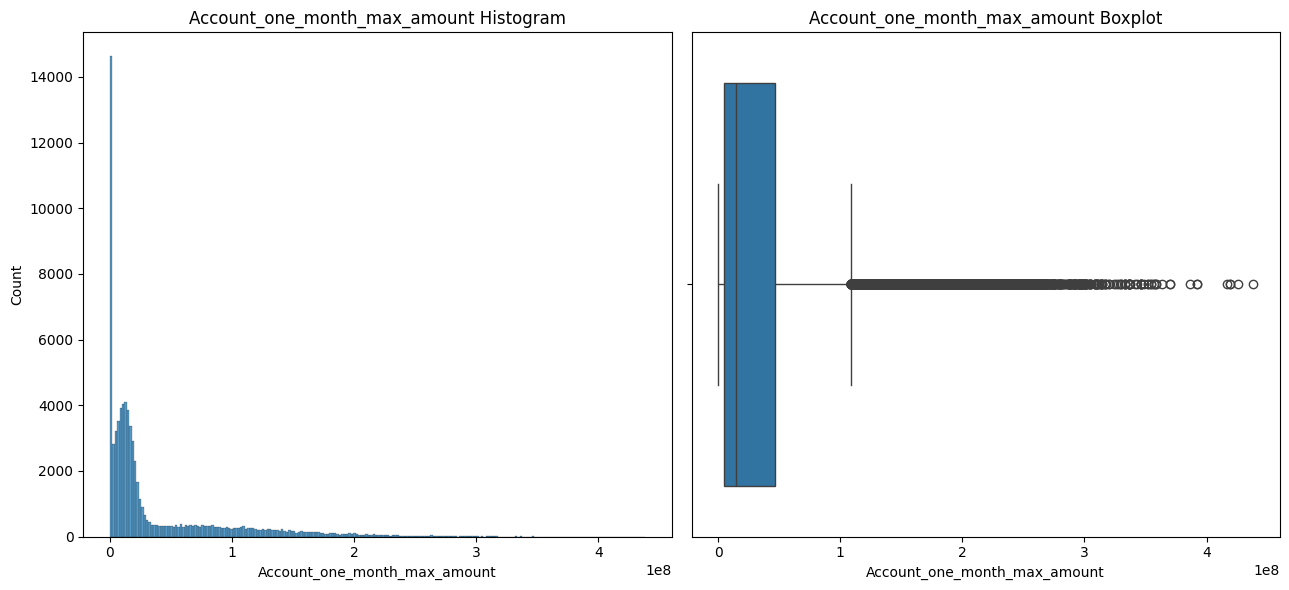

count    7.482400e+04
mean     3.749257e+07
std      5.369510e+07
min      0.000000e+00
25%      4.730000e+06
50%      1.444000e+07
75%      4.637000e+07
max      4.382600e+08
Name: Account_one_month_max_amount, dtype: float64

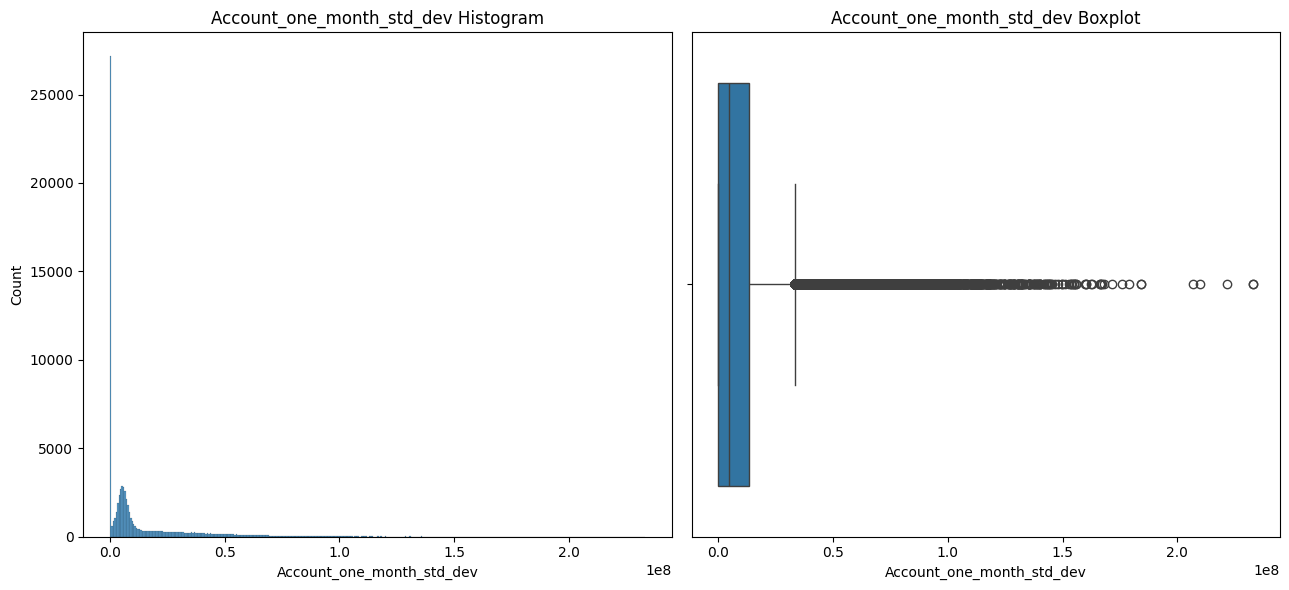

count    7.482400e+04
mean     1.229308e+07
std      1.960515e+07
min      0.000000e+00
25%      0.000000e+00
50%      4.890470e+06
75%      1.328942e+07
max      2.330695e+08
Name: Account_one_month_std_dev, dtype: float64

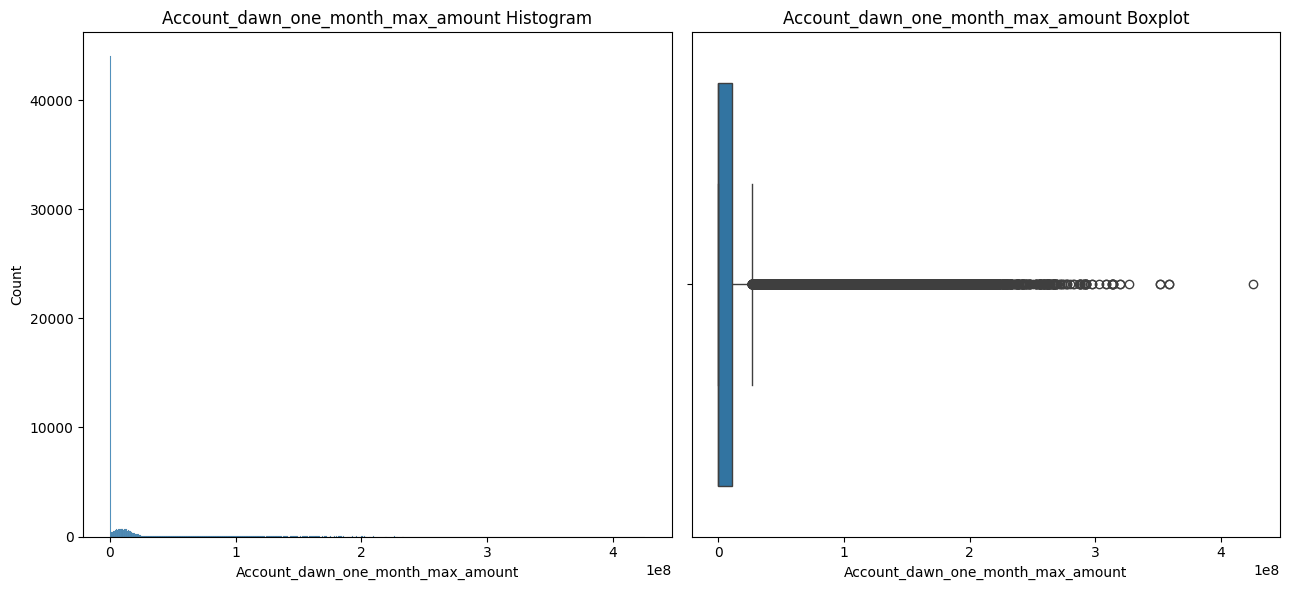

count    7.482400e+04
mean     1.271853e+07
std      3.275010e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.081250e+07
max      4.257800e+08
Name: Account_dawn_one_month_max_amount, dtype: float64

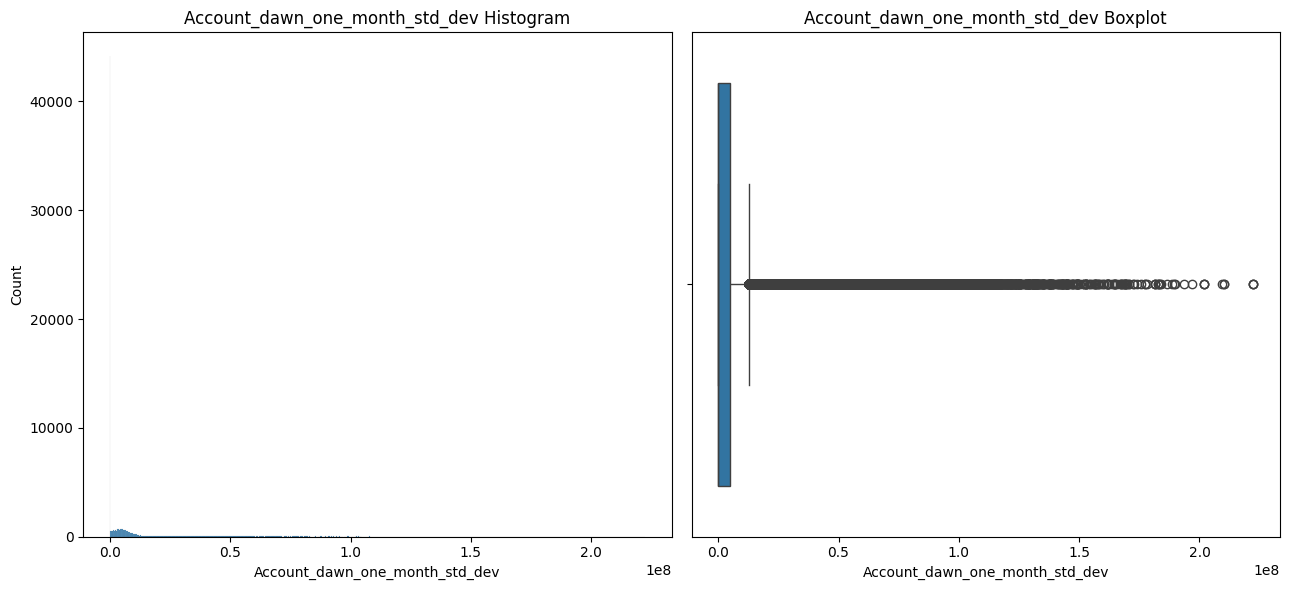

count    7.482400e+04
mean     6.464362e+06
std      1.758895e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      5.039824e+06
max      2.223568e+08
Name: Account_dawn_one_month_std_dev, dtype: float64

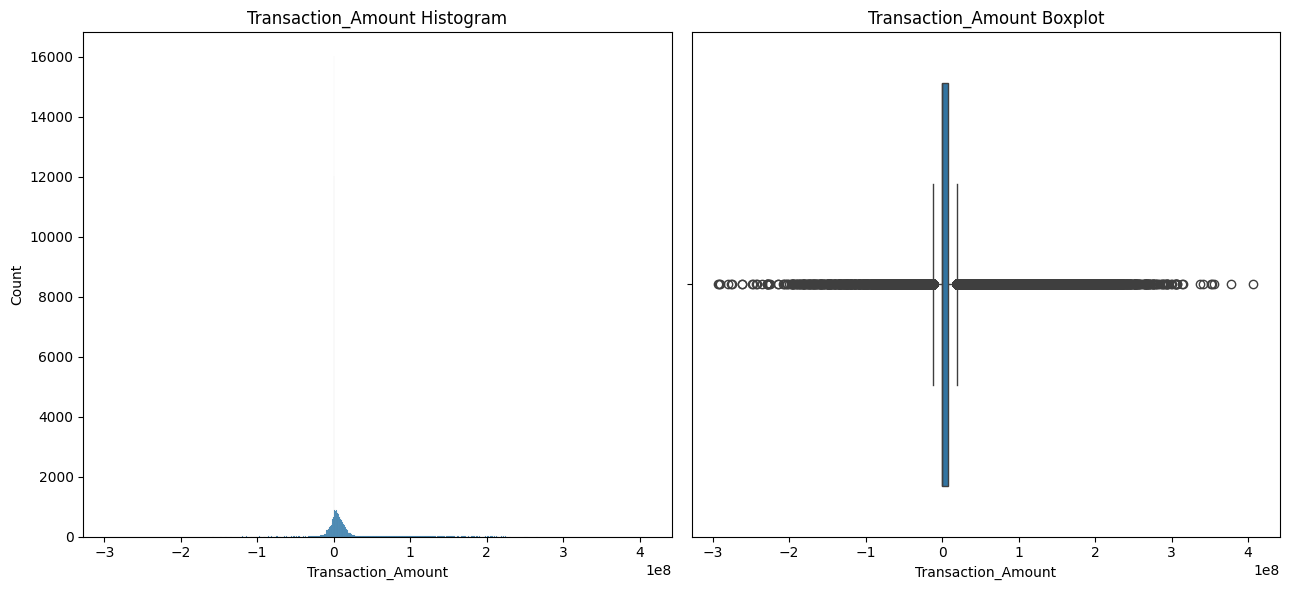

count    7.482400e+04
mean     7.430591e+06
std      2.916464e+07
min     -2.924500e+08
25%     -5.000000e+04
50%      1.600000e+05
75%      7.570000e+06
max      4.066900e+08
Name: Transaction_Amount, dtype: float64

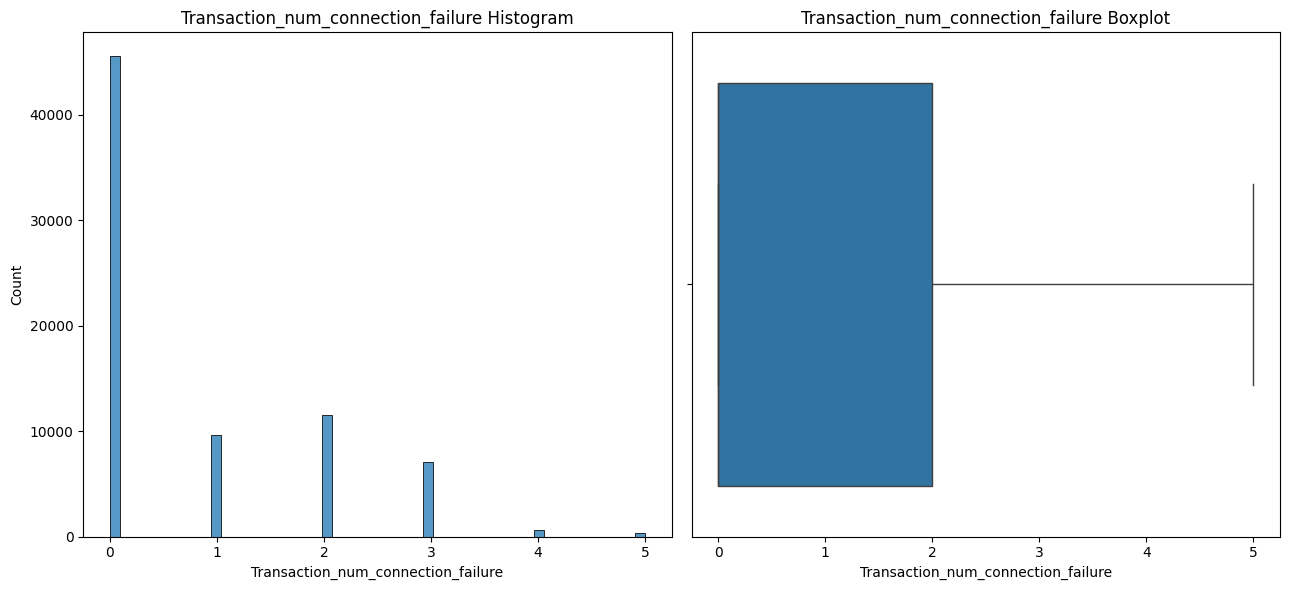

count    74824.000000
mean         0.778280
std          1.112515
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max          5.000000
Name: Transaction_num_connection_failure, dtype: float64

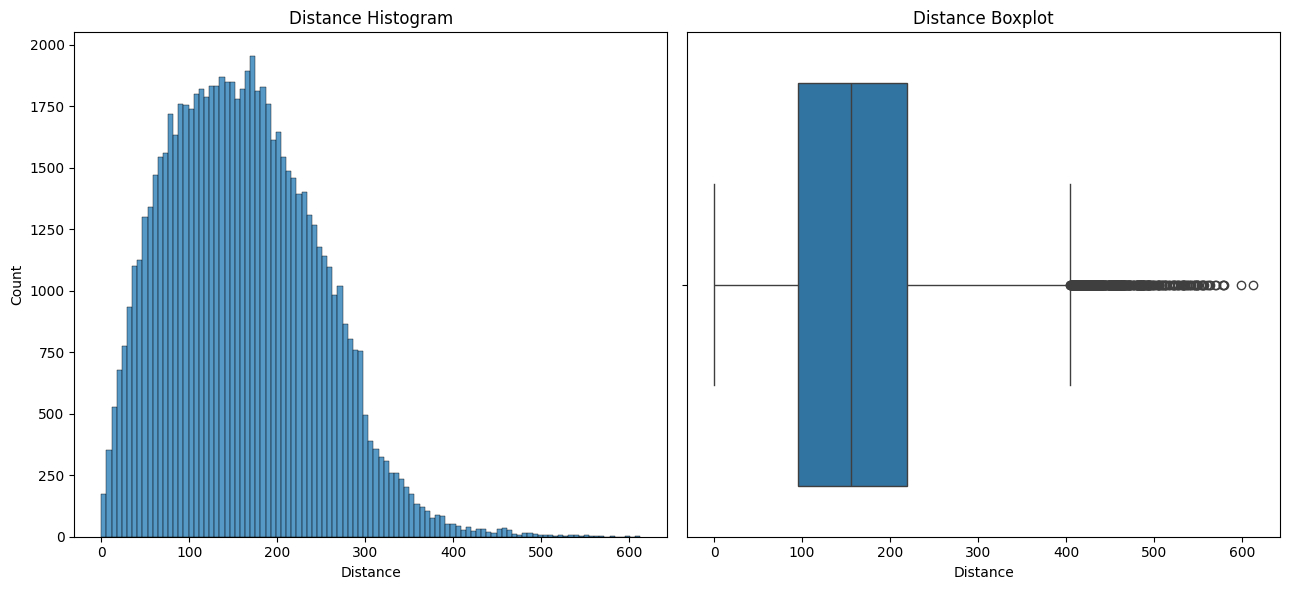

count    74824.000000
mean       161.452977
std         84.308956
min          0.000000
25%         95.746341
50%        155.938628
75%        219.211920
max        612.485680
Name: Distance, dtype: float64

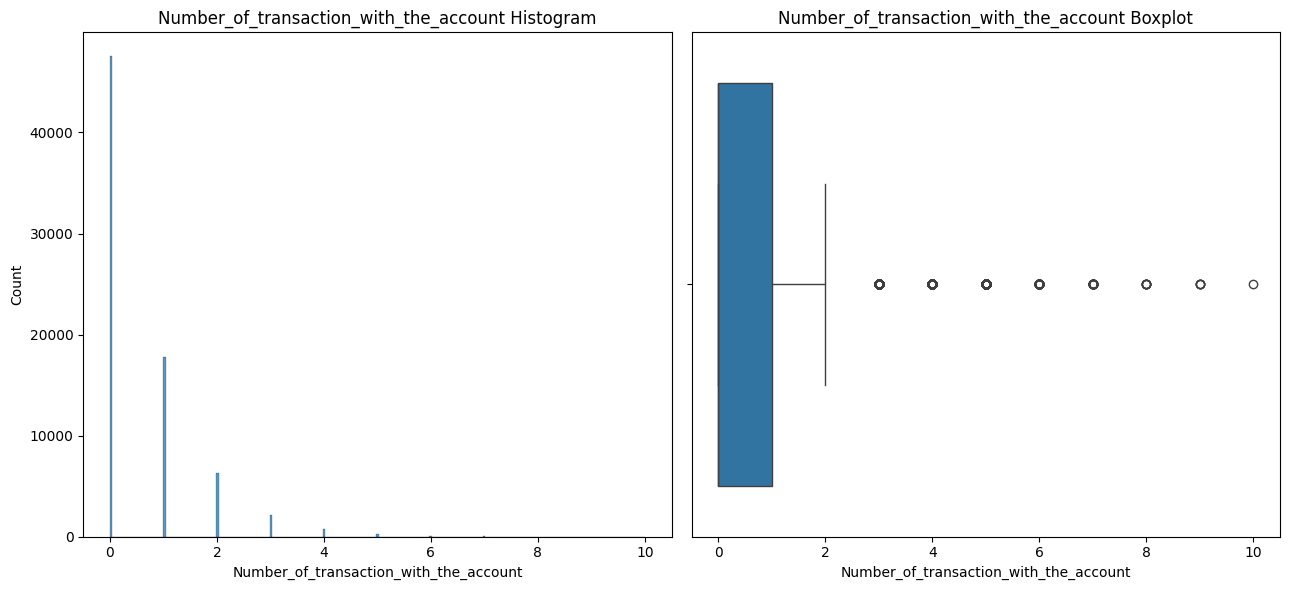

count    74824.000000
mean         0.555811
std          0.906468
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         10.000000
Name: Number_of_transaction_with_the_account, dtype: float64

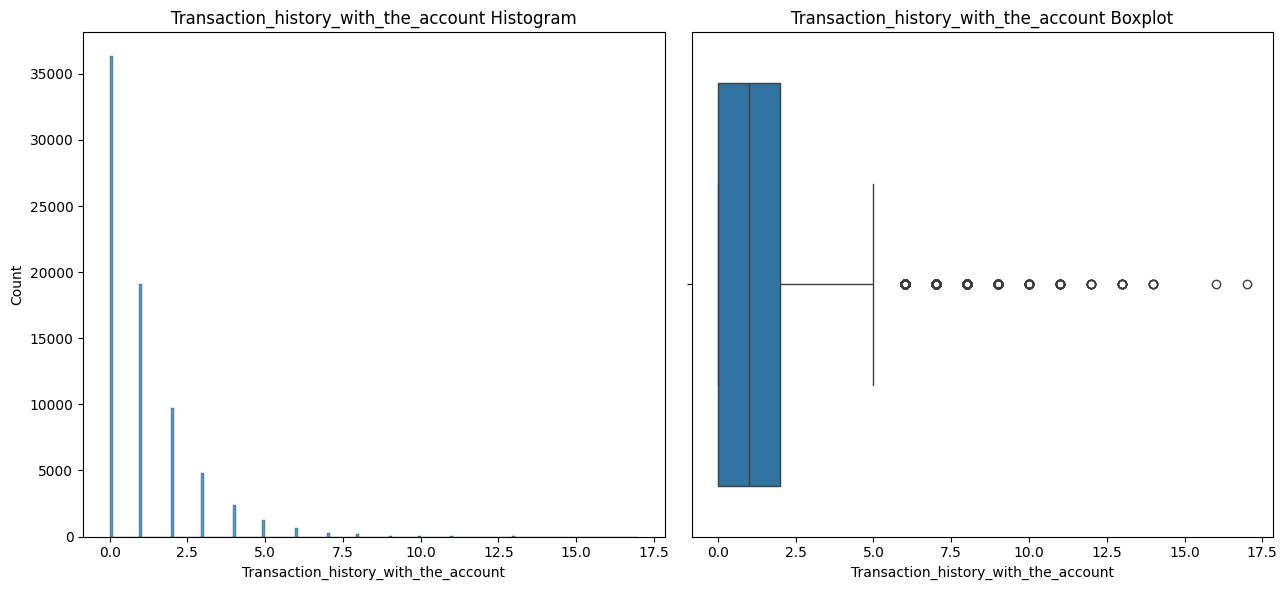

count    74824.000000
mean         1.032490
std          1.428412
min          0.000000
25%          0.000000
50%          1.000000
75%          2.000000
max         17.000000
Name: Transaction_history_with_the_account, dtype: float64

In [23]:
for column, col_type in zip(cond_all['항목명'], cond_all['데이터 형태']):

    if col_type == '수치형' and column != 'Time_difference':

       fig, ax = plt.subplots(ncols=2, figsize=(13, 6))

       sns.histplot(data=train_all,
                    x=column,
                    ax=ax[0])
       ax[0].set_title(f'{column} Histogram')

       sns.boxplot(data=train_all,
                   x=column,
                   ax=ax[1])
       ax[1].set_title(f'{column} Boxplot')

       plt.tight_layout()
       plt.show()

       print()
       display(train_all[column].describe())
       print()

In [24]:
def date_tempo(start_date, end_date, tempo):

    start_date = datetime.strptime(start_date, '%Y-%m-%d')
    end_date = datetime.strptime(end_date, '%Y-%m-%d')

    date_list = []
    current_date = start_date
    while current_date <= end_date:
        date_list.append(str(current_date.strftime("%Y-%m-%d")))
        current_date += timedelta(days=1)

    date_list = pd.to_datetime(date_list)
    return date_list[::tempo]

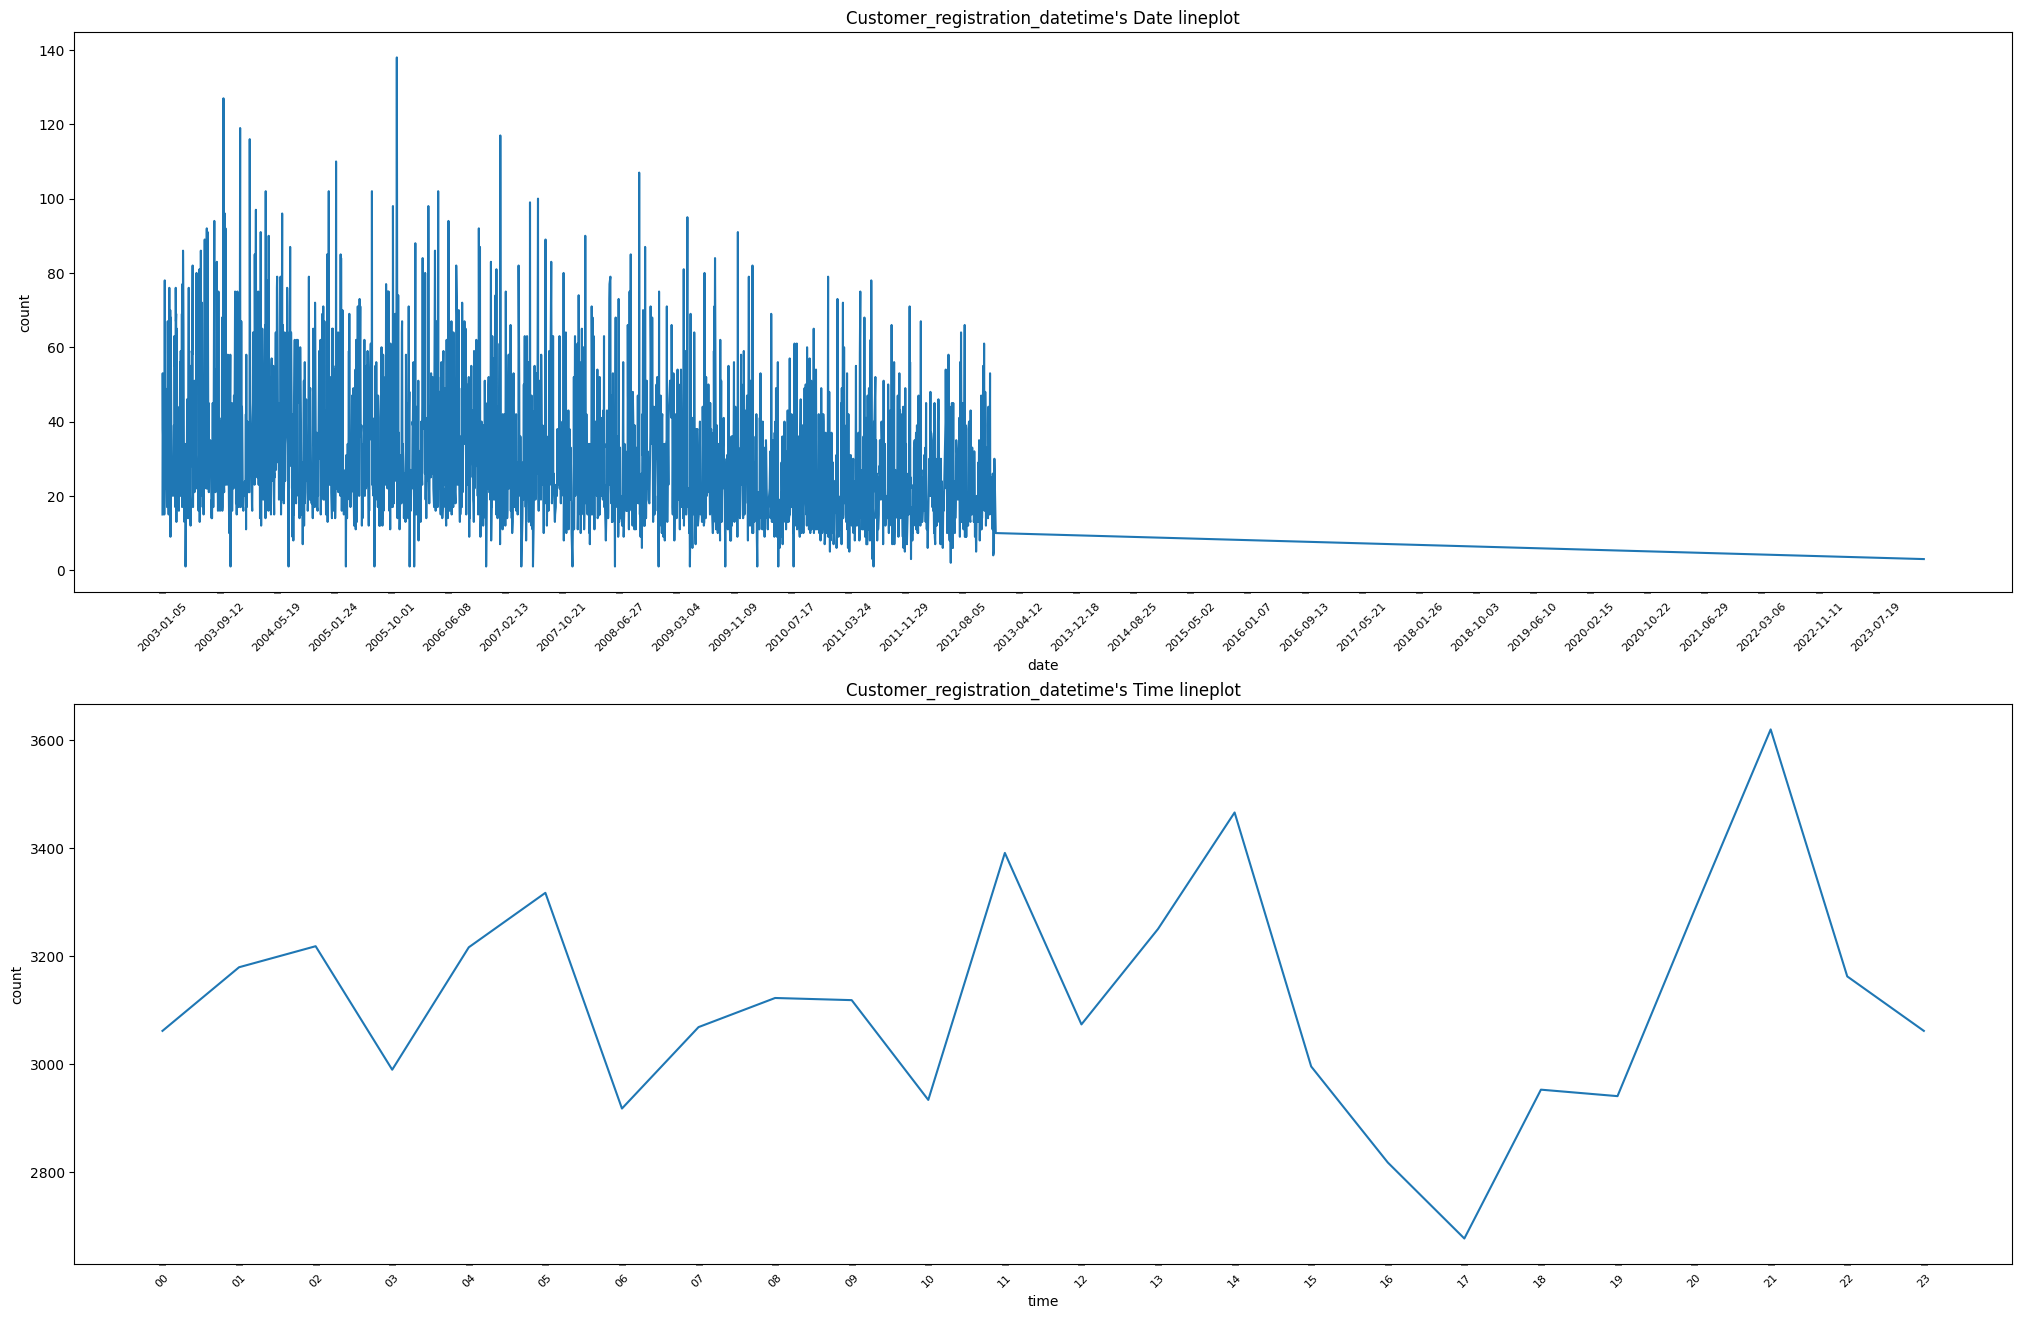

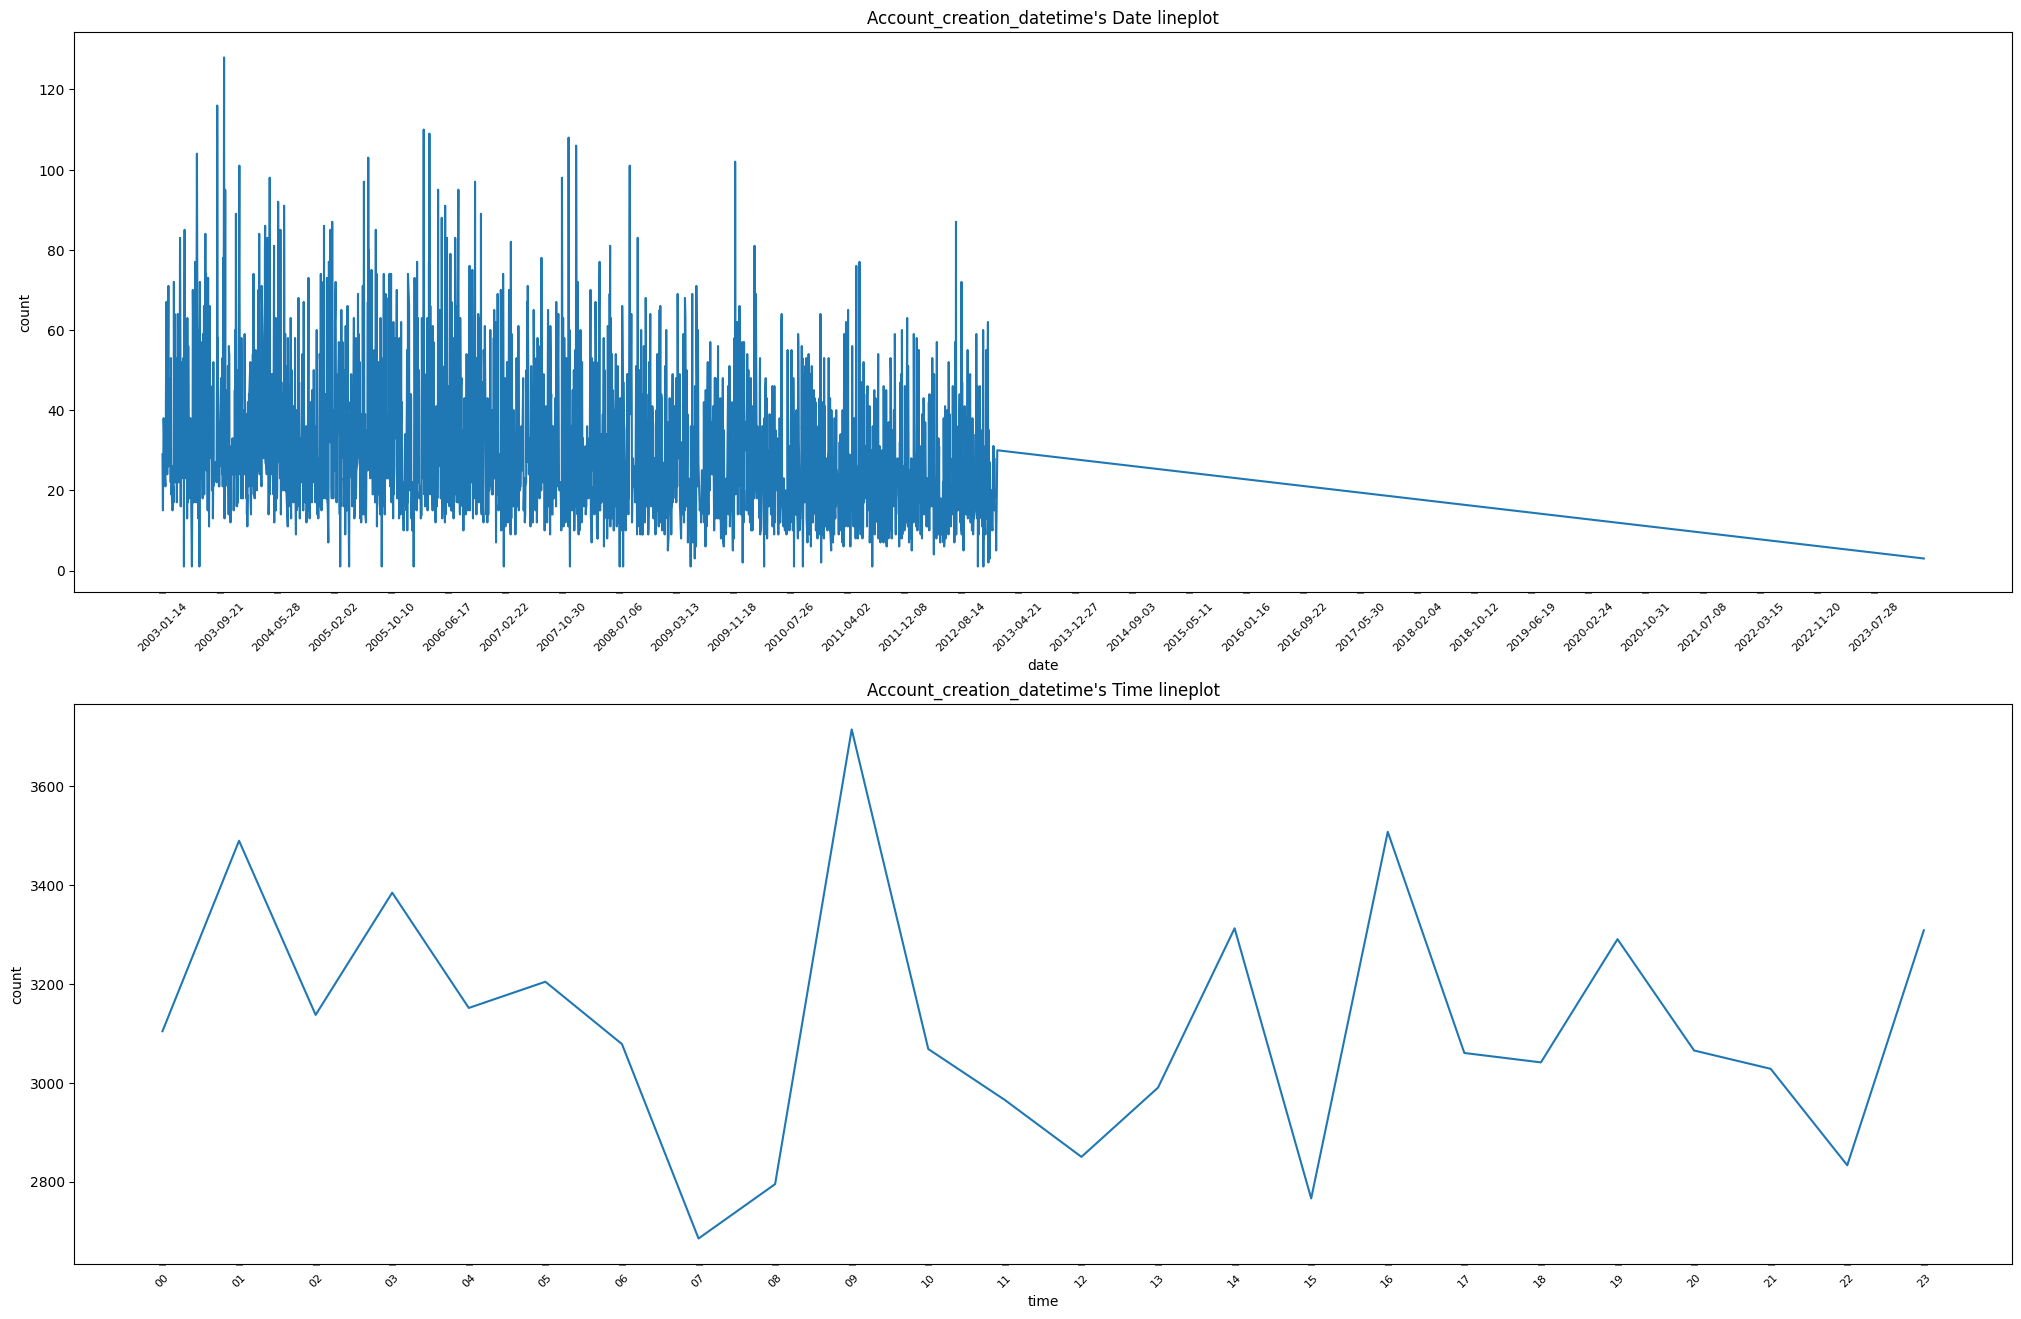

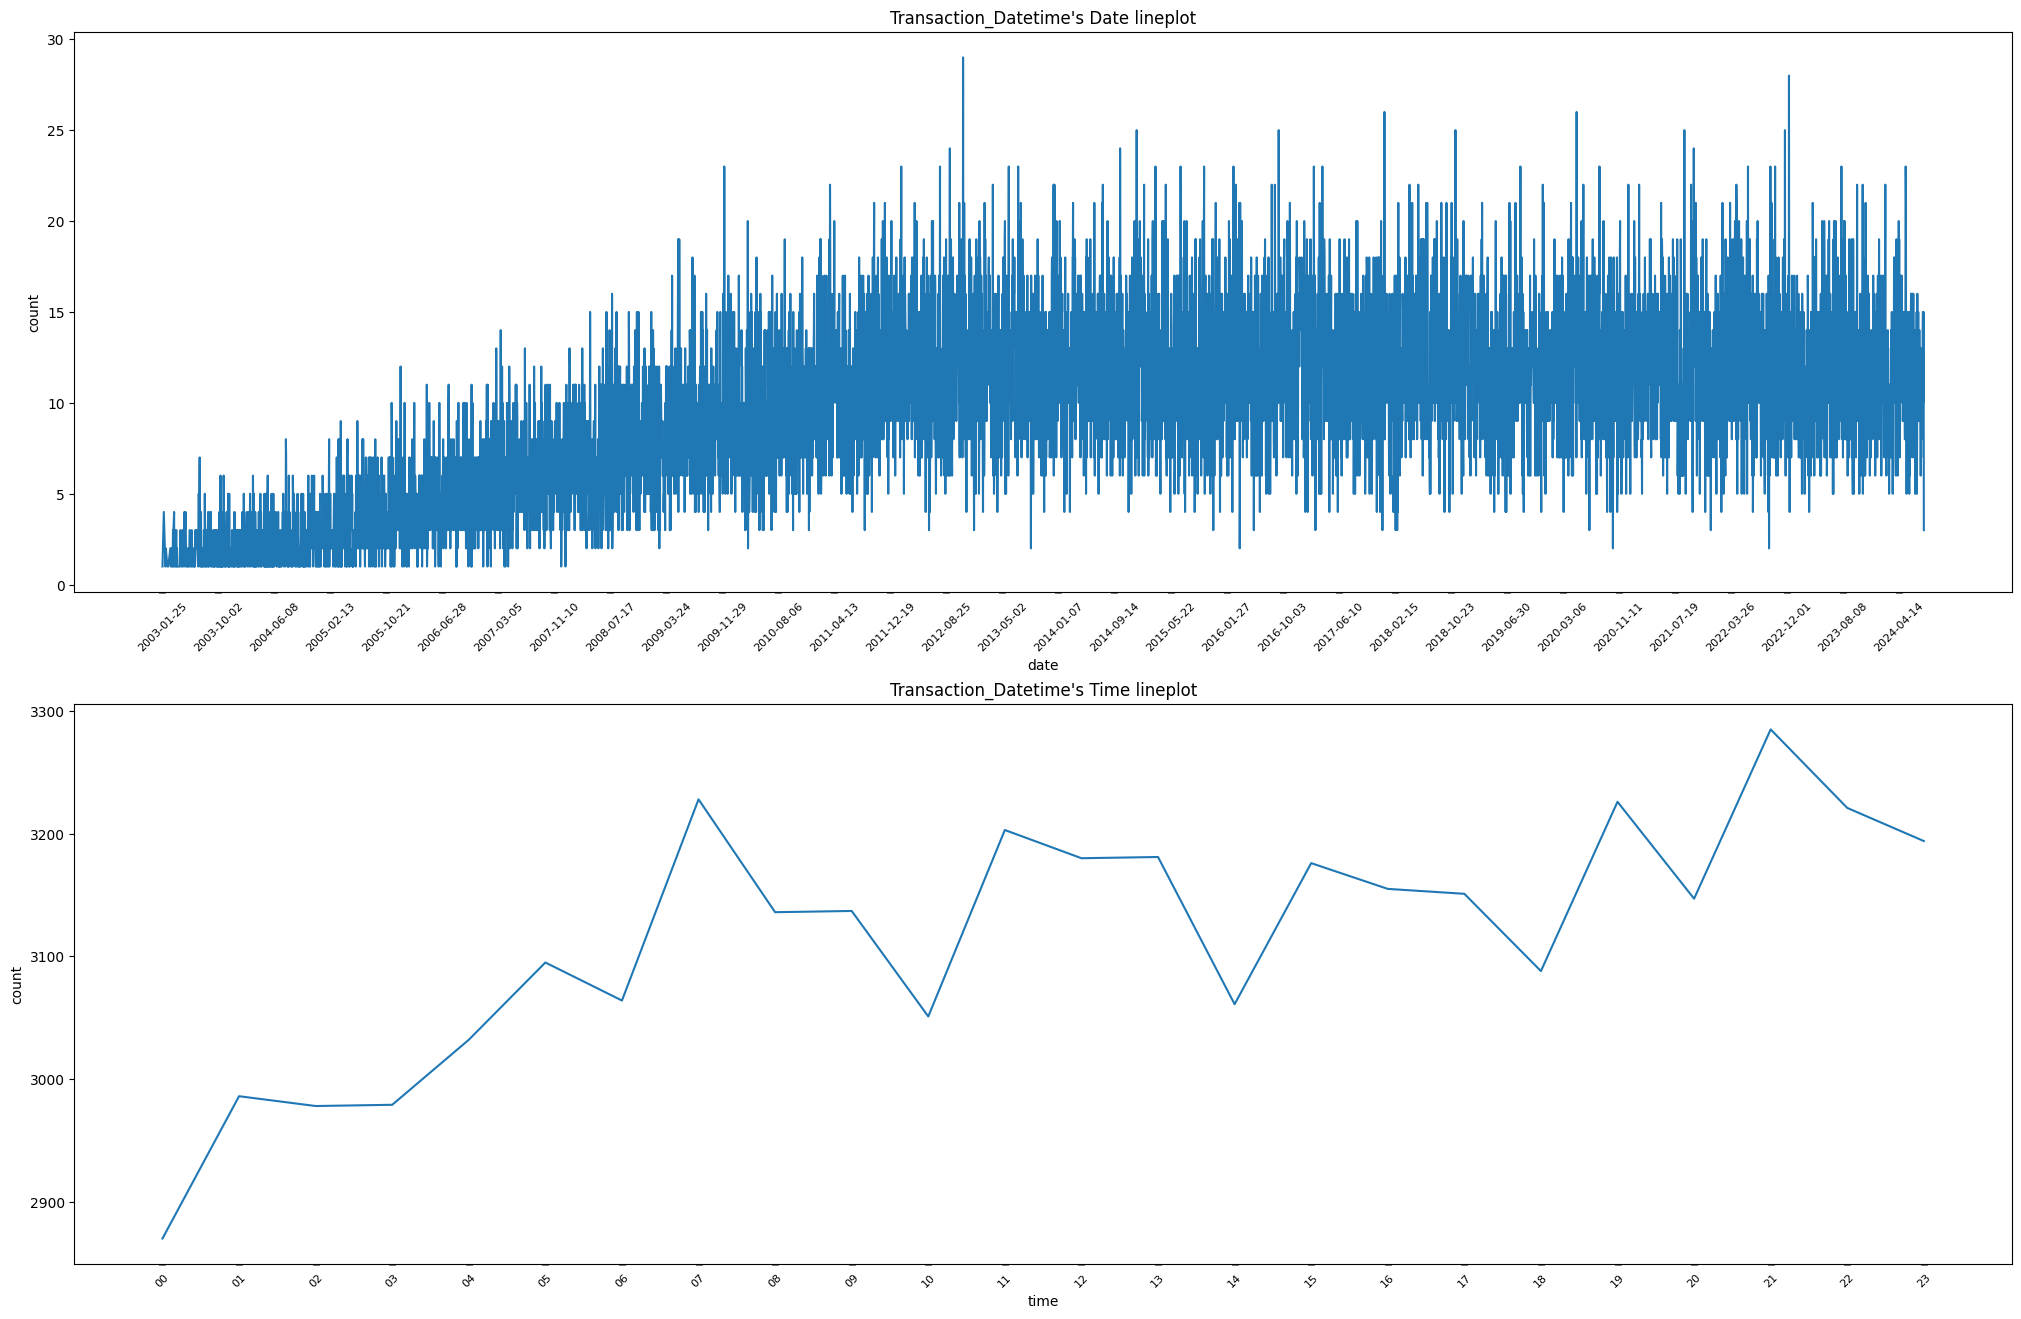

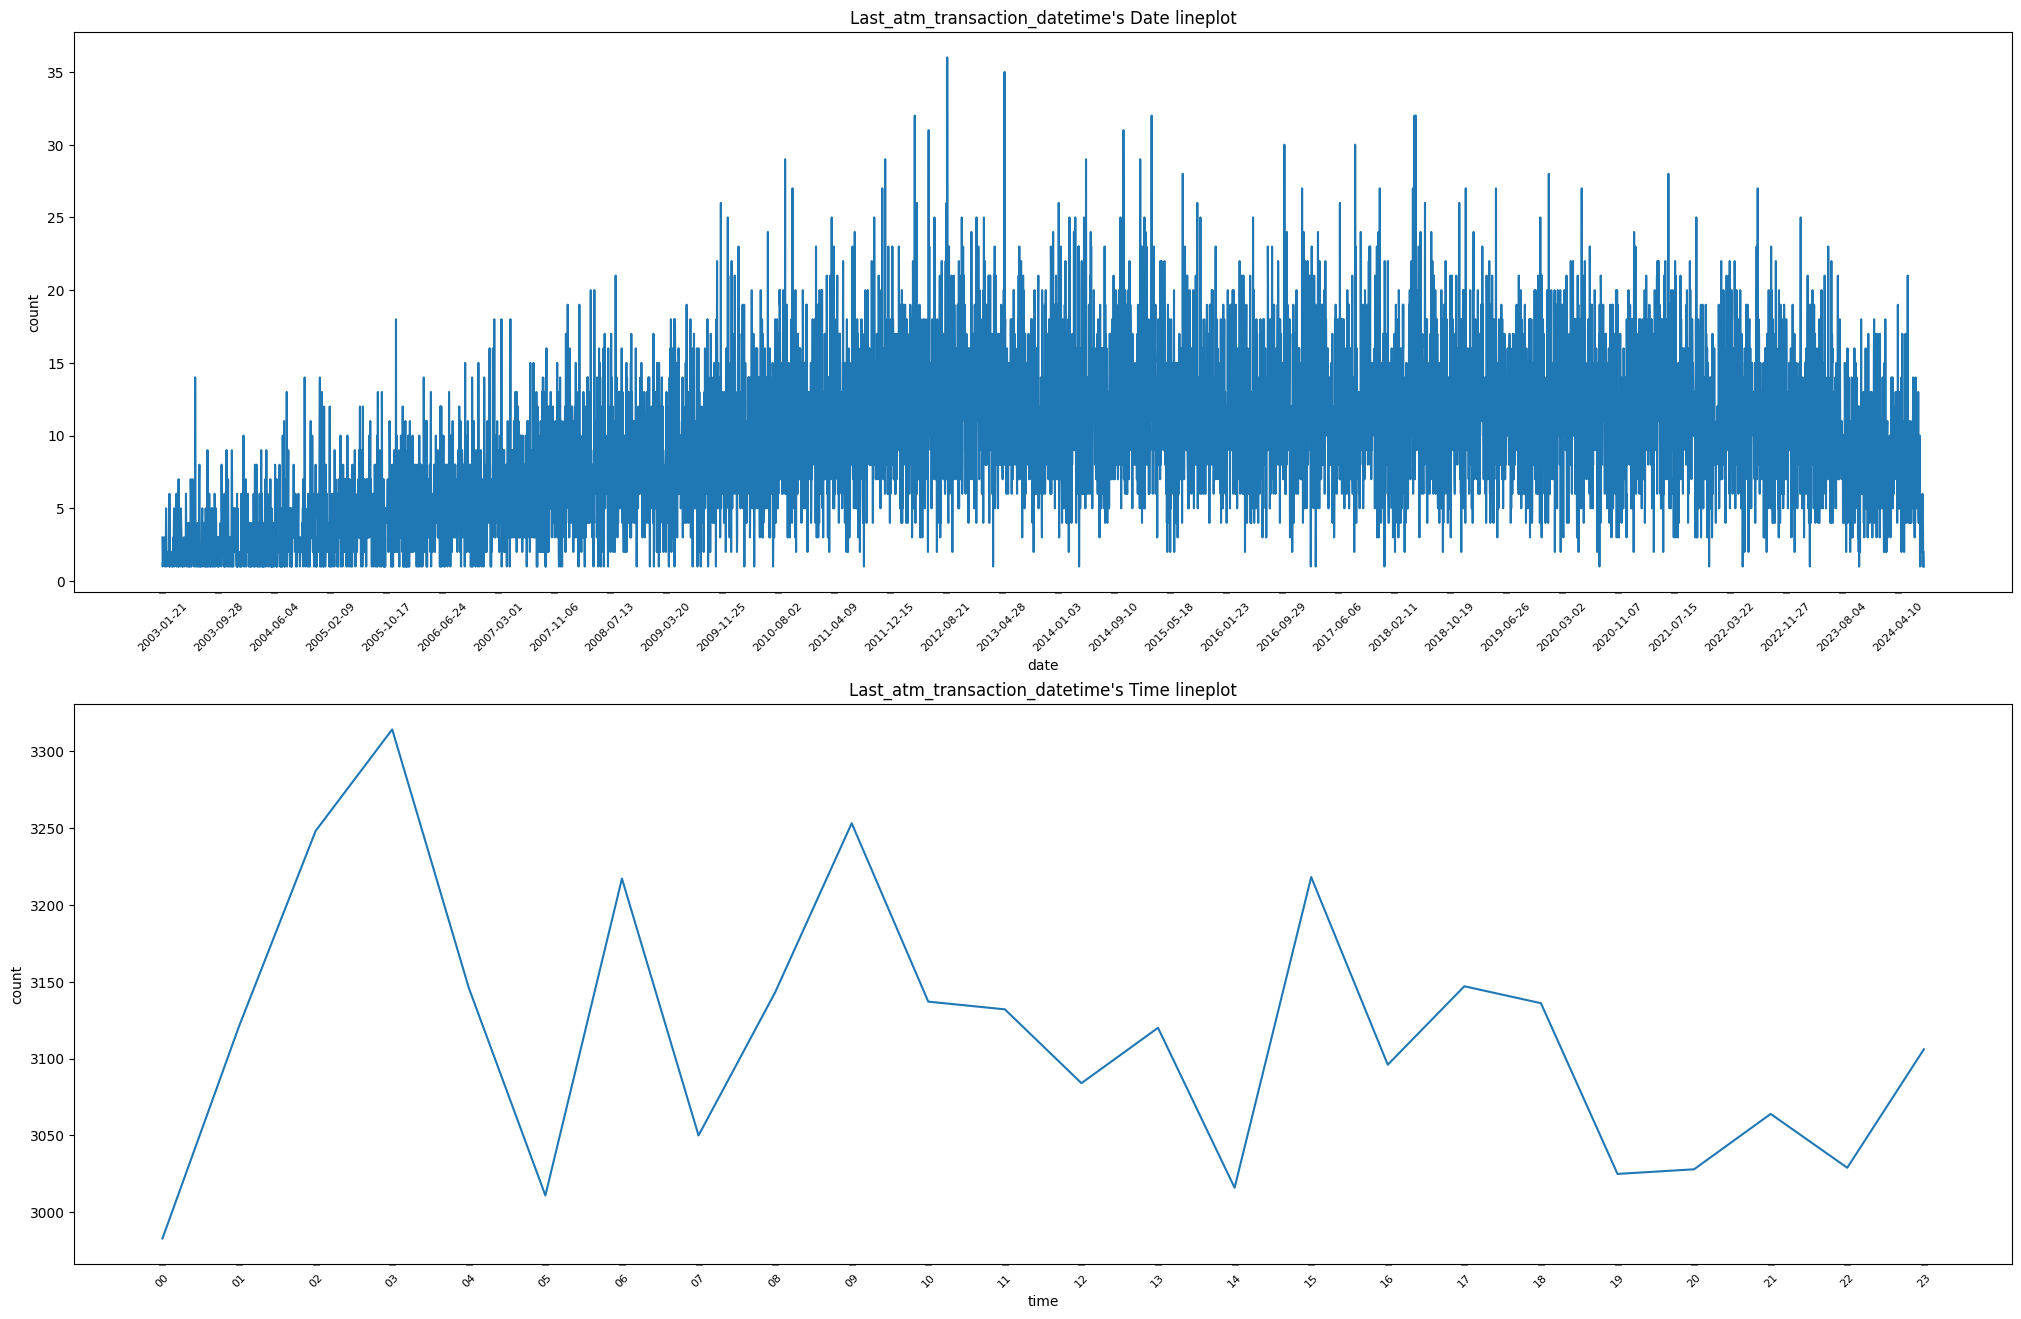

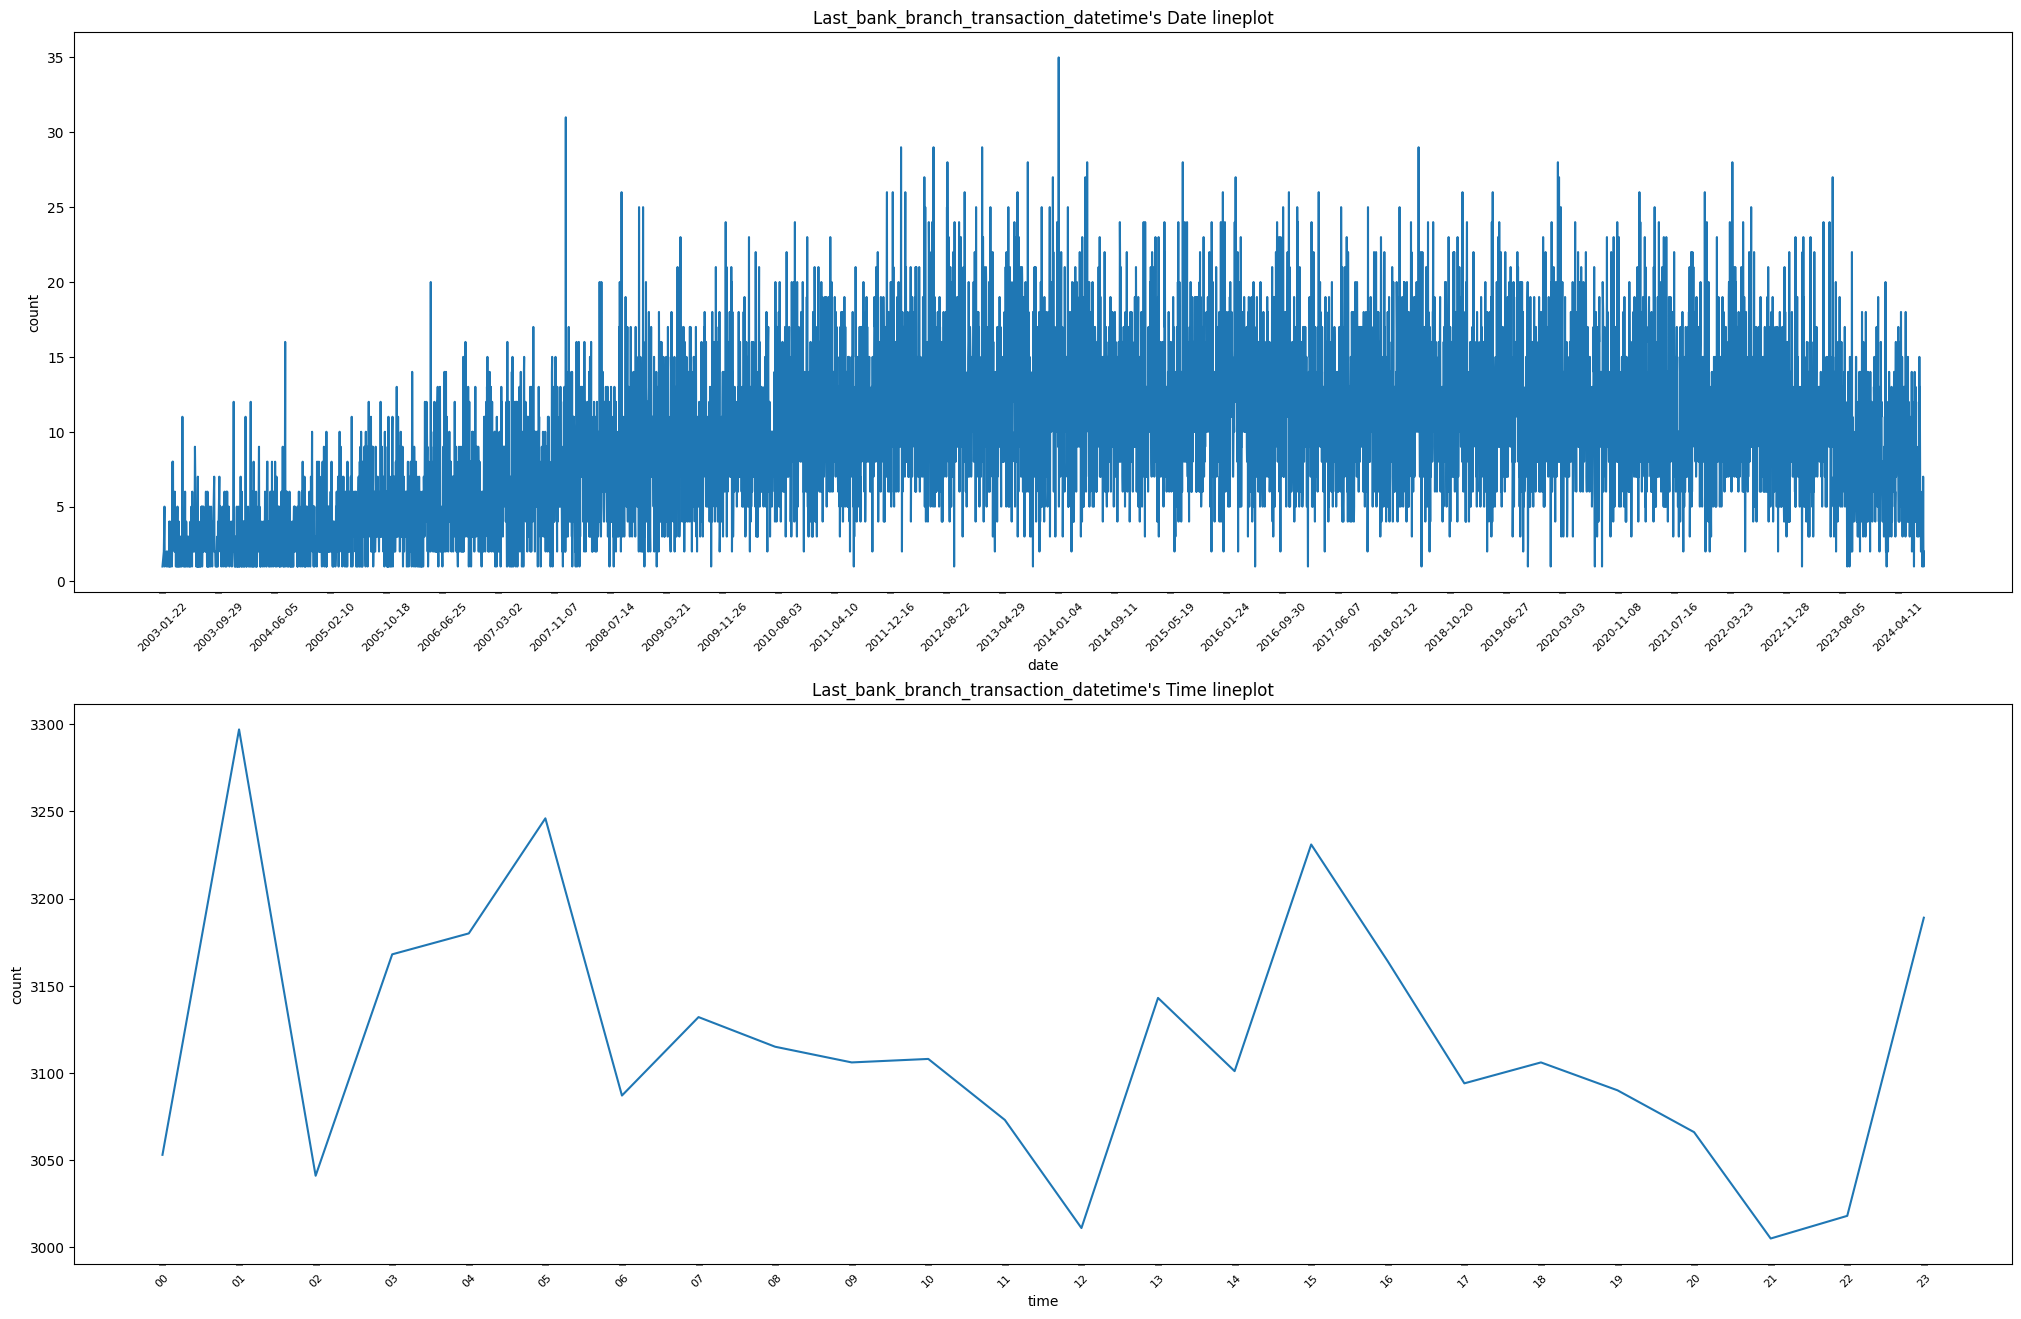

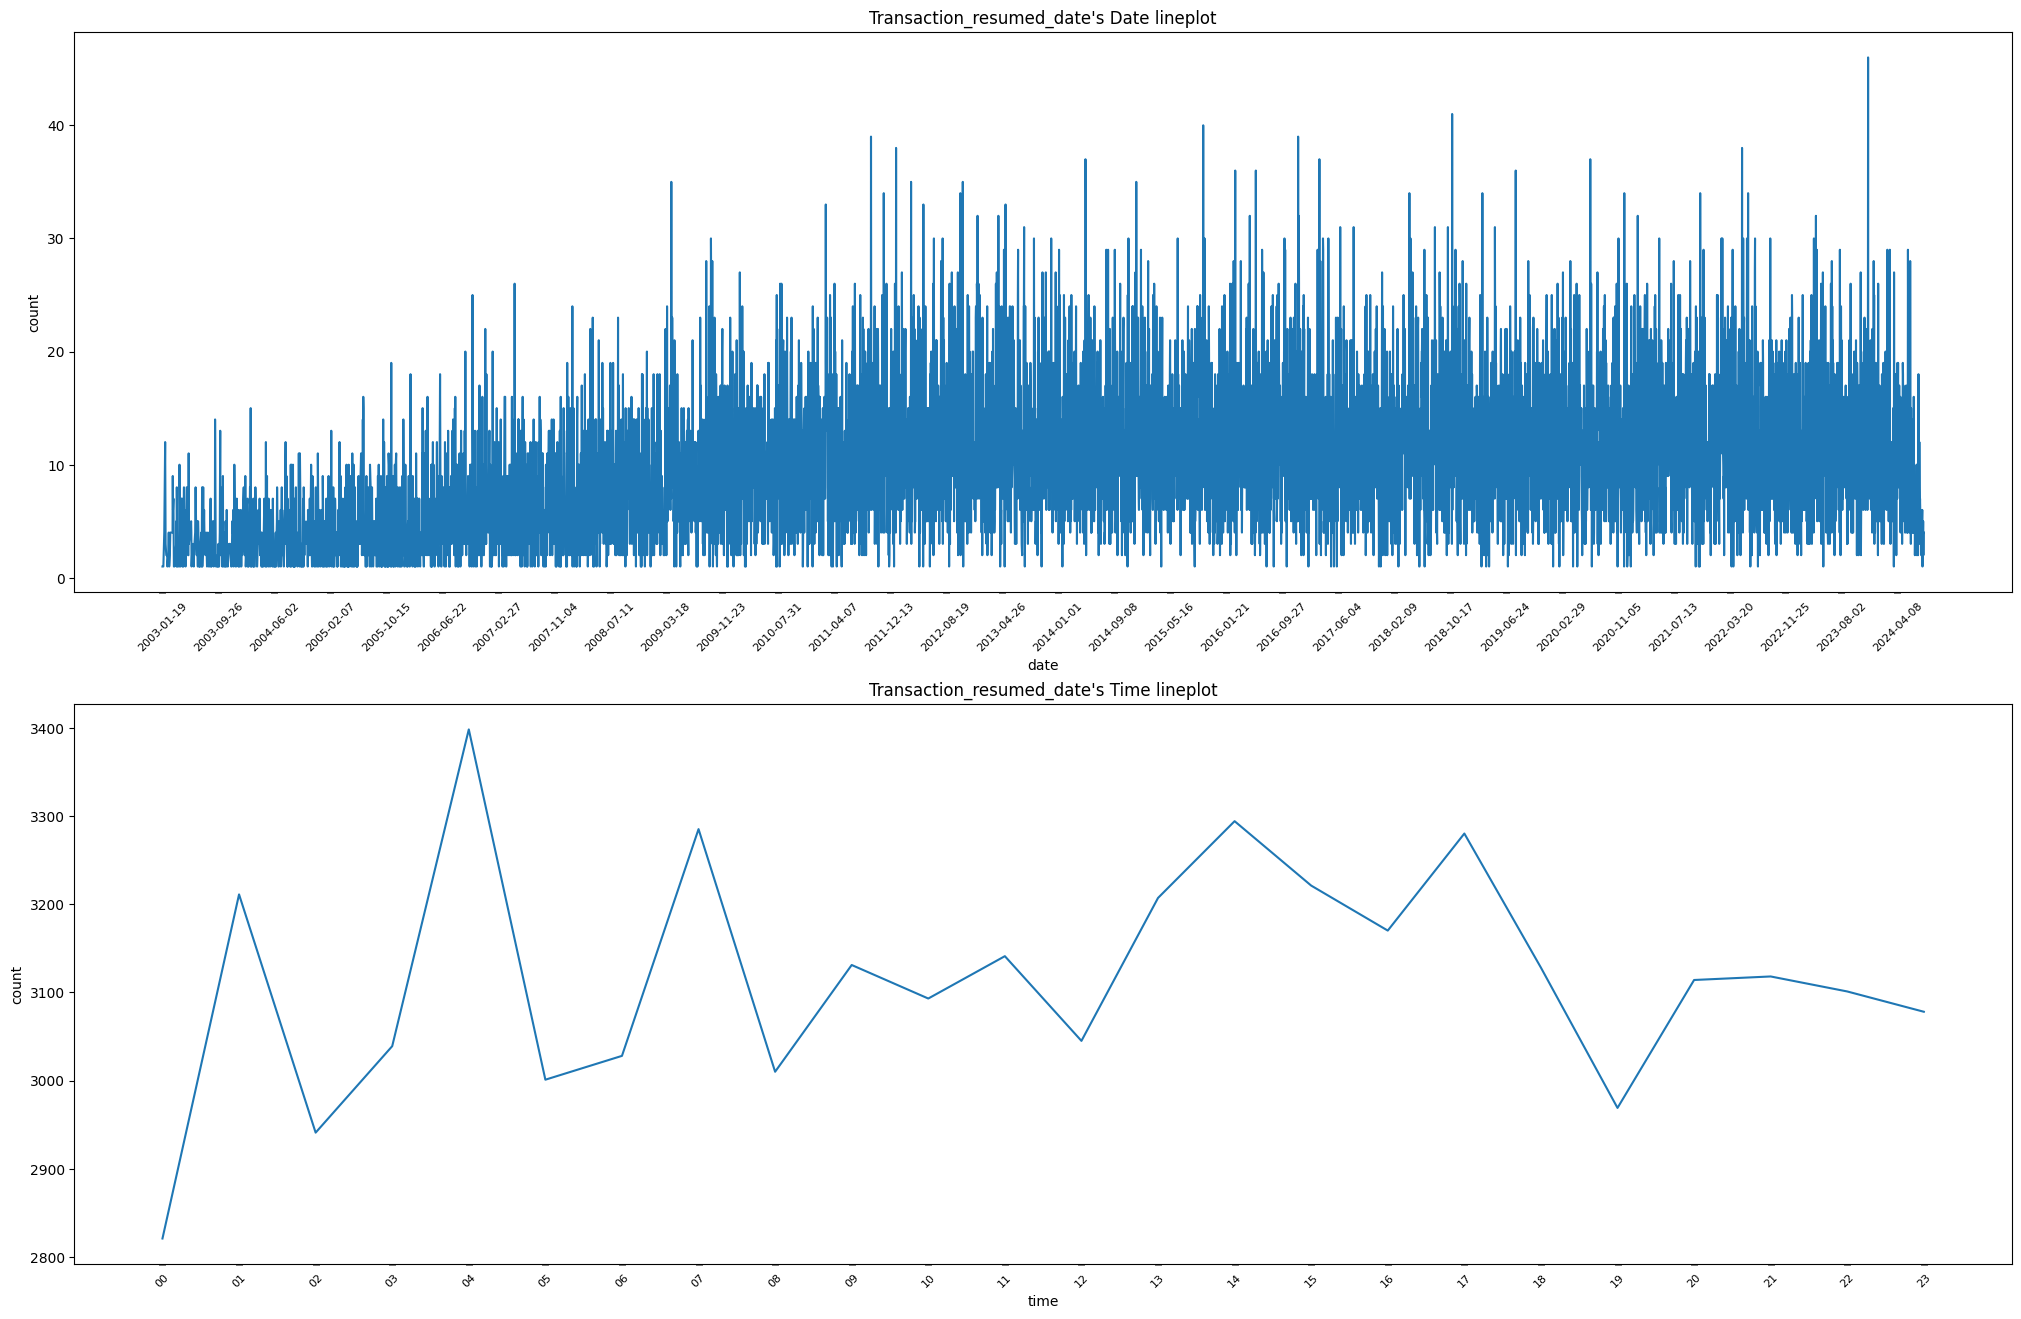

In [28]:
list_time_columns = ['Customer_registration_datetime',
                     'Account_creation_datetime',
                     'Transaction_Datetime',
                     'Last_atm_transaction_datetime',
                     'Last_bank_branch_transaction_datetime',
                     'Transaction_resumed_date']

for column in list_time_columns:

    # 날짜 열을 datetime 형식으로 변환
    train_all[column] = pd.to_datetime(train_all[column], errors='coerce')

    # 날짜와 시간을 추출
    train_all['date'] = train_all[column].dt.strftime('%Y-%m-%d')
    train_all['time'] = train_all[column].dt.strftime('%H')

    date_count = train_all['date'].value_counts().sort_index()
    time_count = train_all['time'].value_counts().sort_index()

    date_count = pd.DataFrame(date_count)
    time_count = pd.DataFrame(time_count)

    list_date = date_tempo(date_count.index[0], date_count.index[-1], 250)

    fig, ax = plt.subplots(nrows=2, figsize=(25, 16))

    sns.lineplot(data=date_count,
                x=pd.to_datetime(date_count.index),
                y='count',
                ax=ax[0])

    ax[0].set_xticks(list_date)

    ax[0].tick_params(axis='x',
                  direction='out',
                  labelrotation=45,
                  length=1,
                  pad=5,
                  labelsize=8,
                  width=5)
    ax[0].set_title(f"{column}'s Date lineplot")

    sns.lineplot(data=time_count,
                x=time_count.index,
                y='count',
                ax=ax[1])

    ax[1].tick_params(axis='x',
                  direction='out',
                  labelrotation=45,
                  length=1,
                  pad=5,
                  labelsize=8,
                  width=5)
    ax[1].set_title(f"{column}'s Time lineplot")

    plt.show()
    print()

    train_all.drop(columns=['date', 'time'], inplace=True)


In [31]:
for column in list_time_columns:
    train_all['year'] = train_all[column].dt.year
    print(f'{column}')
    print(train_all['year'].value_counts().sort_index())
    print()

    train_all.drop(columns=['year'], inplace=True)


Customer_registration_datetime
year
2003    9358
2004    8850
2005    8423
2006    8934
2007    7361
2008    7440
2009    6309
2010    6422
2011    6096
2012    5628
2024       3
Name: count, dtype: int64

Account_creation_datetime
year
2003    9137
2004    8580
2005    8654
2006    8820
2007    7402
2008    7403
2009    6348
2010    6539
2011    6091
2012    5636
2013     211
2024       3
Name: count, dtype: int64

Transaction_Datetime
year
2003     487
2004     813
2005    1292
2006    1688
2007    2149
2008    2670
2009    3144
2010    3448
2011    4041
2012    4458
2013    4470
2014    4416
2015    4437
2016    4479
2017    4224
2018    4460
2019    4247
2020    4313
2021    4368
2022    4421
2023    4308
2024    2491
Name: count, dtype: int64

Last_atm_transaction_datetime
year
2003     651
2004    1011
2005    1516
2006    1829
2007    2357
2008    2819
2009    3221
2010    3755
2011    4204
2012    4630
2013    4534
2014    4428
2015    4449
2016    4293
2017    4386
2018    441

In [32]:
train_all['Time_difference_seconds'] = pd.to_timedelta(train_all['Time_difference']).dt.total_seconds()
train_all['Time_difference_seconds'] = train_all['Time_difference_seconds'].astype(int)

train_all_positive = train_all[train_all['Time_difference_seconds'] > 0]
train_all_negative = train_all[train_all['Time_difference_seconds'] < 0]

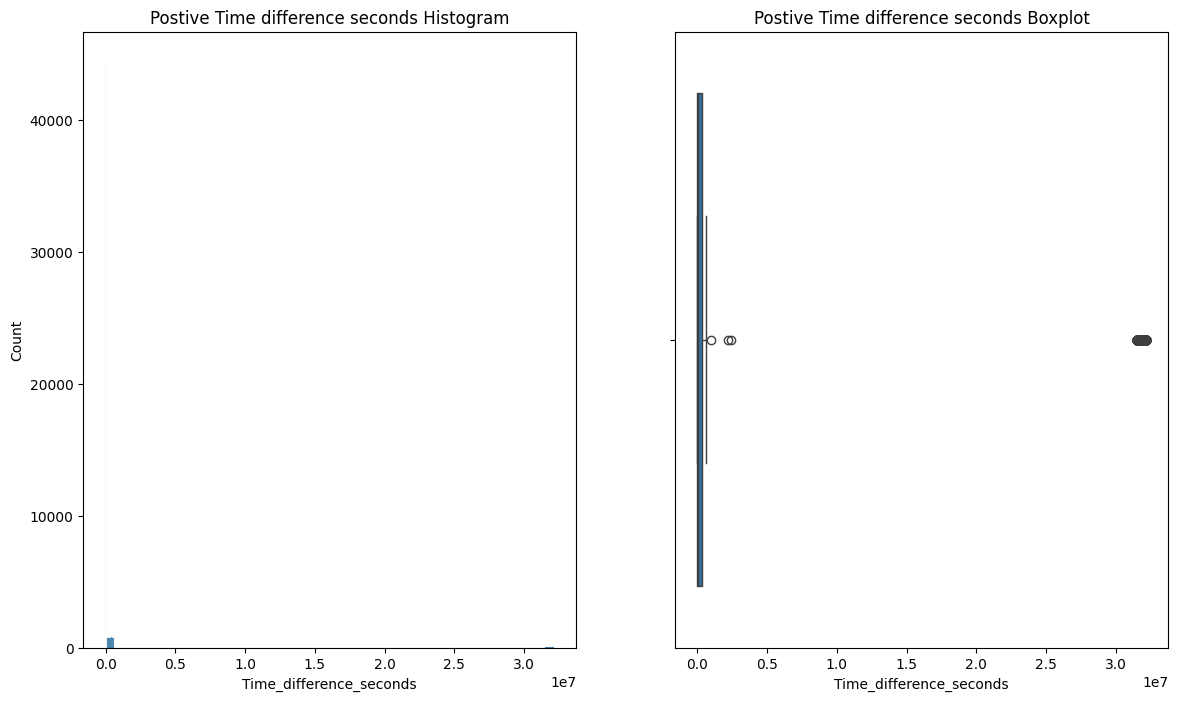

Time_difference_seconds
count             7.466800e+04
mean              1.292440e+06
std               5.946972e+06
min               6.000000e+01
25%               4.740000e+03
50%               9.208000e+03
75%               3.054808e+05
max               3.214062e+07

In [33]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 8))

sns.histplot(data=train_all_positive,
             x='Time_difference_seconds',
             ax=ax[0])

ax[0].set_title(f"Postive Time difference seconds Histogram")

sns.boxplot(data=train_all_positive,
             x='Time_difference_seconds',
             ax=ax[1])

ax[1].set_title(f"Postive Time difference seconds Boxplot")

plt.show()

display(train_all_positive[['Time_difference_seconds']].describe())

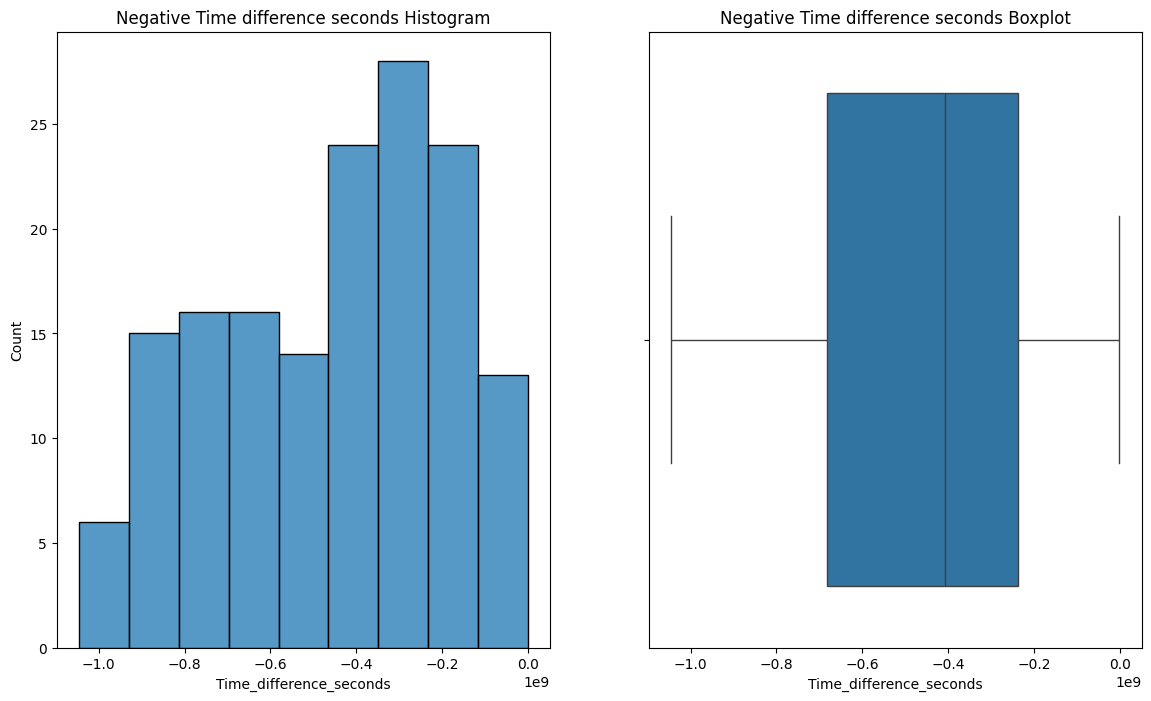

Time_difference_seconds
count             1.560000e+02
mean             -4.562225e+08
std               2.677275e+08
min              -1.045256e+09
25%              -6.816409e+08
50%              -4.072373e+08
75%              -2.378106e+08
max              -3.671010e+05

In [34]:
fig, ax = plt.subplots(ncols=2, figsize=(14, 8))

sns.histplot(data=train_all_negative,
             x='Time_difference_seconds',
             ax=ax[0])

ax[0].set_title(f"Negative Time difference seconds Histogram")

sns.boxplot(data=train_all_negative,
             x='Time_difference_seconds',
             ax=ax[1])

ax[1].set_title(f"Negative Time difference seconds Boxplot")

plt.show()

display(train_all_negative[['Time_difference_seconds']].describe())

In [35]:
q3 = train_all_positive['Time_difference_seconds'].quantile(0.75)
q1 = train_all_positive['Time_difference_seconds'].quantile(0.25)

iqr = q3 - q1

upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

train_all_positive_outlier = train_all_positive[(train_all_positive['Time_difference_seconds'] >= upper_bound)]
print(train_all_positive_outlier.shape[0])

2727


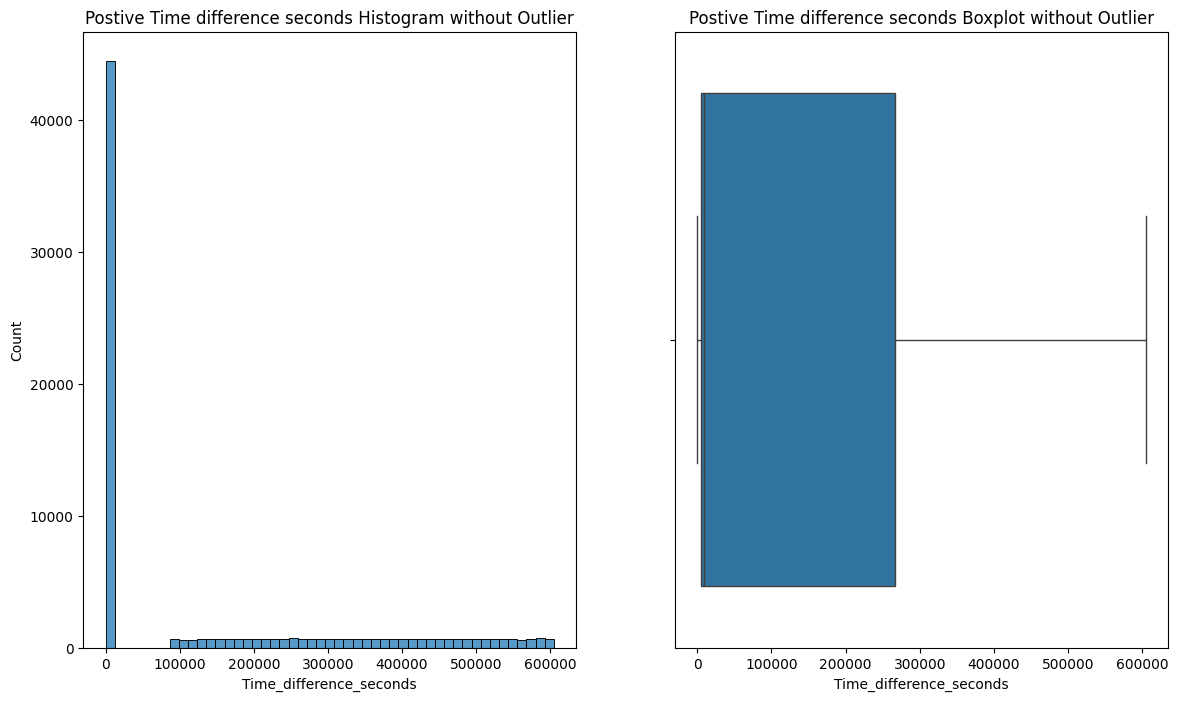

Time_difference_seconds
count             71941.000000
mean             135780.593069
std              189606.121280
min                  60.000000
25%                4576.000000
50%                8894.000000
75%              266498.000000
max              604849.000000

In [36]:
train_all_positive_normality = train_all_positive[(train_all_positive['Time_difference_seconds'] < upper_bound)]

fig, ax = plt.subplots(ncols=2, figsize=(14, 8))

sns.histplot(data=train_all_positive_normality,
             x='Time_difference_seconds',
             ax=ax[0])

ax[0].set_title(f"Postive Time difference seconds Histogram without Outlier")

sns.boxplot(data=train_all_positive_normality,
             x='Time_difference_seconds',
             ax=ax[1])

ax[1].set_title(f"Postive Time difference seconds Boxplot without Outlier")

plt.show()

display(train_all_positive_normality[['Time_difference_seconds']].describe())

In [37]:
train_all.drop(columns=['Time_difference_seconds'], inplace=True)

In [38]:
train_all['Fraud_Type'].value_counts().sort_index()

Fraud_Type
a       57
b       68
c       65
d       63
e       67
f       64
g       59
h       68
i       65
j       64
k       66
l       39
m    74079
Name: count, dtype: int64

In [39]:
train_all_m = train_all[(train_all['Fraud_Type'] == 'm')]
train_all_non_m = train_all[(train_all['Fraud_Type'] != 'm')]

In [40]:
hue_order = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l']

변수 명 : Customer_Gender


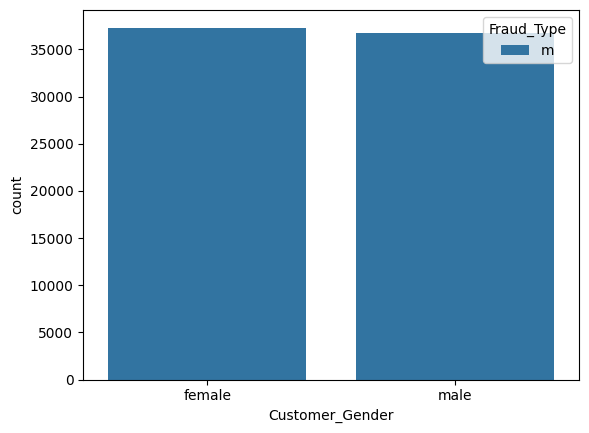


변수 명 : Customer_credit_rating


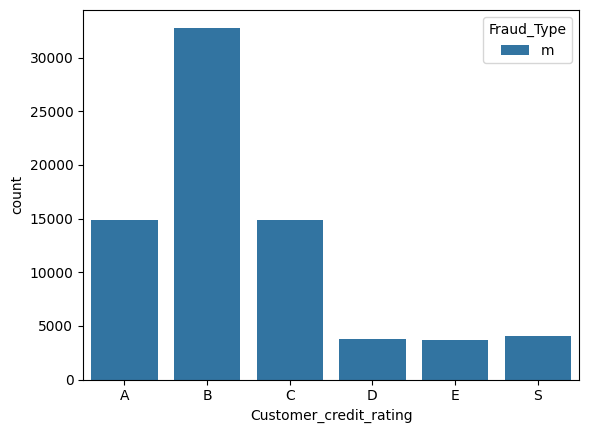


변수 명 : Customer_flag_change_of_authentication_1


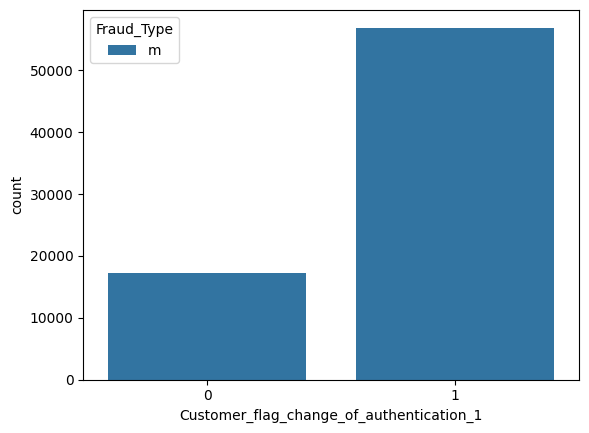


변수 명 : Customer_flag_change_of_authentication_2


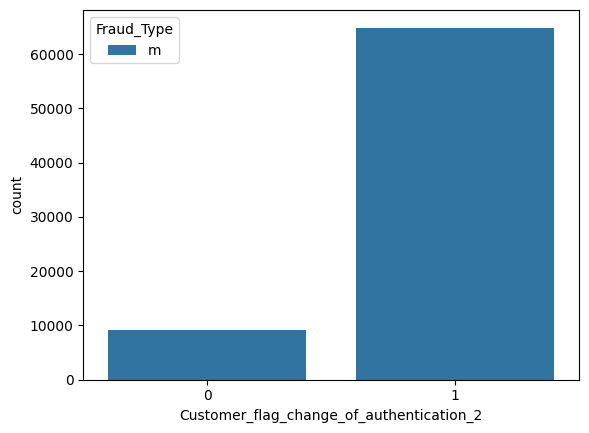


변수 명 : Customer_flag_change_of_authentication_3


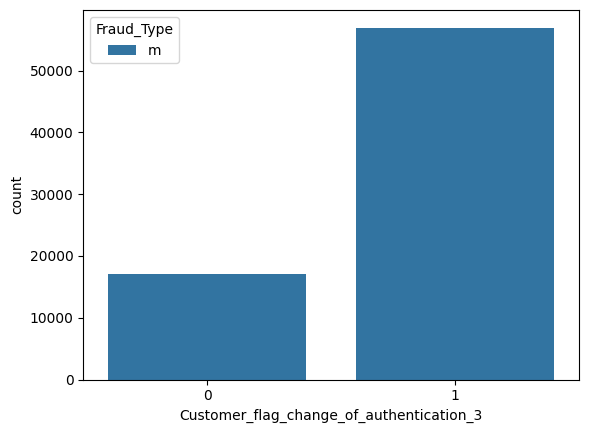


변수 명 : Customer_flag_change_of_authentication_4


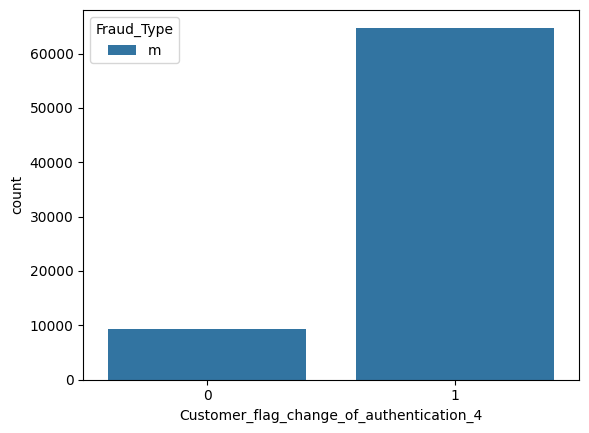


변수 명 : Customer_rooting_jailbreak_indicator


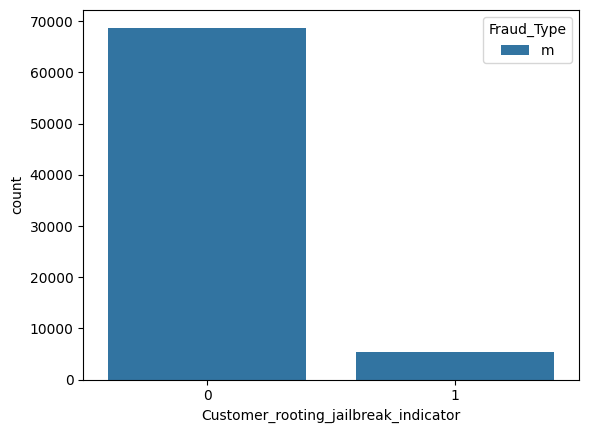


변수 명 : Customer_mobile_roaming_indicator


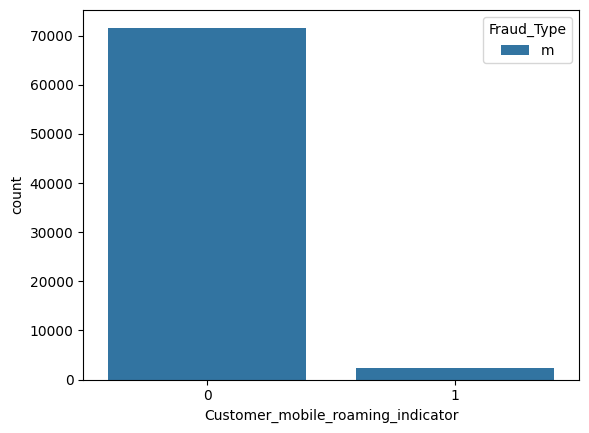


변수 명 : Customer_VPN_Indicator


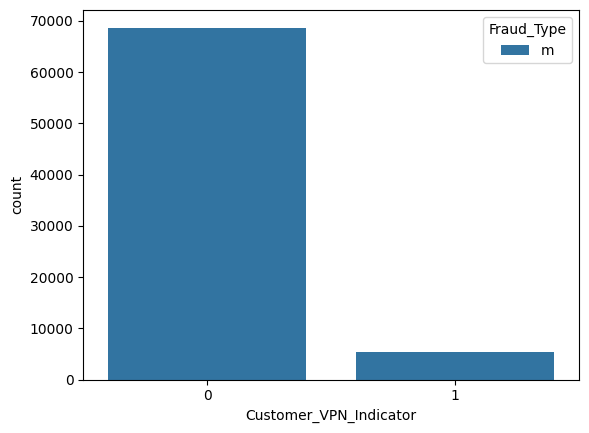


변수 명 : Customer_loan_type


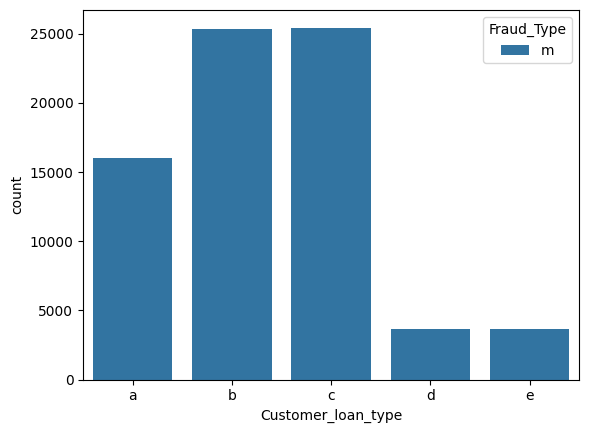


변수 명 : Customer_flag_terminal_malicious_behavior_1


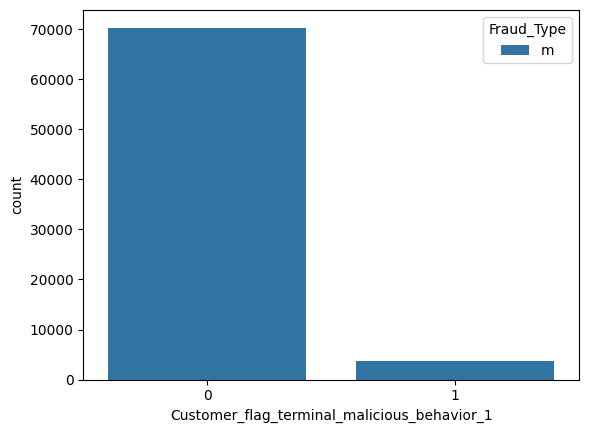


변수 명 : Customer_flag_terminal_malicious_behavior_2


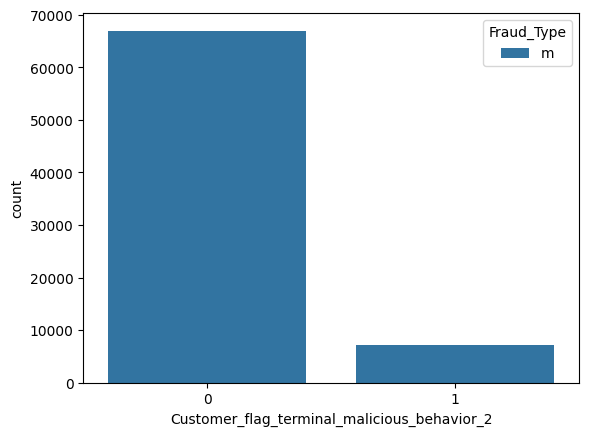


변수 명 : Customer_flag_terminal_malicious_behavior_3


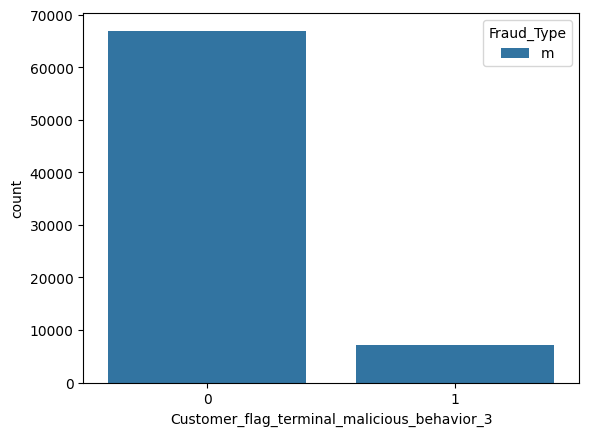


변수 명 : Customer_flag_terminal_malicious_behavior_4


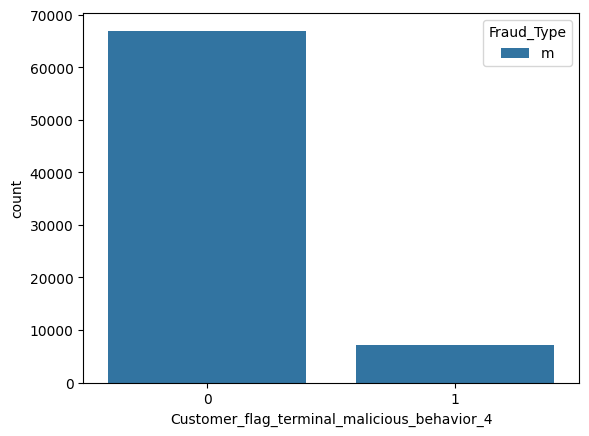


변수 명 : Customer_flag_terminal_malicious_behavior_5


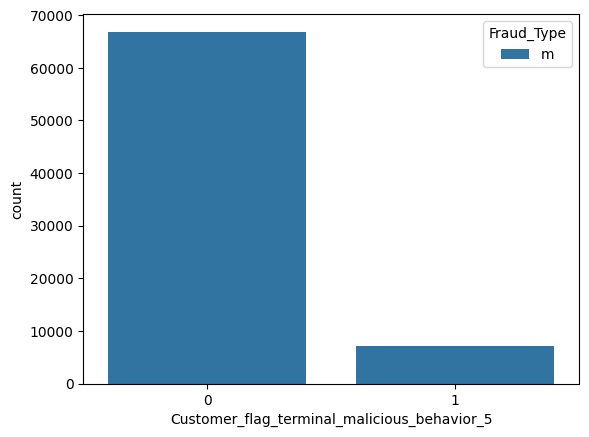


변수 명 : Customer_flag_terminal_malicious_behavior_6


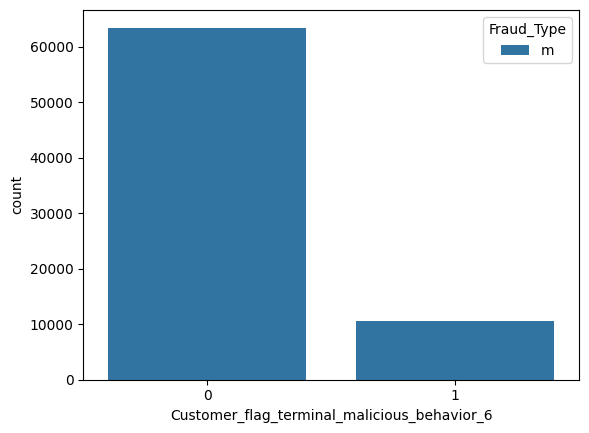


변수 명 : Customer_inquery_atm_limit


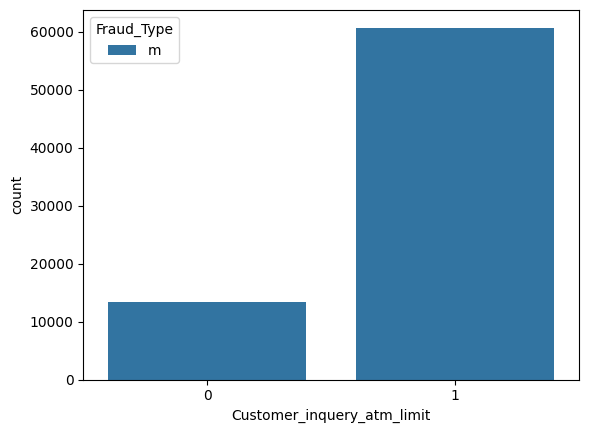


변수 명 : Customer_increase_atm_limit


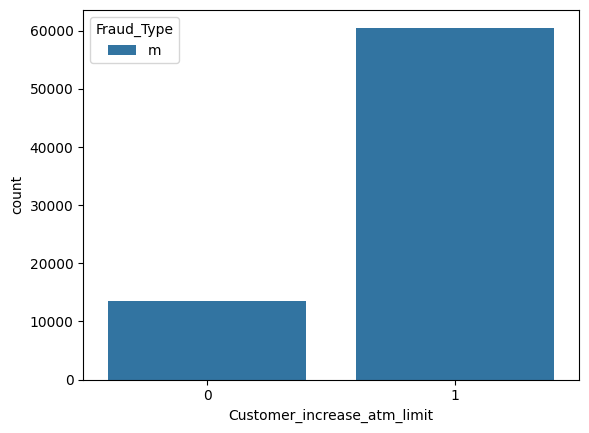


변수 명 : Account_account_type


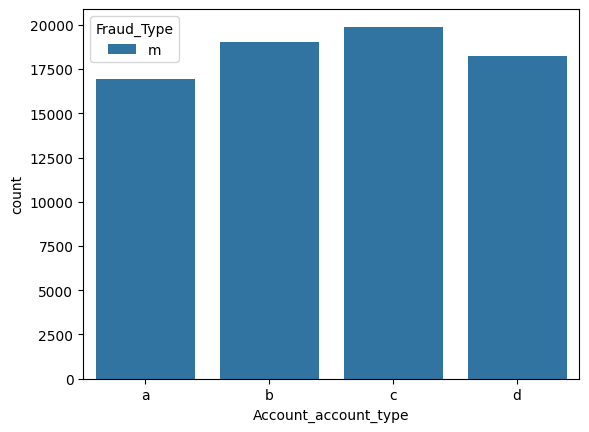


변수 명 : Account_indicator_release_limit_excess


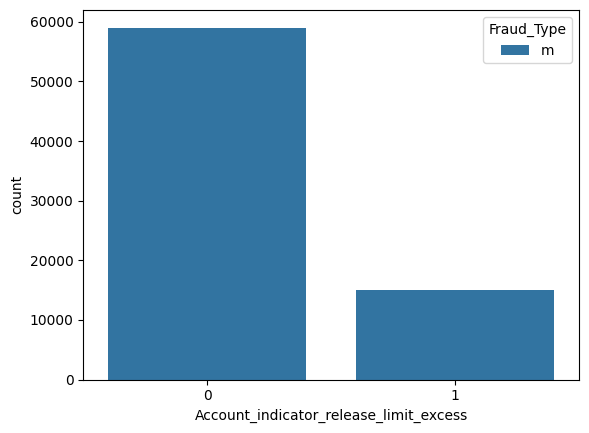


변수 명 : Account_indicator_Openbanking


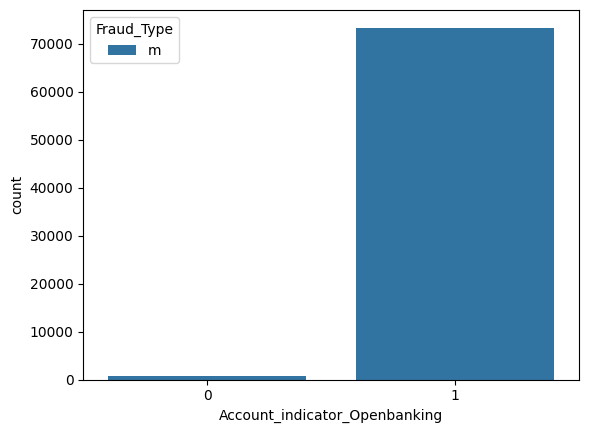


변수 명 : Account_release_suspention


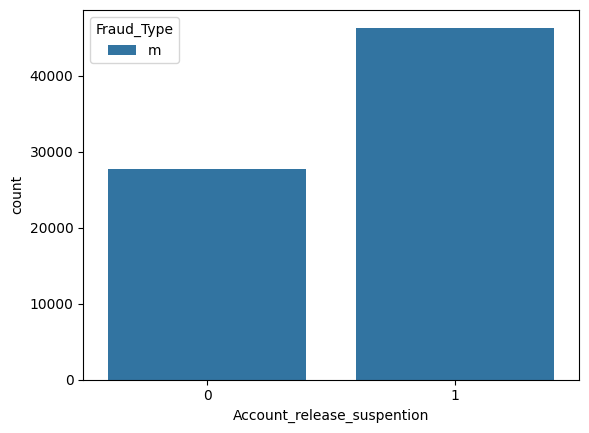


변수 명 : Channel


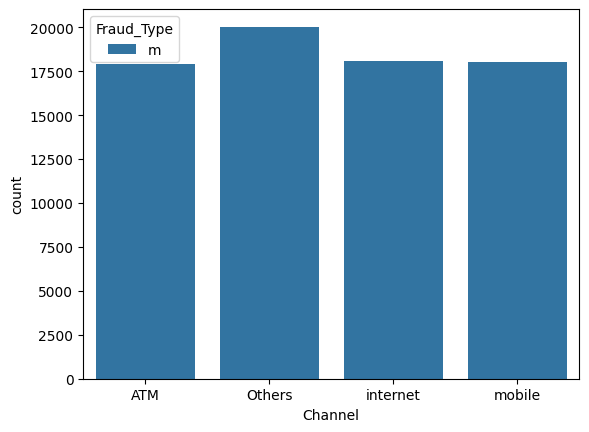


변수 명 : Operating_System


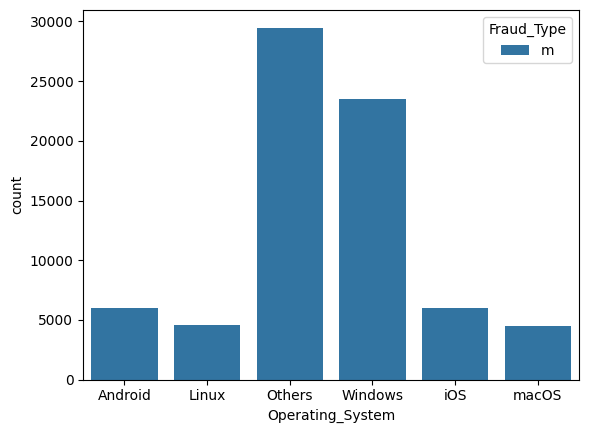


변수 명 : Error_Code


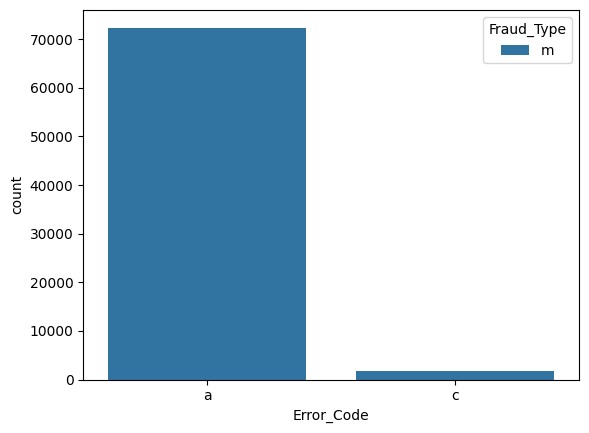


변수 명 : Transaction_Failure_Status


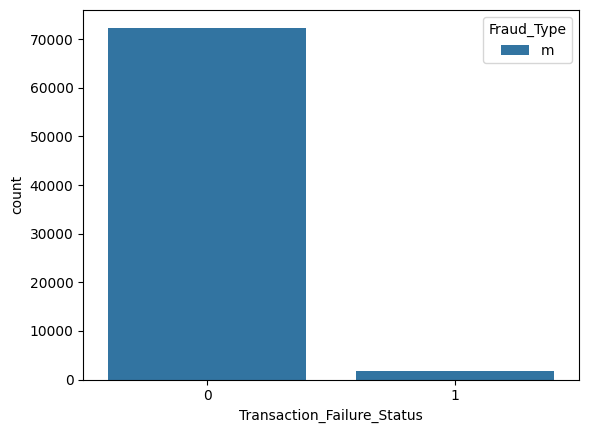


변수 명 : Type_General_Automatic


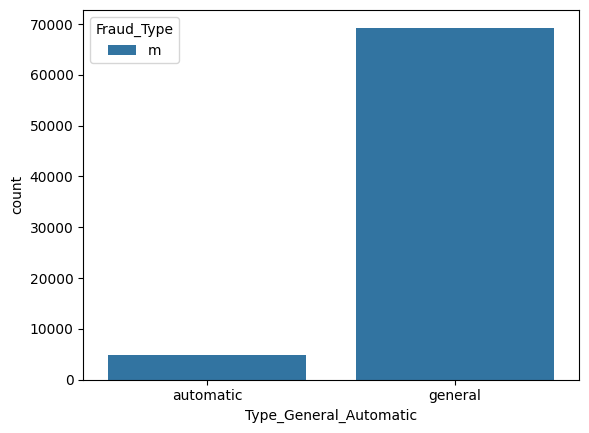


변수 명 : Access_Medium


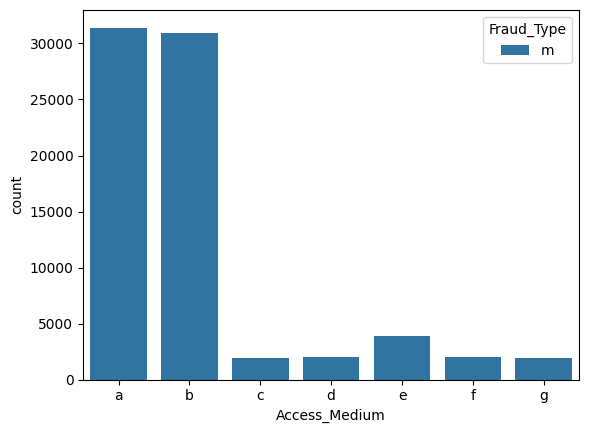


변수 명 : Another_Person_Account


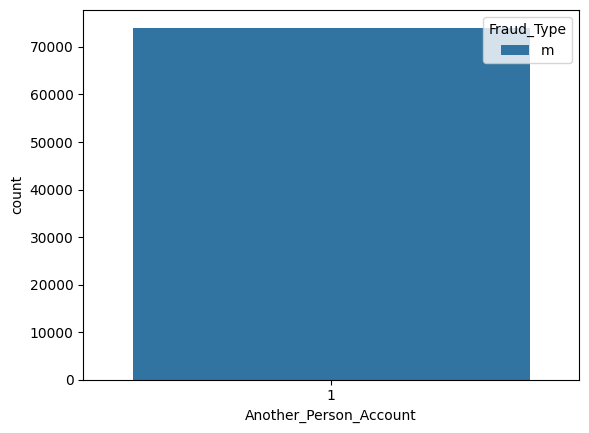


변수 명 : Unused_terminal_status


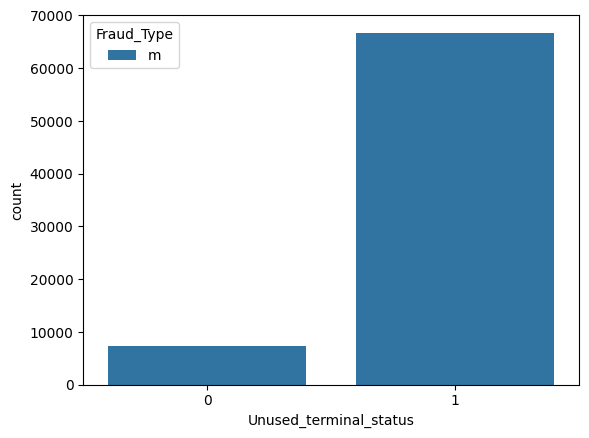


변수 명 : Flag_deposit_more_than_tenMillion


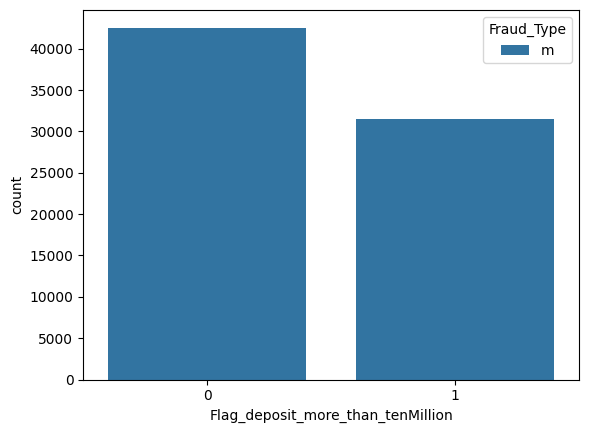


변수 명 : Unused_account_status


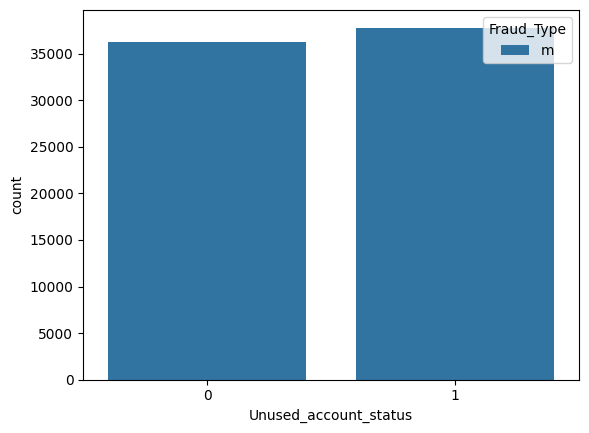


변수 명 : Recipient_account_suspend_status


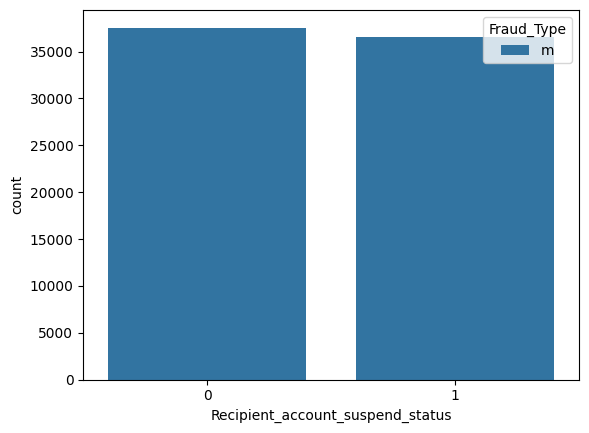


변수 명 : First_time_iOS_by_vulnerable_user


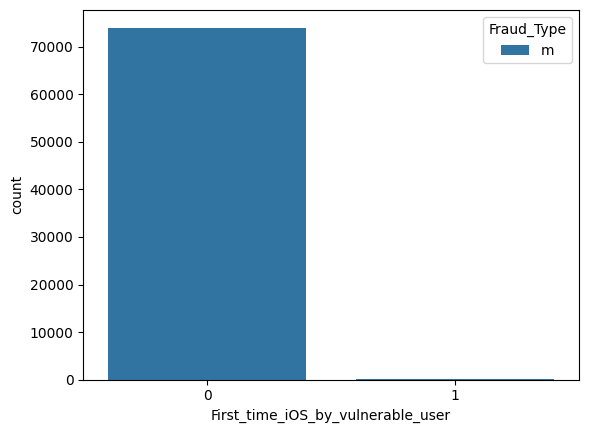

In [41]:
for column, col_type, col_range in zip(cond_all['항목명'],
                                       cond_all['데이터 형태'],
                                       cond_all['데이터 범위']):

  if col_type == '범주형' and col_range != '-' and column != 'Fraud_Type':
     print(f'변수 명 : {column}')

     order = list(train_all_m[column].unique())
     order = sorted(order)

     sns.countplot(data=train_all_m,
                 x=column,
                 hue='Fraud_Type',
                 order=order)
     plt.show()

     print()

변수 명 : Customer_Gender


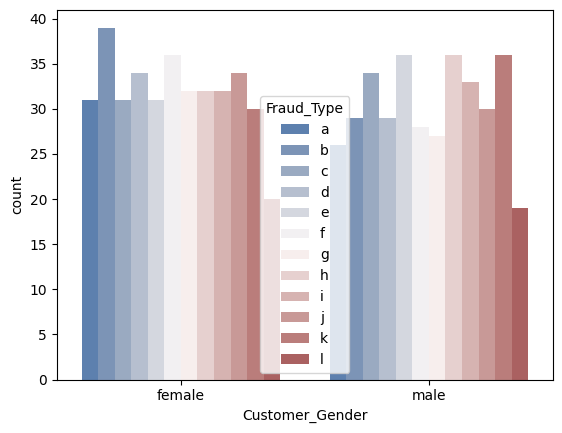


변수 명 : Customer_credit_rating


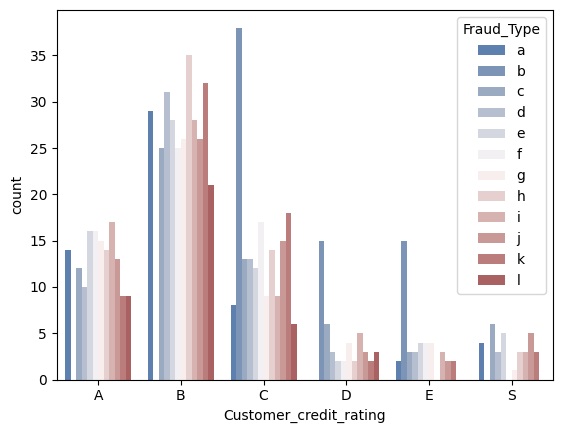


변수 명 : Customer_flag_change_of_authentication_1


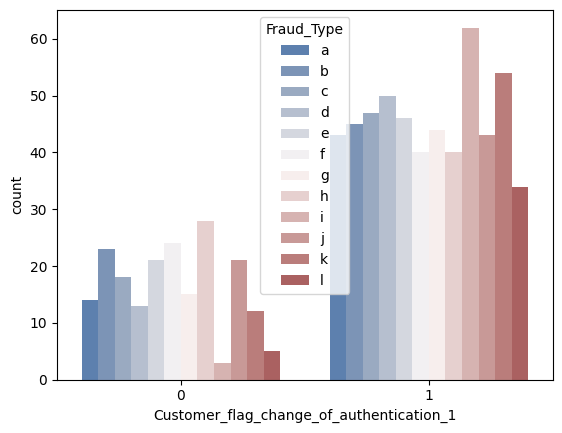


변수 명 : Customer_flag_change_of_authentication_2


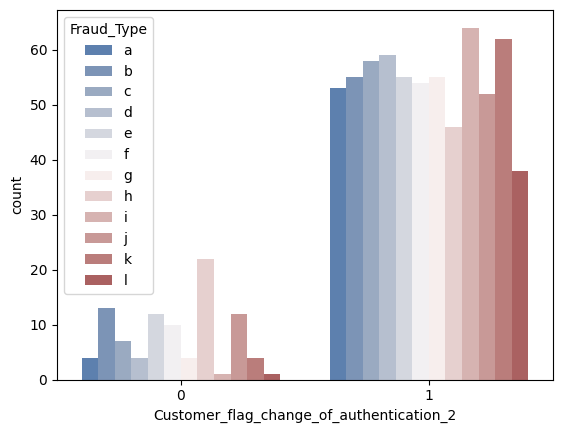


변수 명 : Customer_flag_change_of_authentication_3


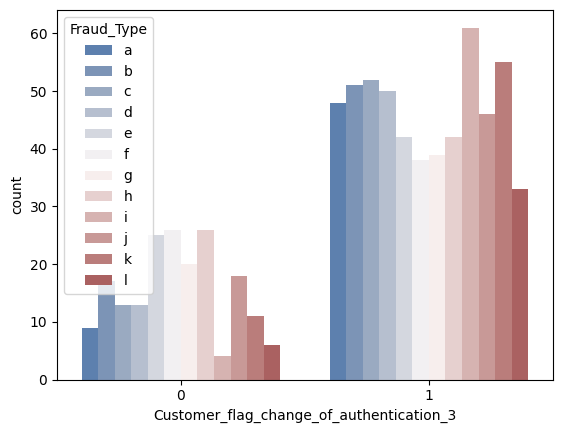


변수 명 : Customer_flag_change_of_authentication_4


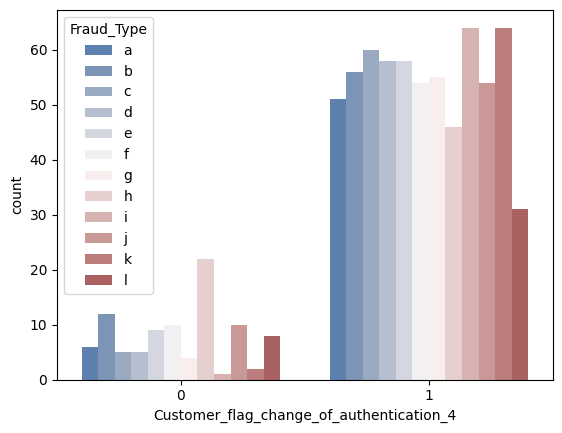


변수 명 : Customer_rooting_jailbreak_indicator


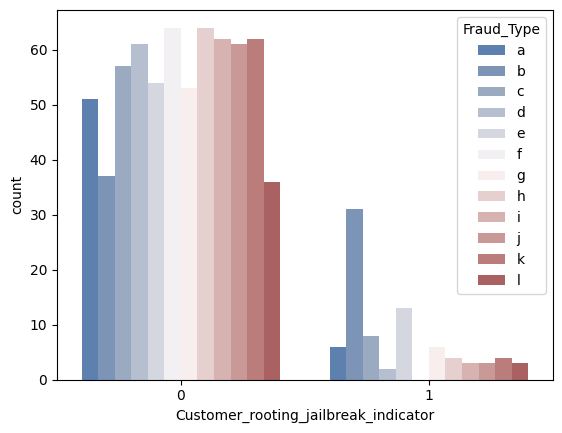


변수 명 : Customer_mobile_roaming_indicator


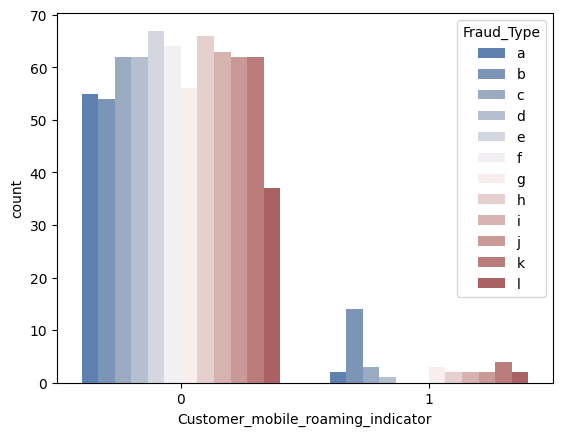


변수 명 : Customer_VPN_Indicator


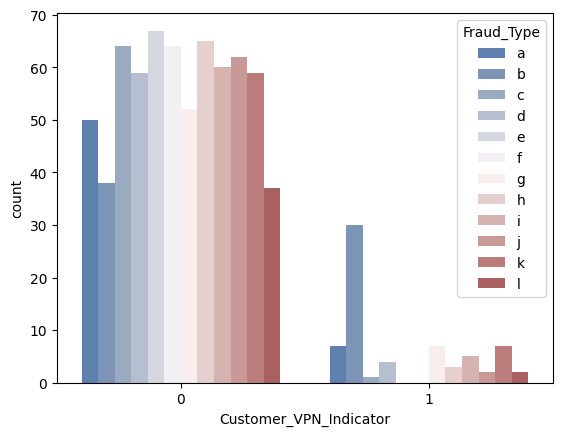


변수 명 : Customer_loan_type


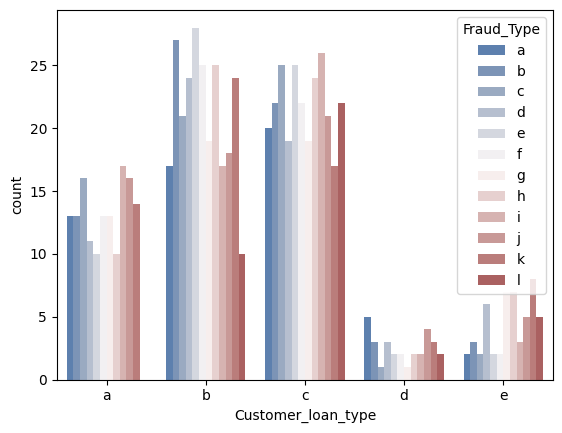


변수 명 : Customer_flag_terminal_malicious_behavior_1


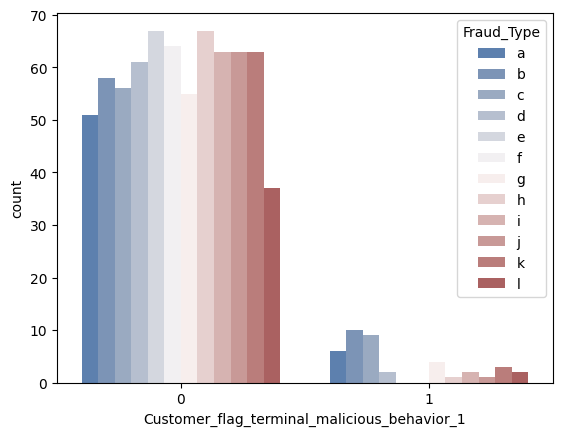


변수 명 : Customer_flag_terminal_malicious_behavior_2


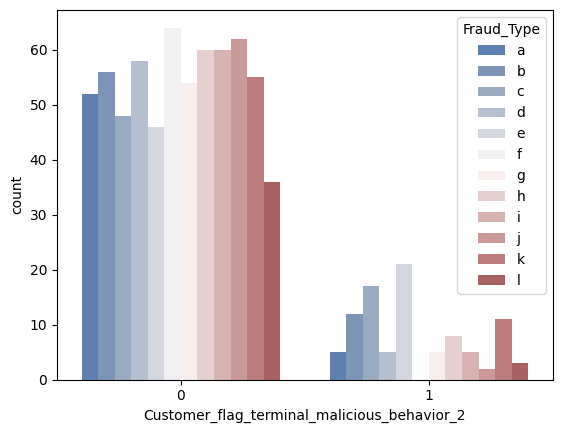


변수 명 : Customer_flag_terminal_malicious_behavior_3


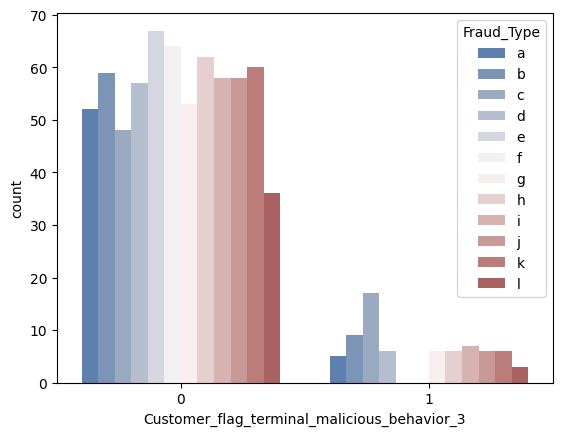


변수 명 : Customer_flag_terminal_malicious_behavior_4


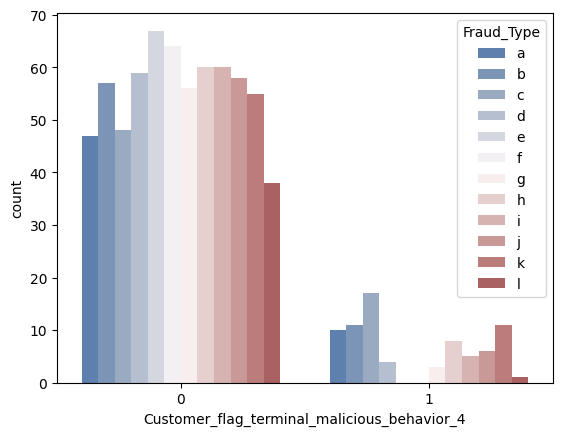


변수 명 : Customer_flag_terminal_malicious_behavior_5


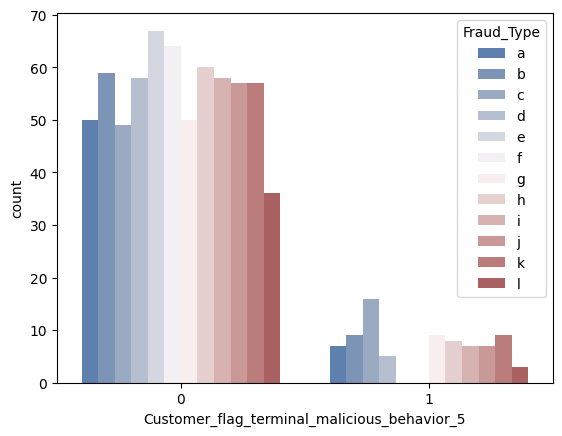


변수 명 : Customer_flag_terminal_malicious_behavior_6


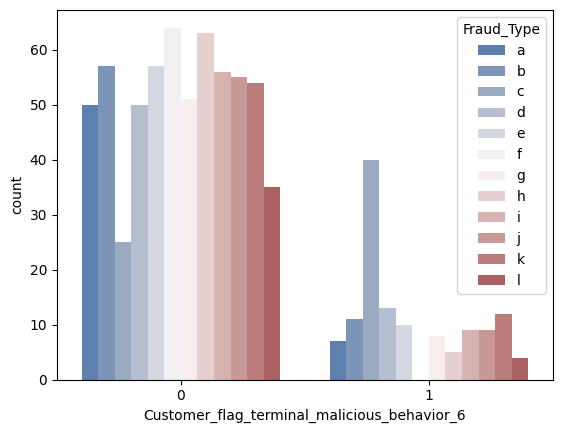


변수 명 : Customer_inquery_atm_limit


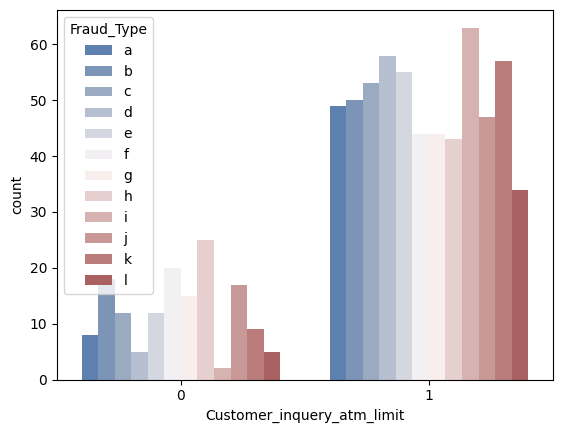


변수 명 : Customer_increase_atm_limit


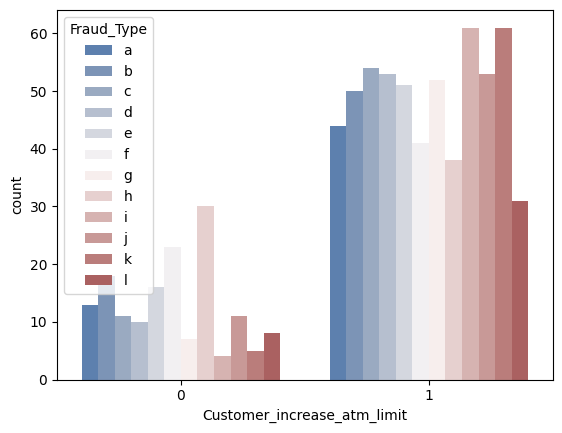


변수 명 : Account_account_type


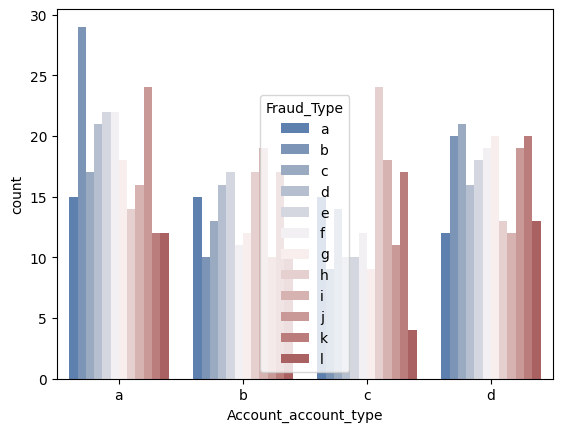


변수 명 : Account_indicator_release_limit_excess


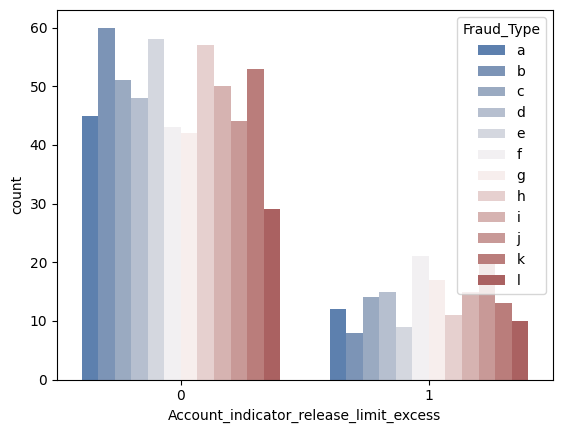


변수 명 : Account_indicator_Openbanking


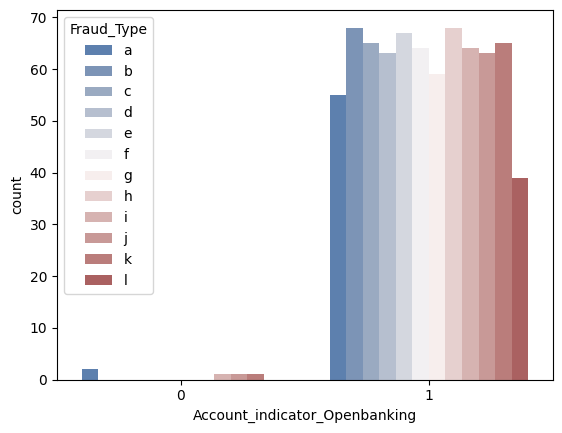


변수 명 : Account_release_suspention


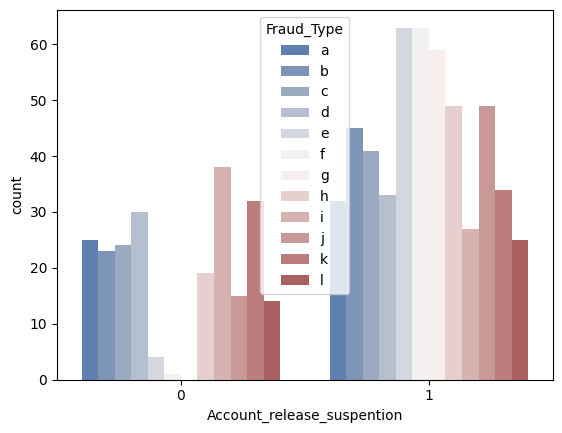


변수 명 : Channel


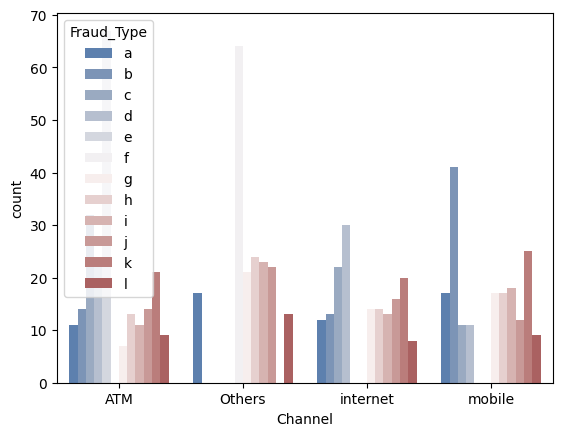


변수 명 : Operating_System


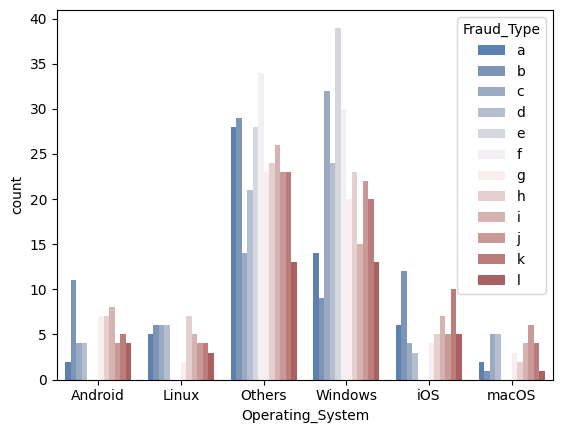


변수 명 : Error_Code


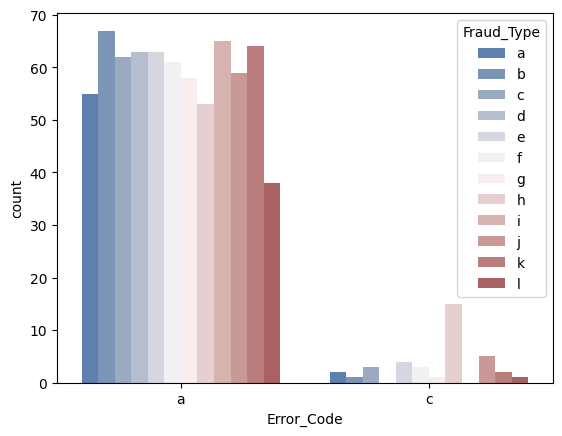


변수 명 : Transaction_Failure_Status


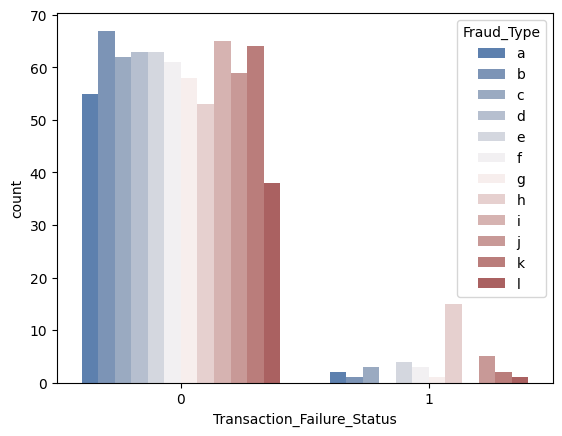


변수 명 : Type_General_Automatic


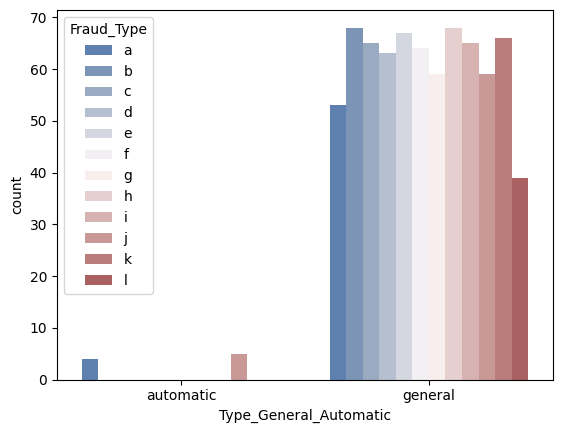


변수 명 : Access_Medium


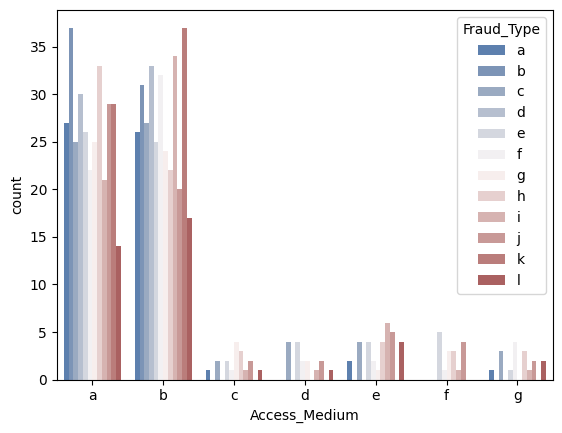


변수 명 : Another_Person_Account


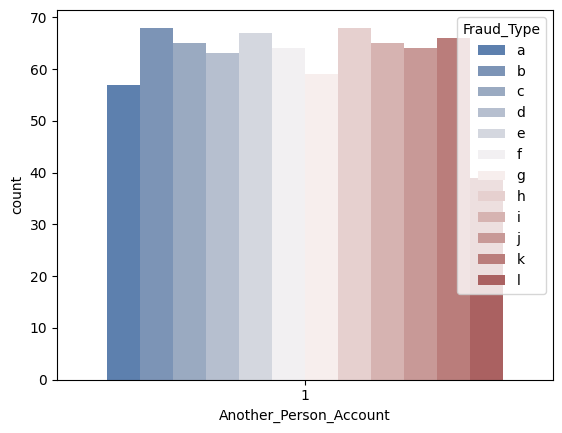


변수 명 : Unused_terminal_status


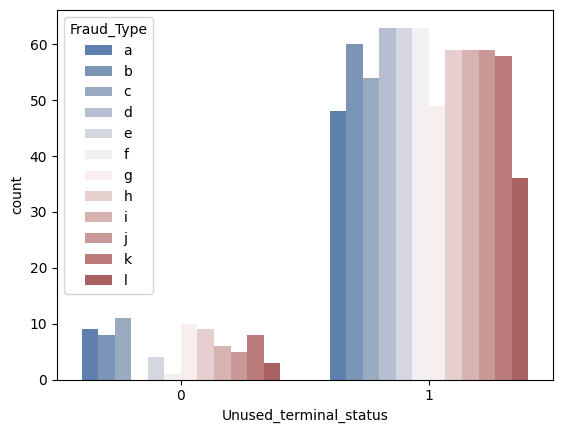


변수 명 : Flag_deposit_more_than_tenMillion


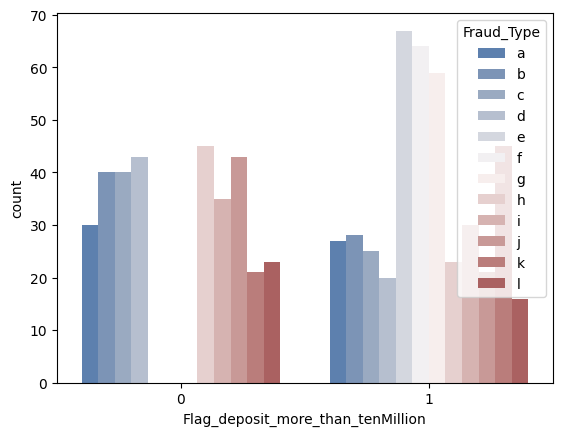


변수 명 : Unused_account_status


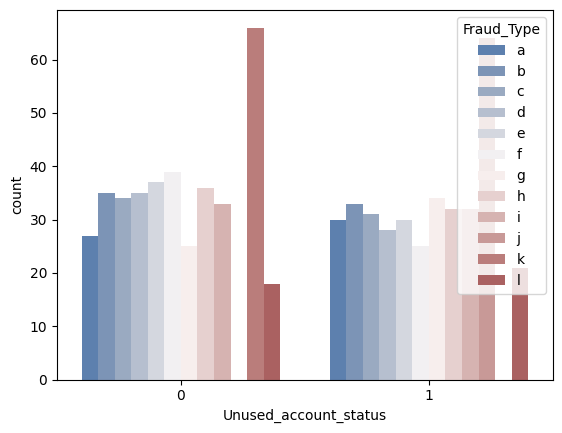


변수 명 : Recipient_account_suspend_status


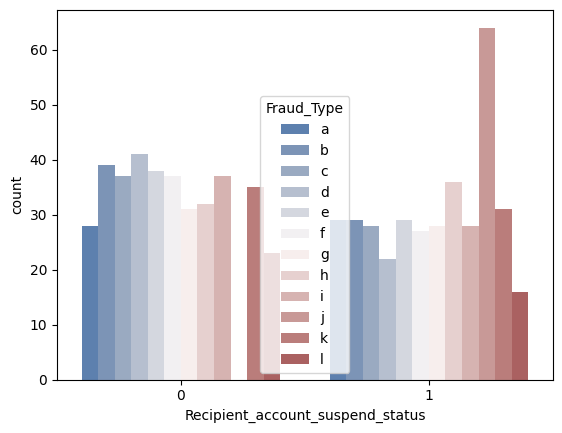


변수 명 : First_time_iOS_by_vulnerable_user


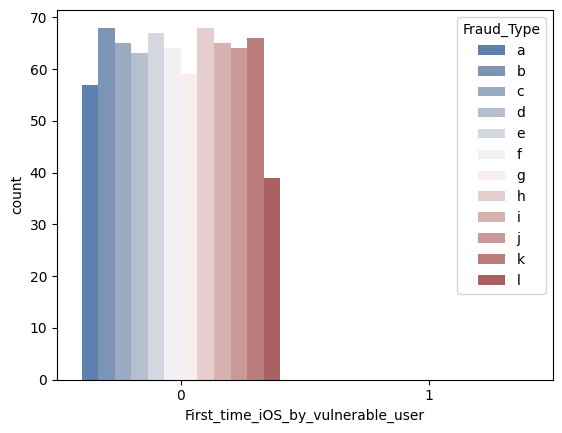

In [42]:
for column, col_type, col_range in zip(cond_all['항목명'],
                                       cond_all['데이터 형태'],
                                       cond_all['데이터 범위']):

  if col_type == '범주형' and col_range != '-' and column != 'Fraud_Type':
     print(f'변수 명 : {column}')

     order = list(train_all_m[column].unique())
     order = sorted(order)

     sns.countplot(data=train_all_non_m,
                    x=column,
                    hue='Fraud_Type',
                    palette='vlag',
                    hue_order=hue_order,
                    order=order)

     plt.show()

     print()

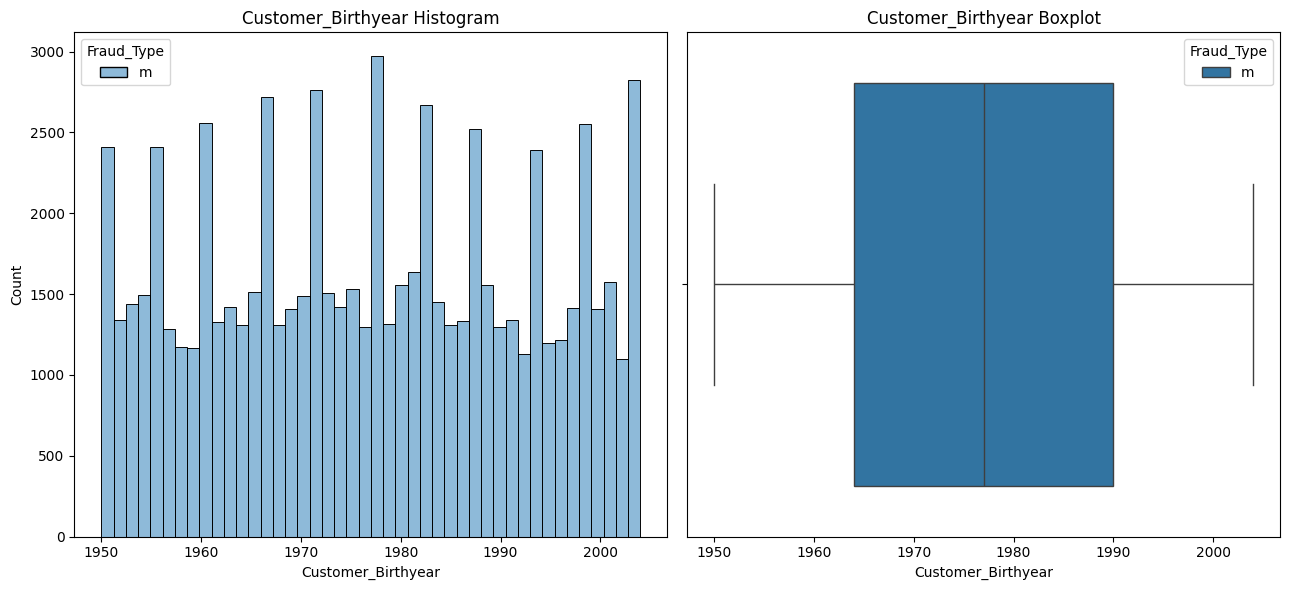

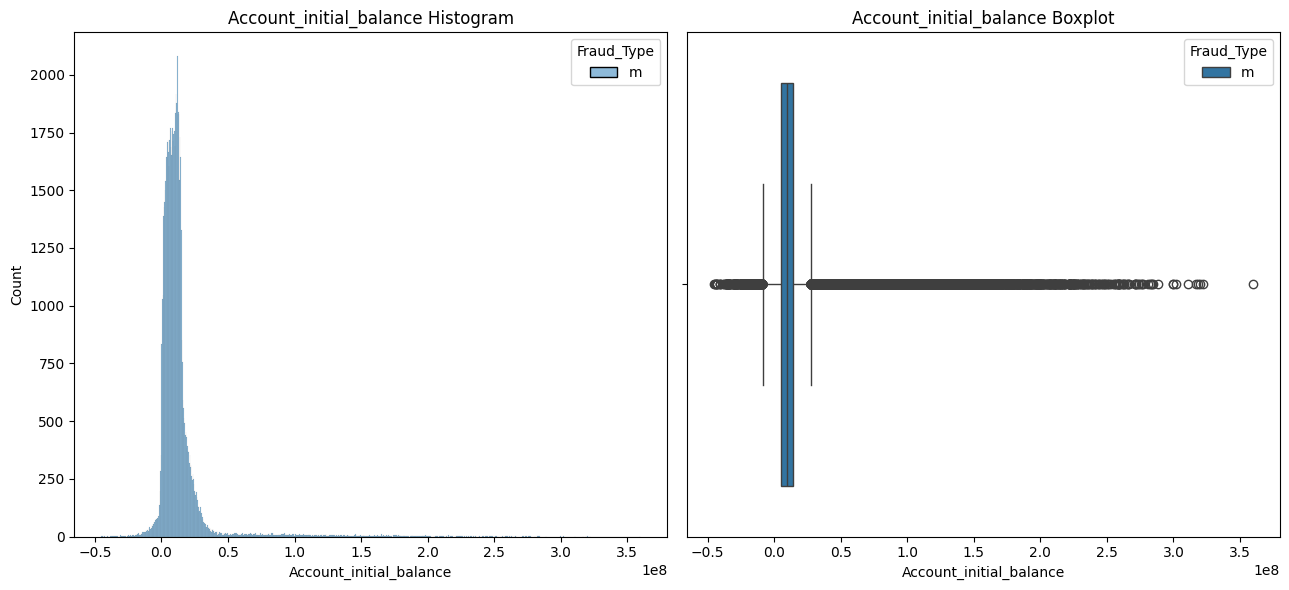

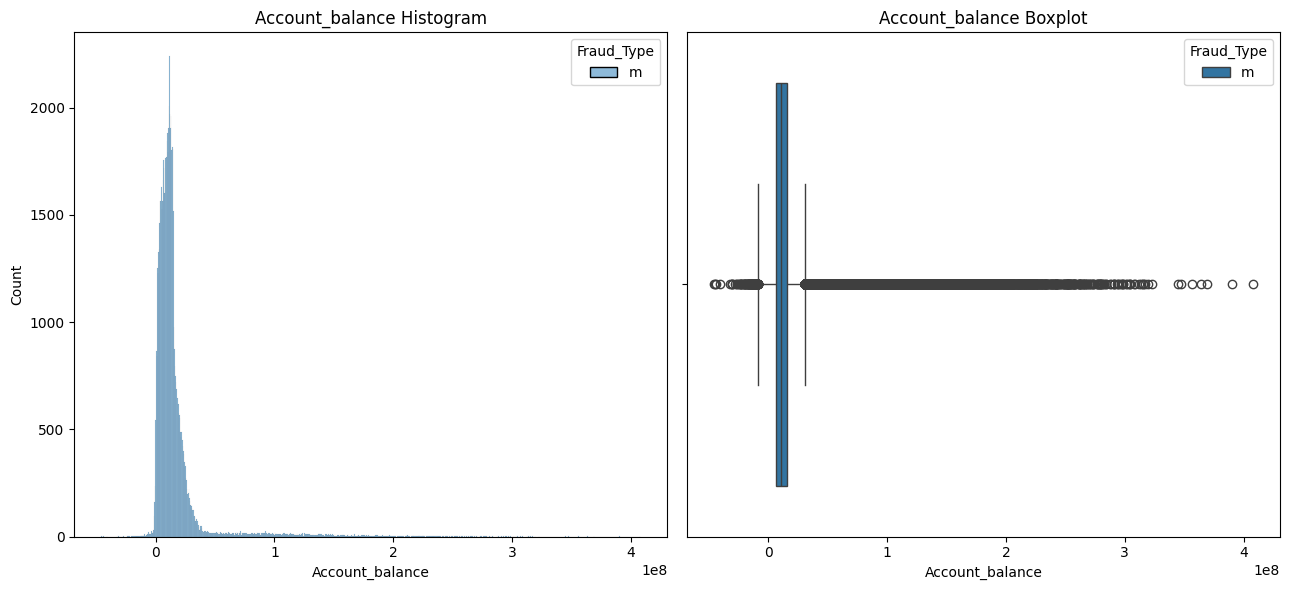

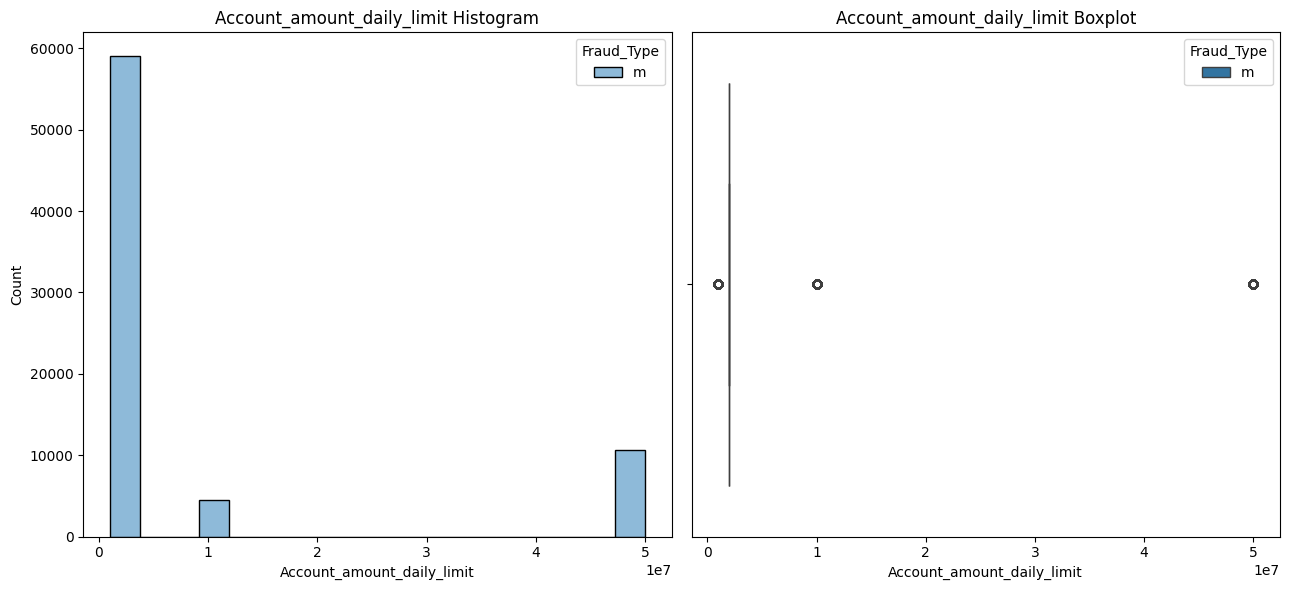

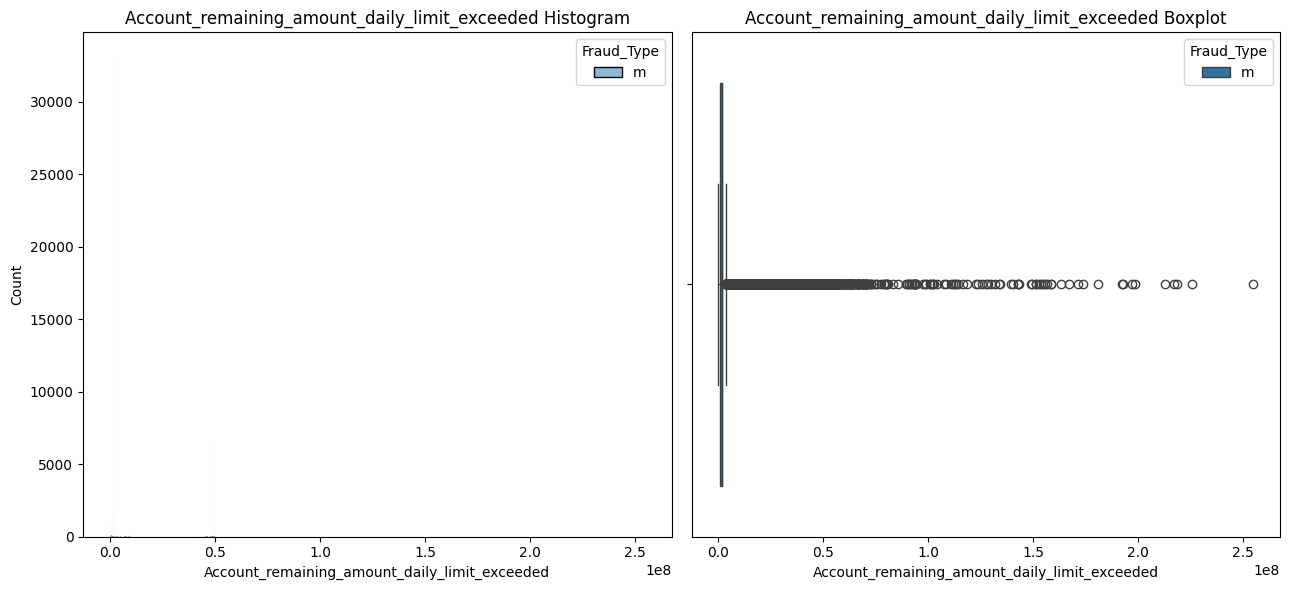

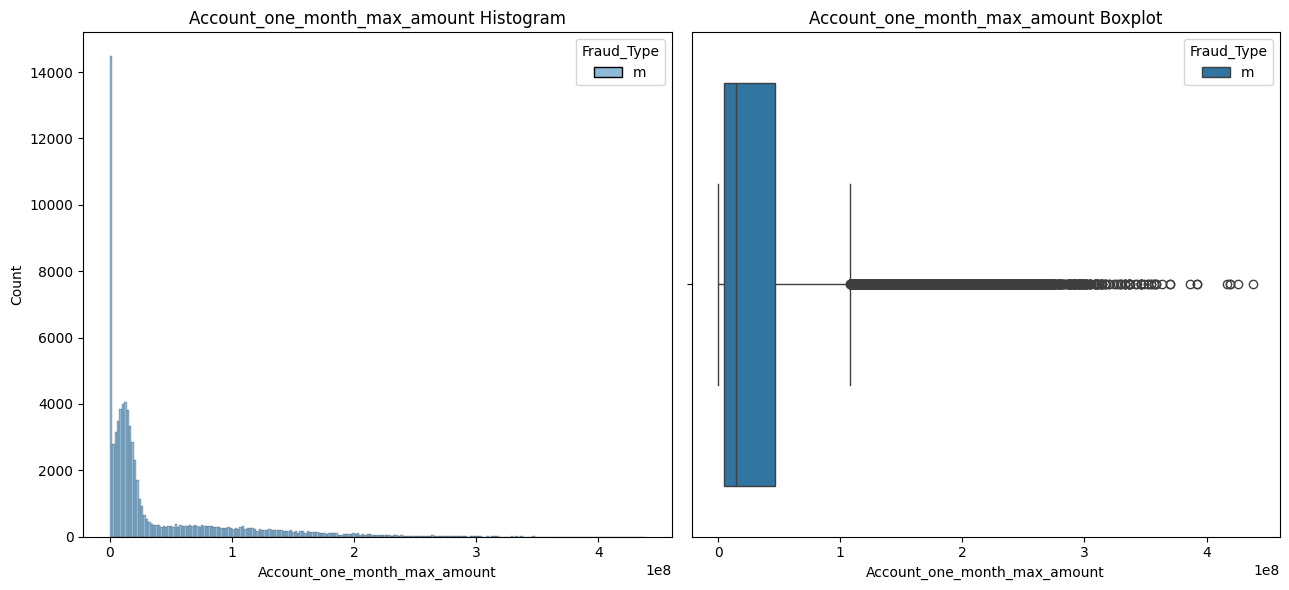

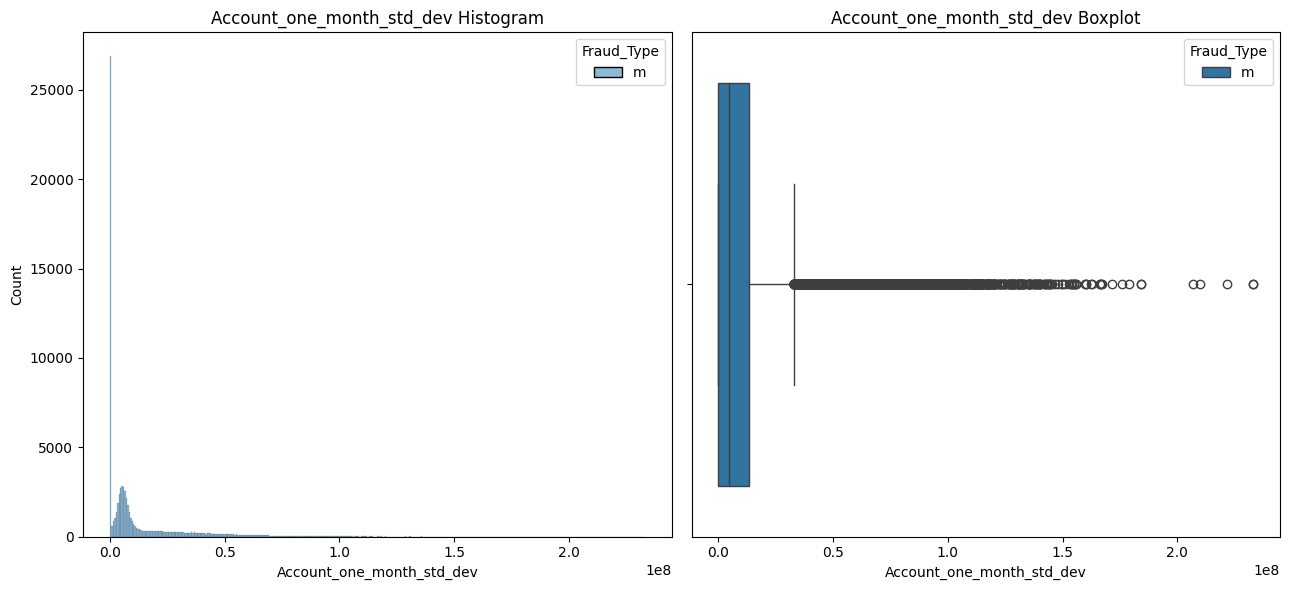

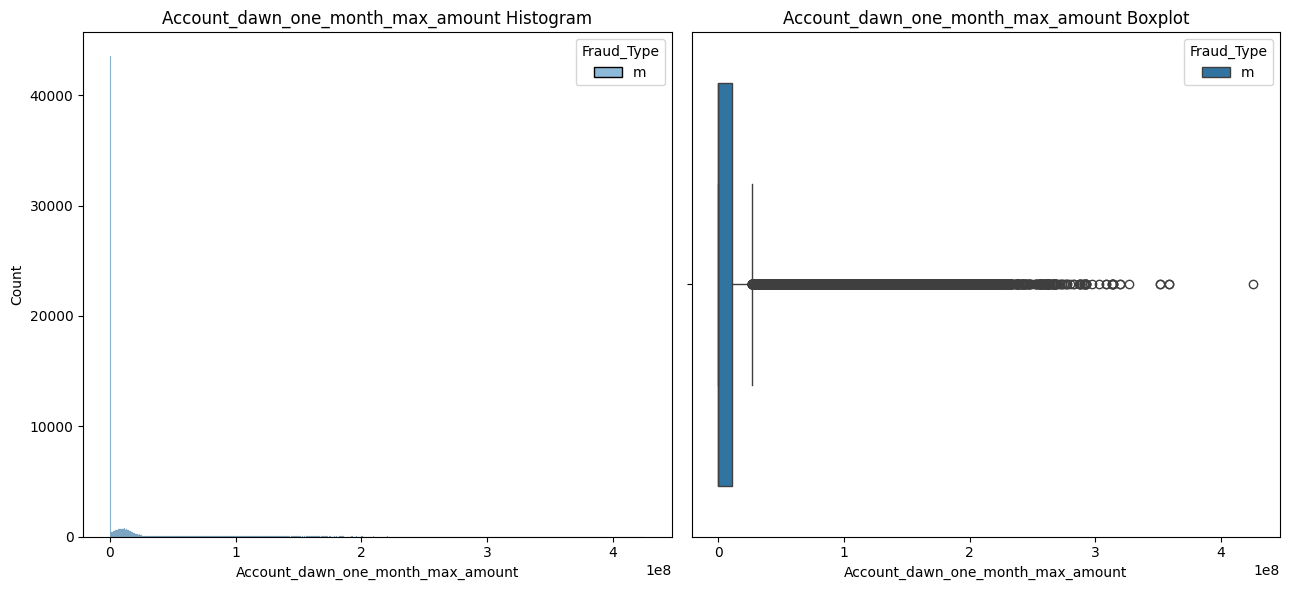

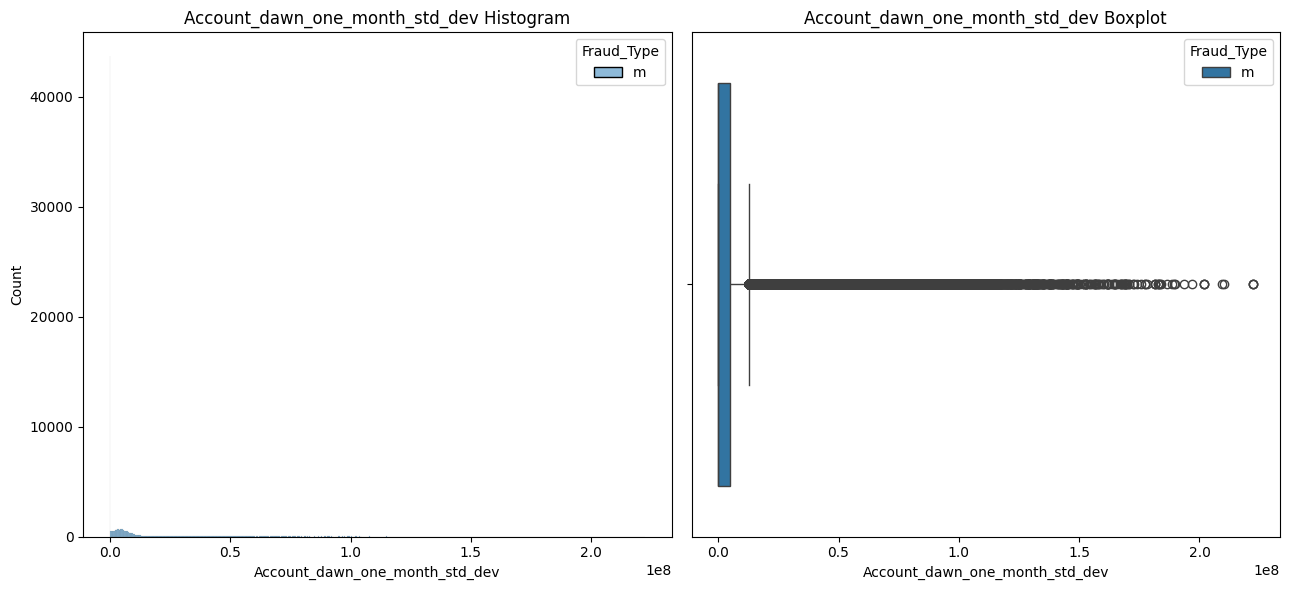

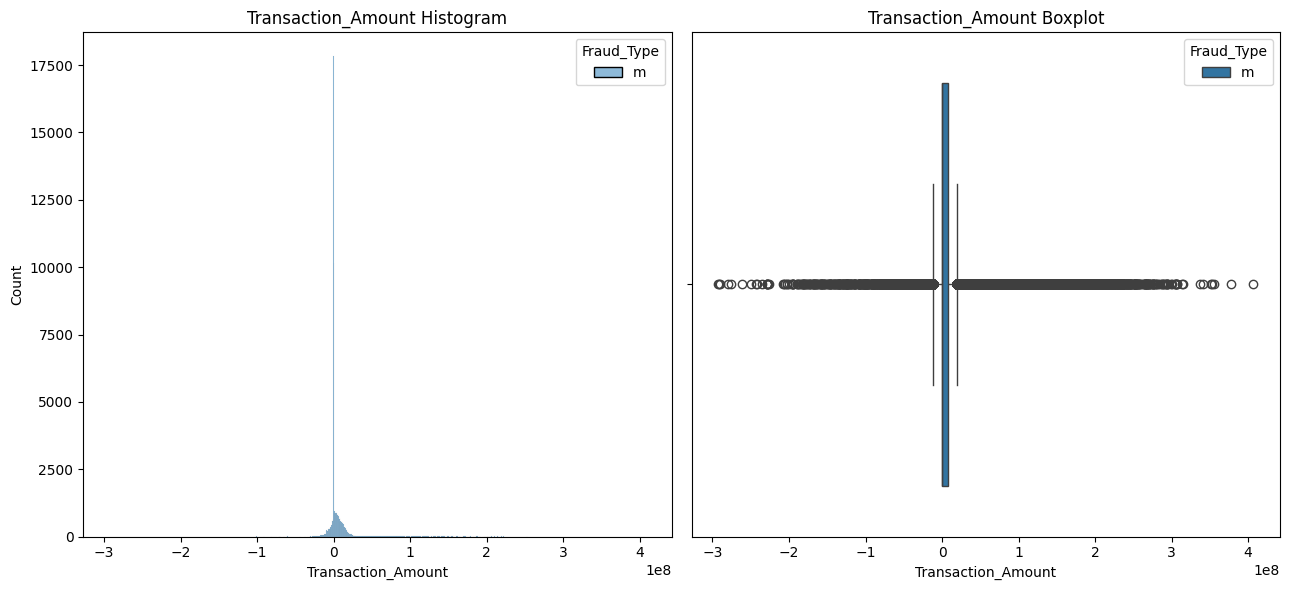

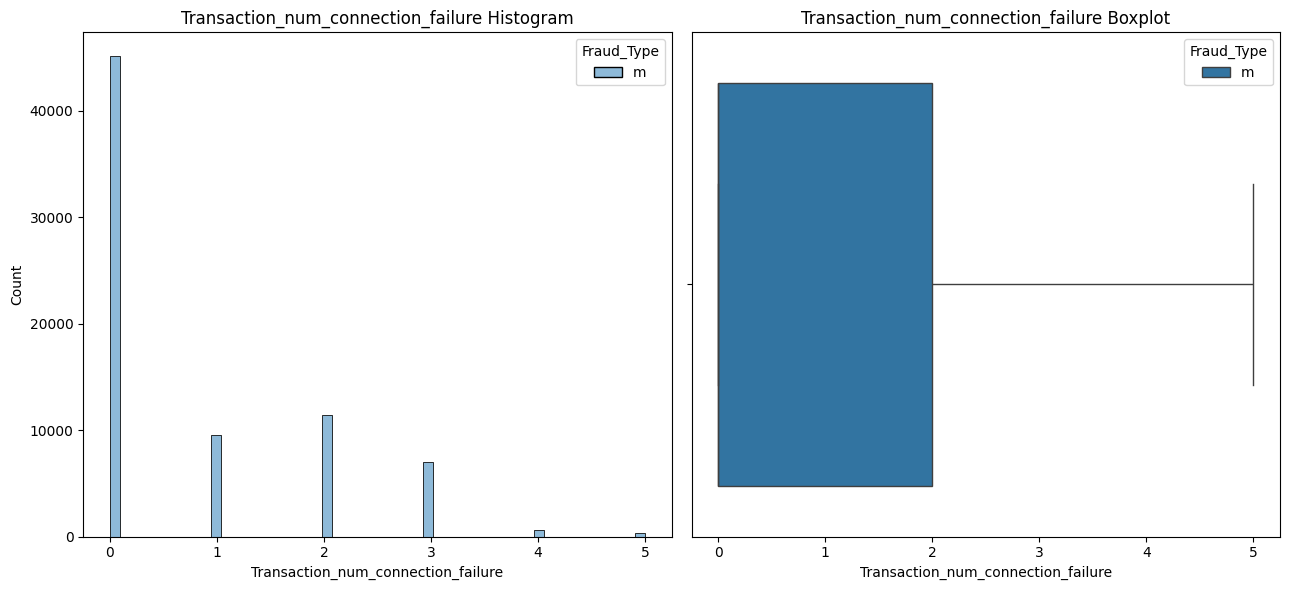

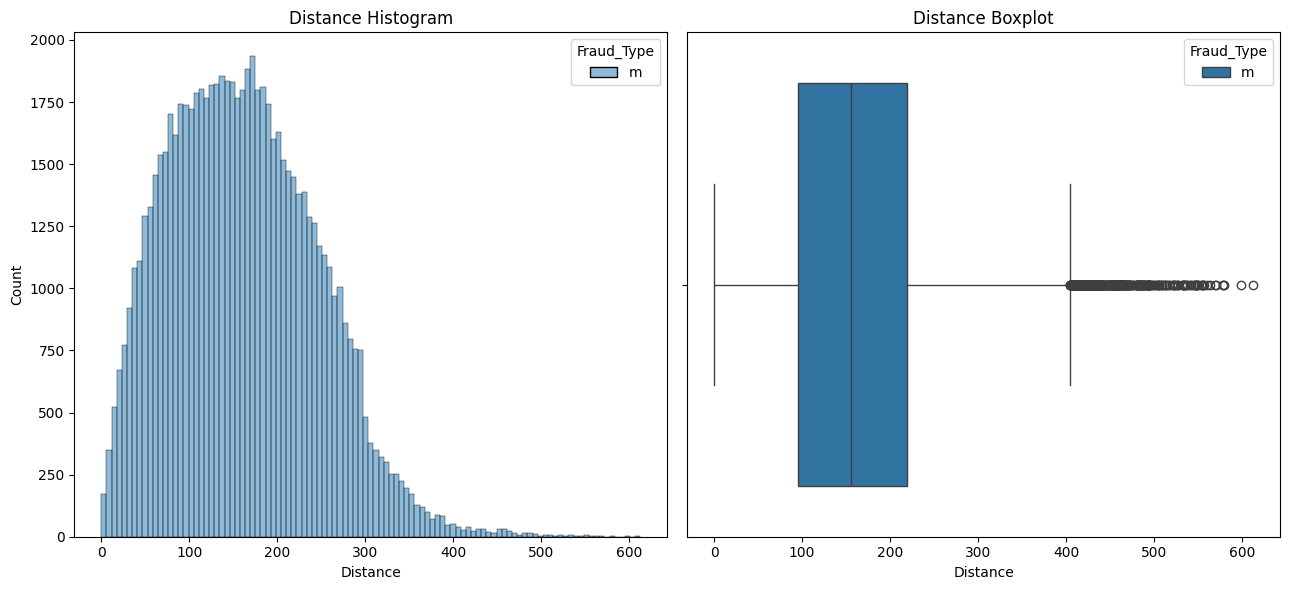

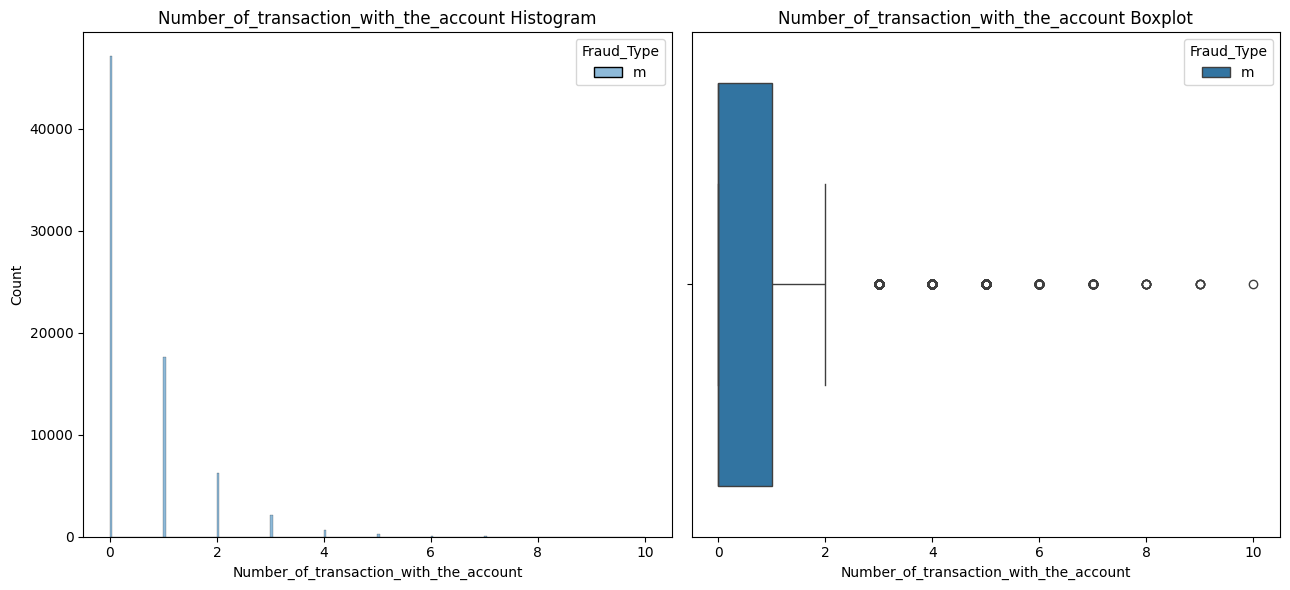

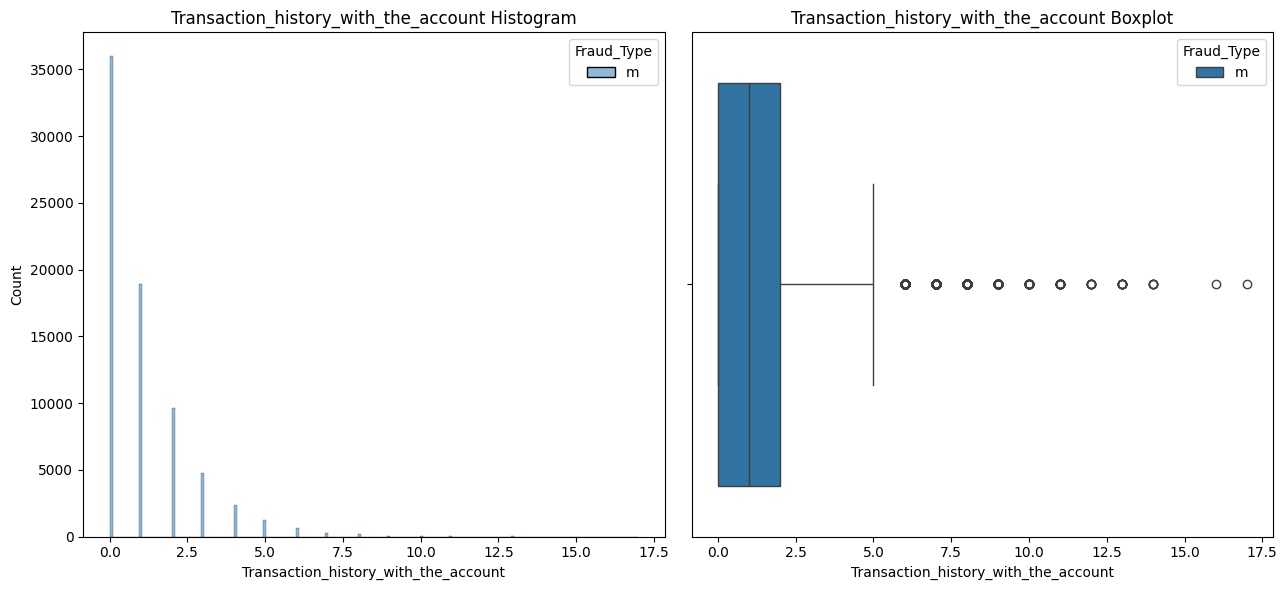

In [43]:
for column, col_type in zip(cond_all['항목명'], cond_all['데이터 형태']):

    if col_type == '수치형' and column != 'Time_difference':

       fig, ax = plt.subplots(ncols=2, figsize=(13, 6))

       sns.histplot(data=train_all_m,
                    x=column,
                    hue='Fraud_Type',
                    ax=ax[0])
       ax[0].set_title(f'{column} Histogram')

       sns.boxplot(data=train_all_m,
                   x=column,
                   hue='Fraud_Type',
                   ax=ax[1])
       ax[1].set_title(f'{column} Boxplot')

       plt.tight_layout()
       plt.show()

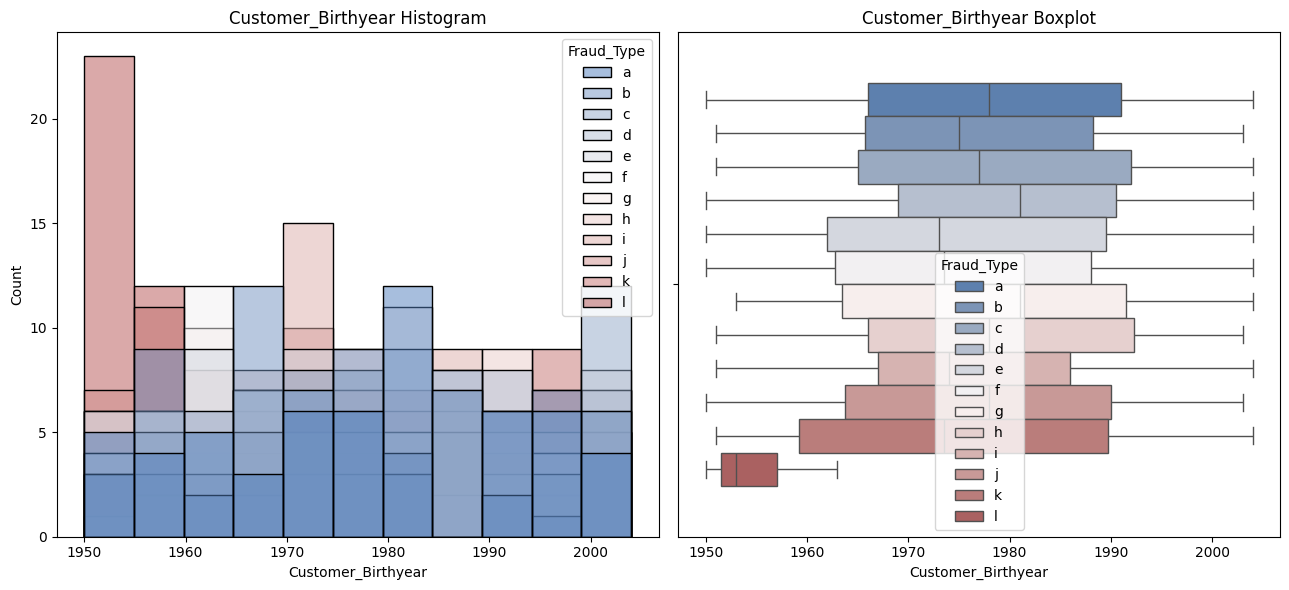

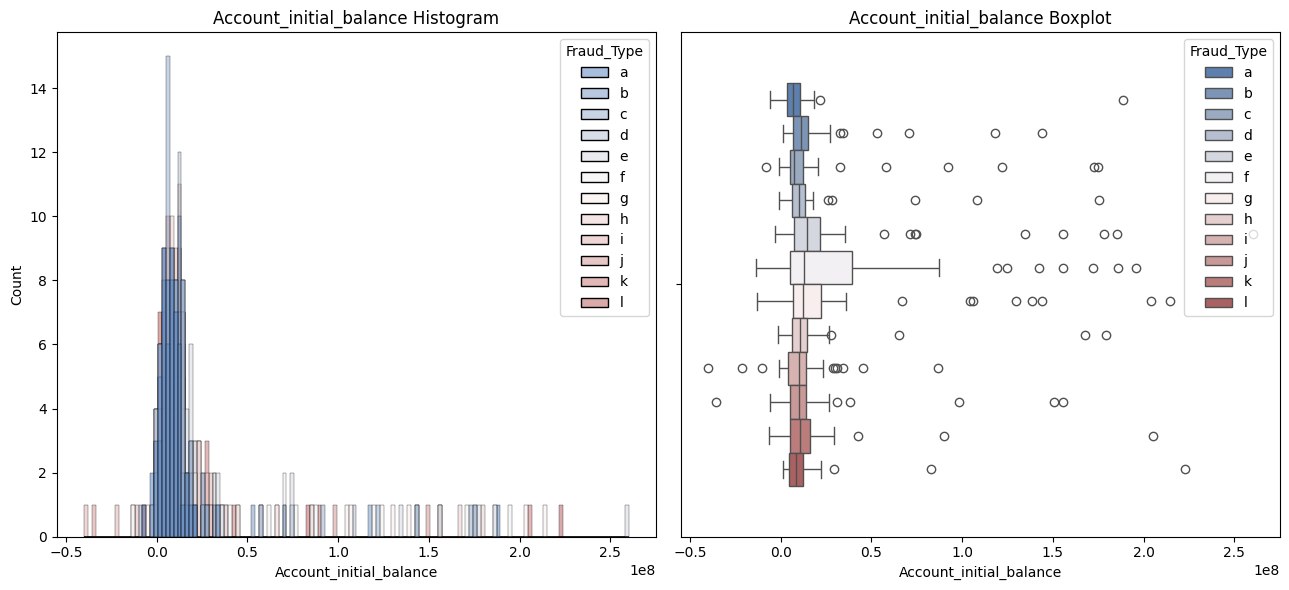

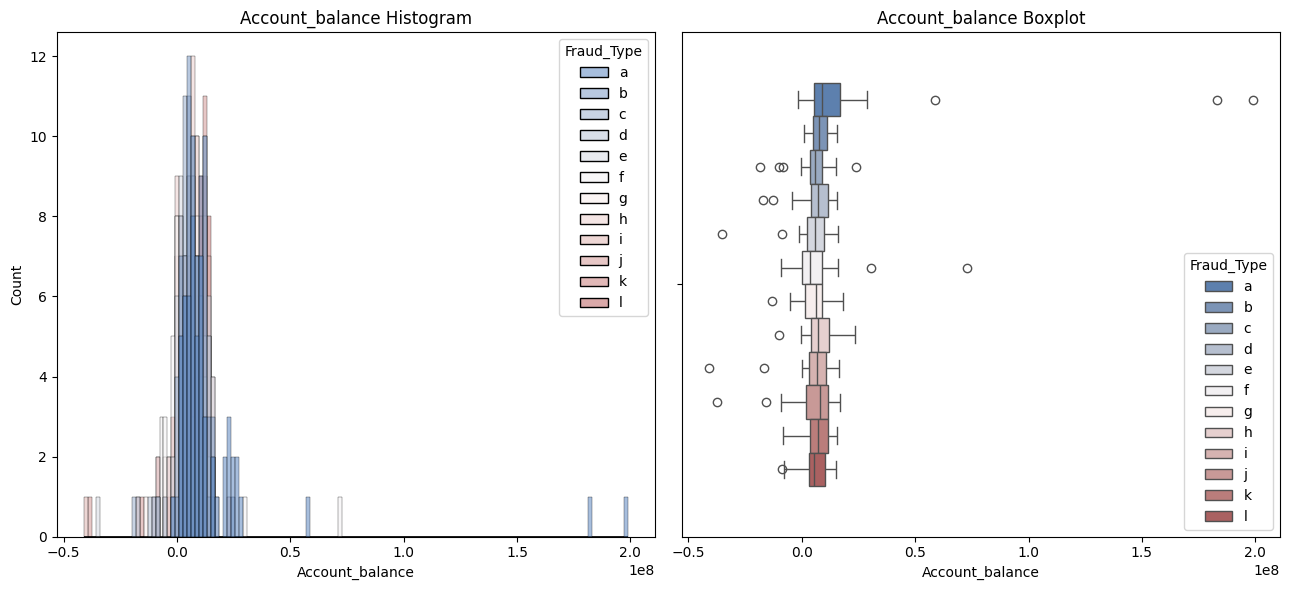

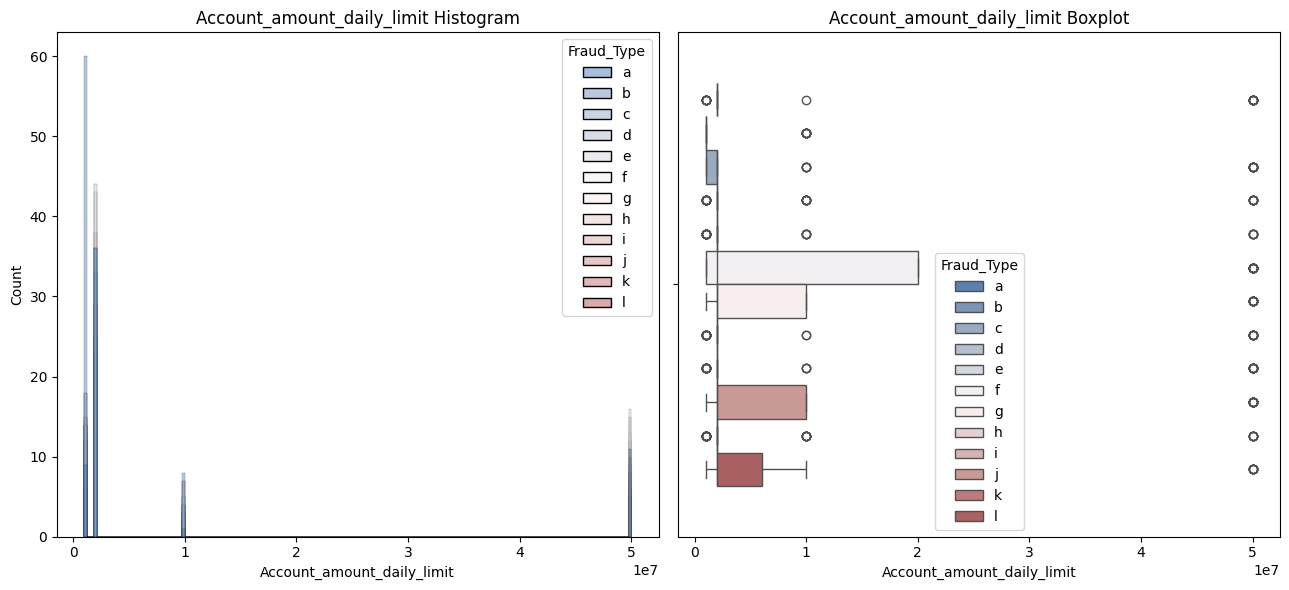

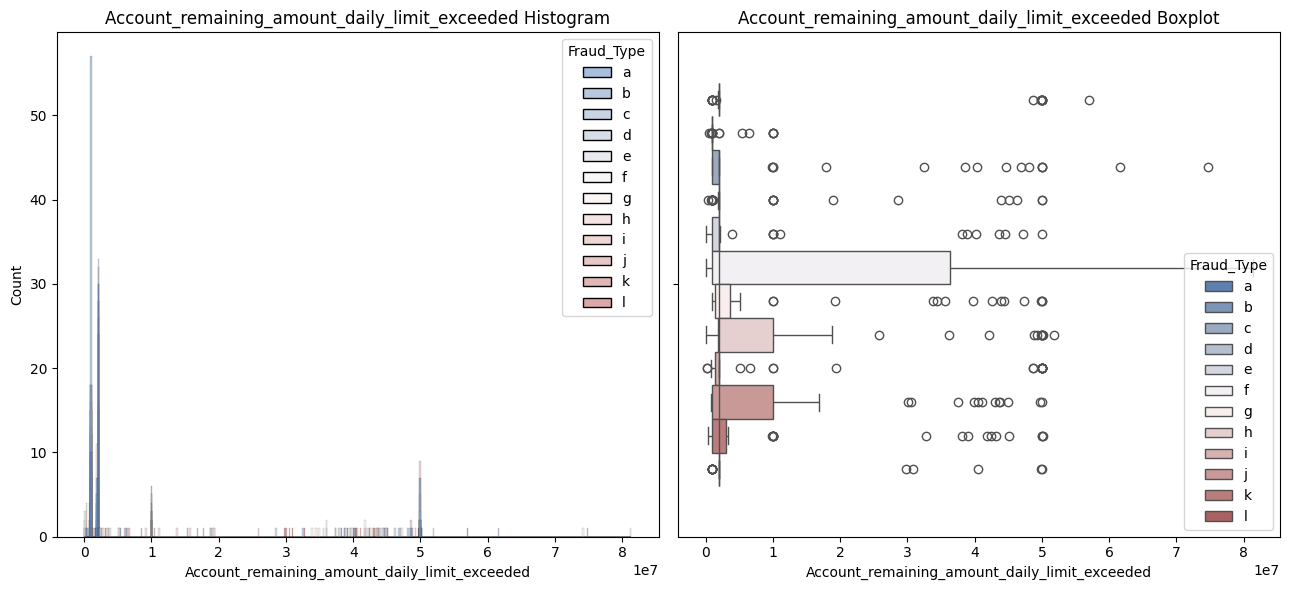

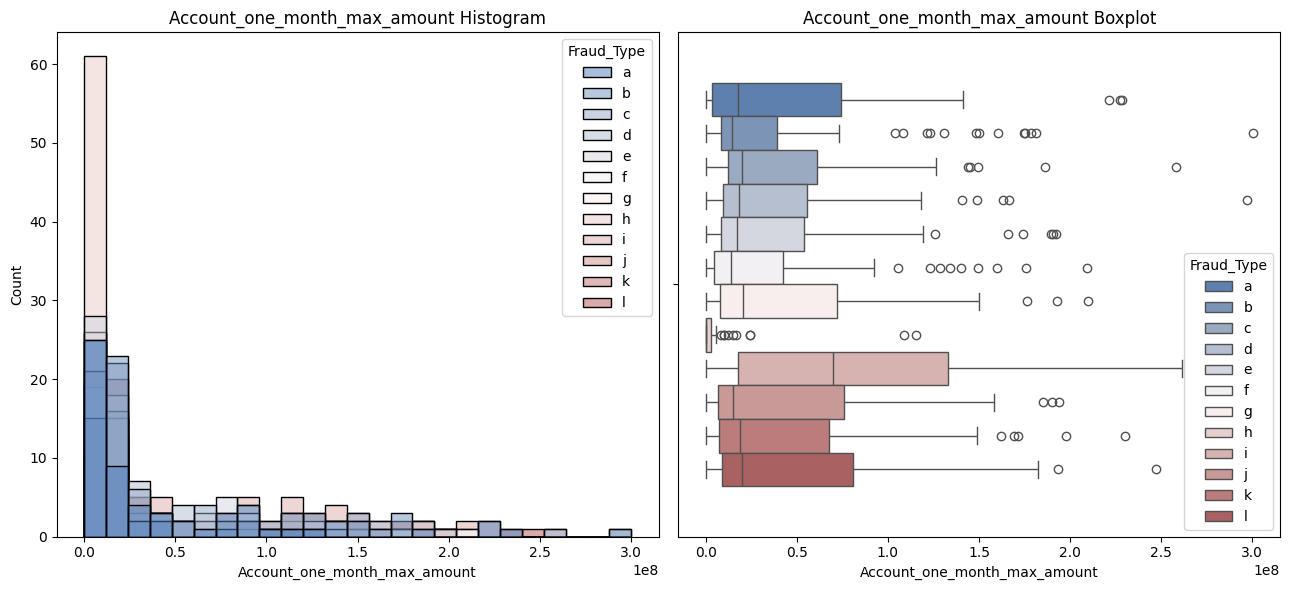

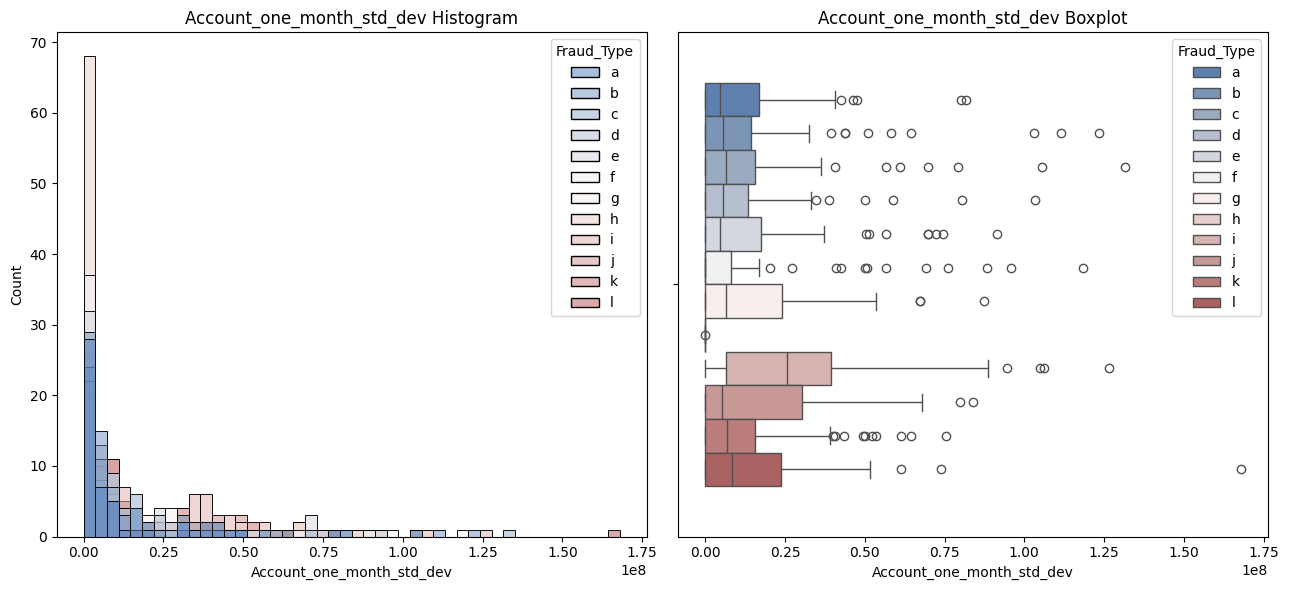

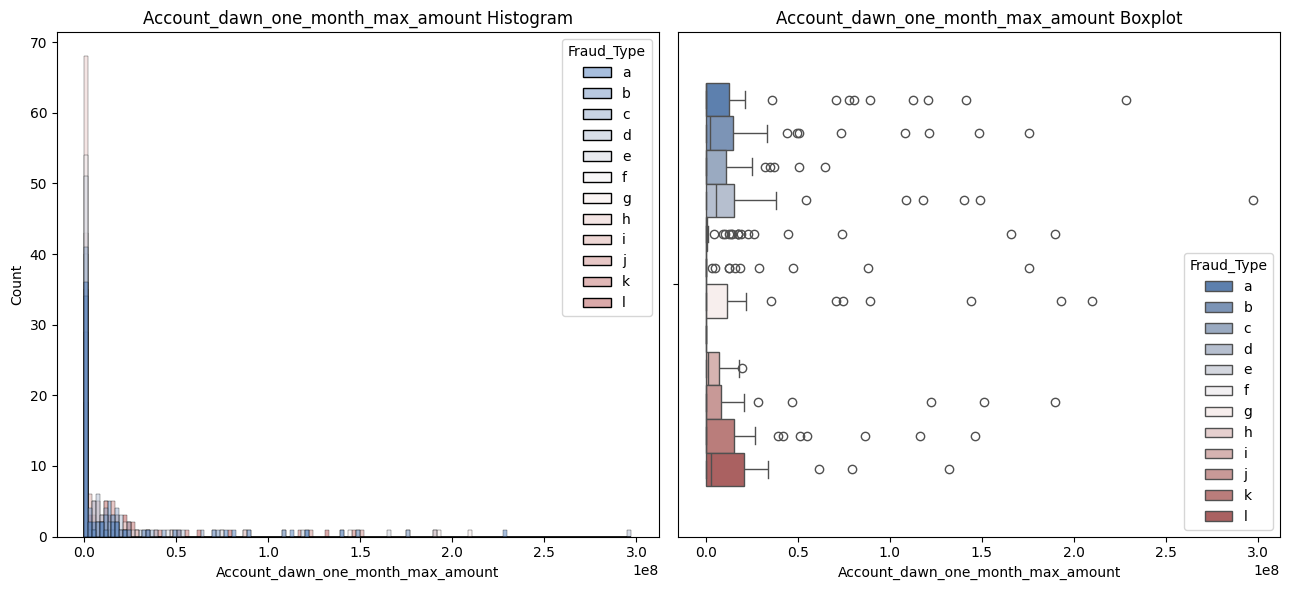

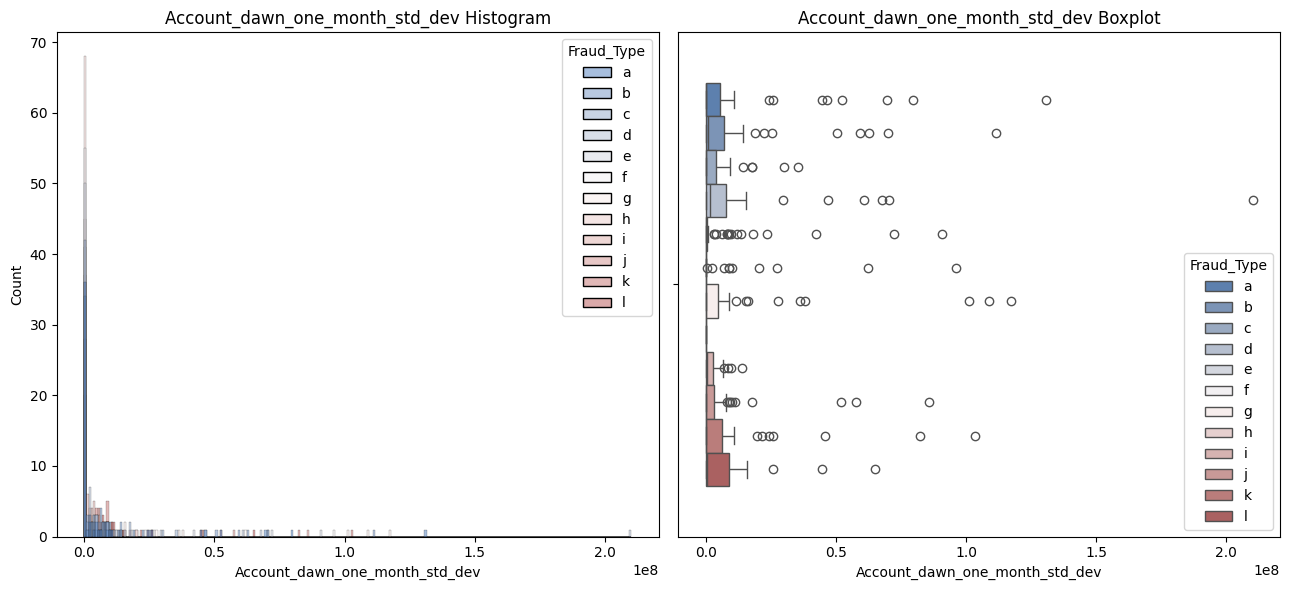

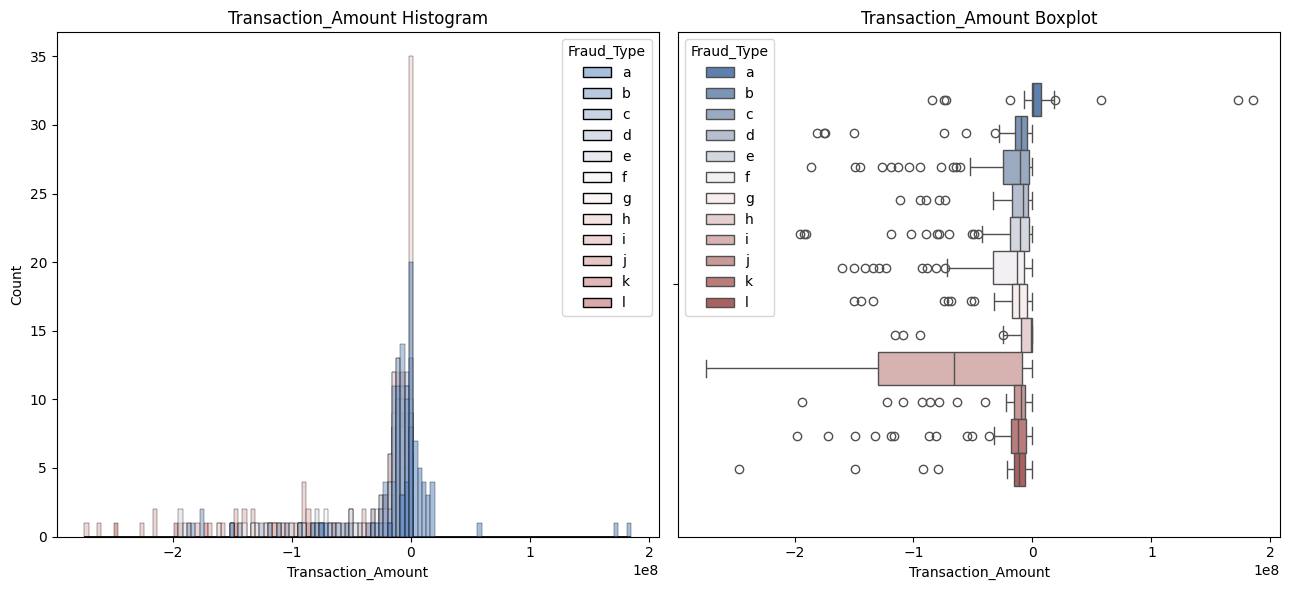

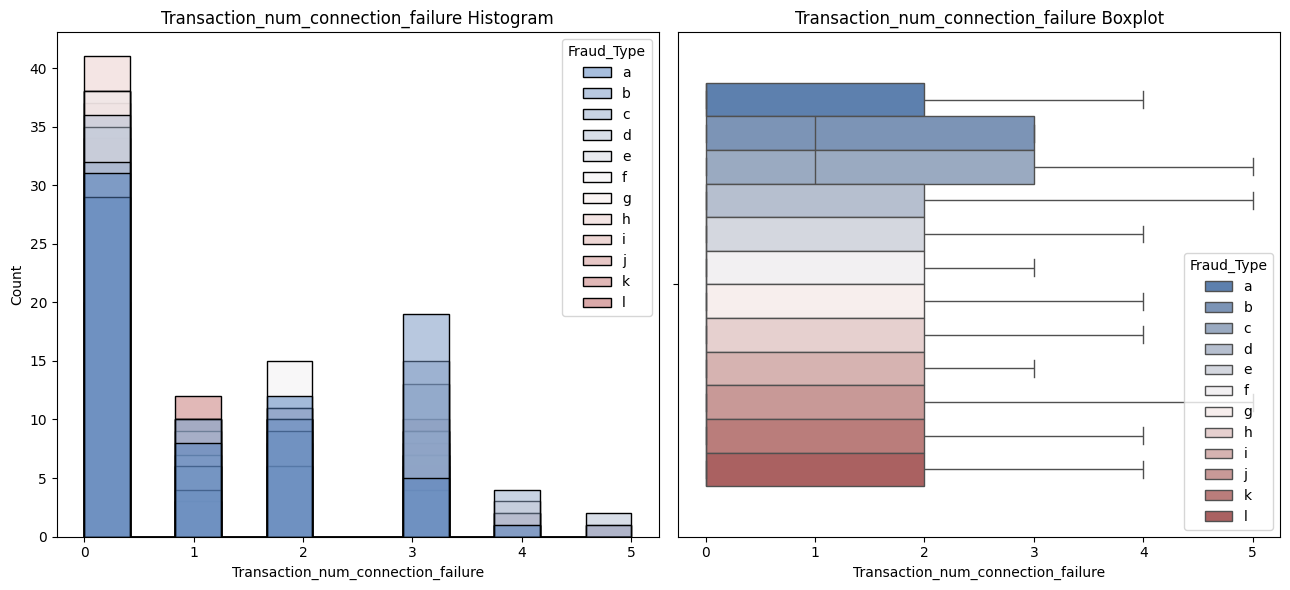

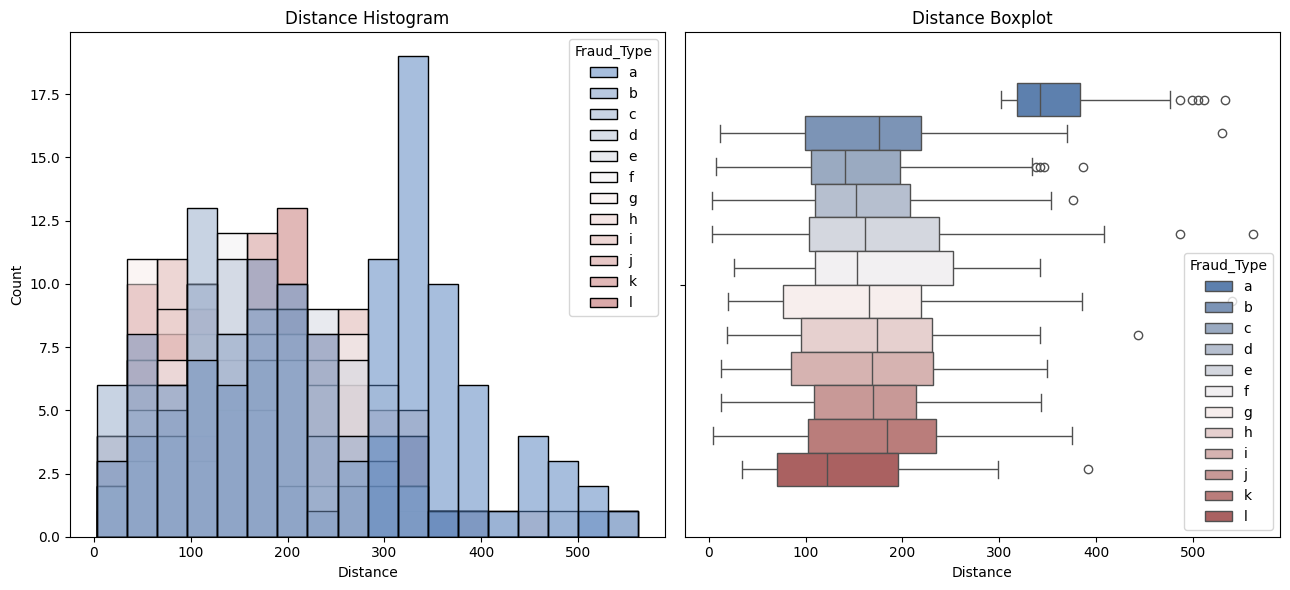

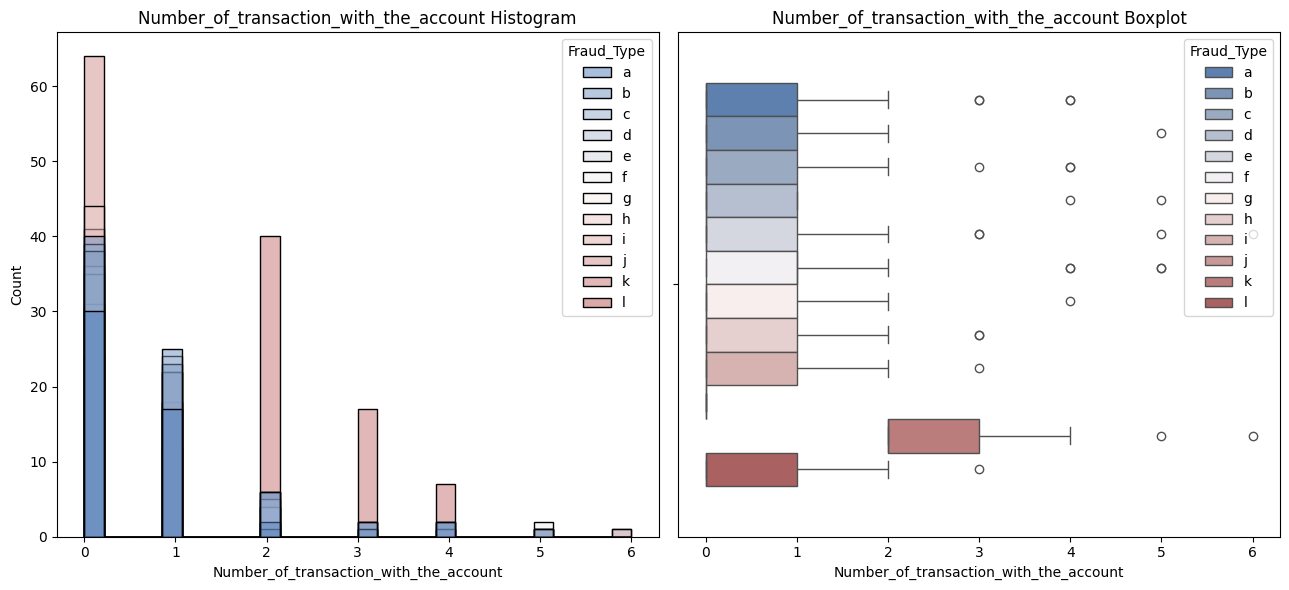

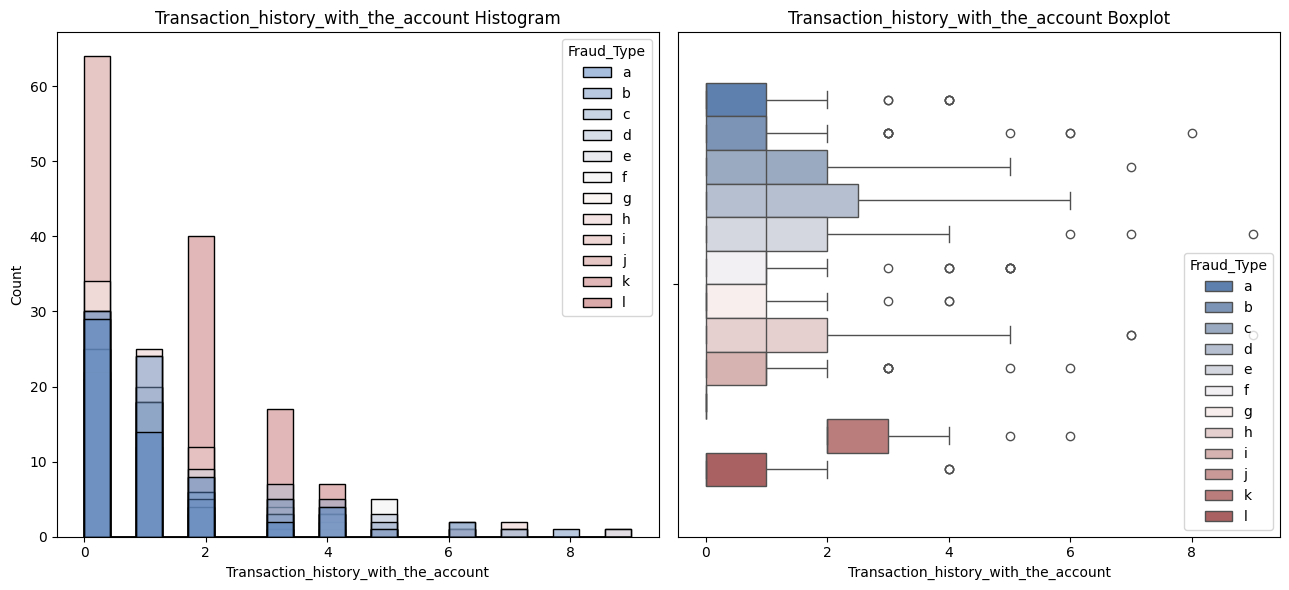

In [44]:
for column, col_type in zip(cond_all['항목명'], cond_all['데이터 형태']):

    if col_type == '수치형' and column != 'Time_difference':

       fig, ax = plt.subplots(ncols=2, figsize=(13, 6))

       sns.histplot(data=train_all_non_m,
                    x=column,
                    hue='Fraud_Type',
                    palette='vlag',
                    hue_order=hue_order,
                    ax=ax[0])
       ax[0].set_title(f'{column} Histogram')

       sns.boxplot(data=train_all_non_m,
                   x=column,
                   hue='Fraud_Type',
                   palette='vlag',
                    hue_order=hue_order,
                   ax=ax[1])
       ax[1].set_title(f'{column} Boxplot')

       plt.tight_layout()
       plt.show()

## 결측치 처리

In [45]:
# 각 열의 결측치 수와 비율 확인
missing_values = train_all.isnull().sum()
missing_percentage = (missing_values / len(train_all)) * 100

missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)
print(missing_data)

Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


In [47]:
# 수치형 열만 선택하여 결측치를 각 열의 평균으로 대체
numeric_columns = train_all.select_dtypes(include=[np.number]).columns
train_all[numeric_columns] = train_all[numeric_columns].fillna(train_all[numeric_columns].mean())

## 이상치 처리

In [48]:
# 수치형 열만 선택
numeric_columns = train_all.select_dtypes(include=[np.number]).columns

# IQR을 이용한 이상치 탐지
Q1 = train_all[numeric_columns].quantile(0.25)
Q3 = train_all[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# 이상치 확인
outliers = ((train_all[numeric_columns] < (Q1 - 1.5 * IQR)) | (train_all[numeric_columns] > (Q3 + 1.5 * IQR)))
print(outliers.sum())  # 각 열의 이상치 개수


Customer_Birthyear                                   0
Customer_flag_change_of_authentication_1         17364
Customer_flag_change_of_authentication_2          9250
Customer_flag_change_of_authentication_3         17312
Customer_flag_change_of_authentication_4          9385
Customer_rooting_jailbreak_indicator              5395
Customer_mobile_roaming_indicator                 2486
Customer_VPN_Indicator                            5469
Customer_flag_terminal_malicious_behavior_1       3806
Customer_flag_terminal_malicious_behavior_2       7155
Customer_flag_terminal_malicious_behavior_3       7189
Customer_flag_terminal_malicious_behavior_4       7184
Customer_flag_terminal_malicious_behavior_5       7260
Customer_flag_terminal_malicious_behavior_6      10722
Customer_inquery_atm_limit                       13492
Customer_increase_atm_limit                      13697
Account_initial_balance                           4917
Account_balance                                   5563
Account_in

In [49]:
# 수치형 열만 선택
numeric_columns = train_all.select_dtypes(include=[np.number]).columns

# 이상치를 각 열의 평균으로 대체
for column in numeric_columns:
    mean_value = train_all[column].mean()
    train_all[column] = np.where(outliers[column], mean_value, train_all[column])


## 중요도 확인

In [51]:
from sklearn.ensemble import ExtraTreesClassifier

# 타겟 변수를 제외한 나머지 변수를 선택
X = train_all.drop(columns=['Fraud_Type'])  # 'Fraud_Type'는 타겟 변수
y = train_all['Fraud_Type']

# 수치형 데이터만 선택
X_numeric = X.select_dtypes(include=[np.number])

# 모델 학습
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X_numeric, y)

# 변수 중요도 추출
importances = model.feature_importances_

# 중요도가 높은 순서로 변수 정렬
importance_df = pd.DataFrame({'Feature': X_numeric.columns, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# 중요도 출력
print(importance_df)


                                          Feature  Importance
27                             Transaction_Amount    0.098206
17                                Account_balance    0.079667
31                                       Distance    0.072039
23                   Account_one_month_max_amount    0.066630
0                              Customer_Birthyear    0.066433
16                        Account_initial_balance    0.065281
24                      Account_one_month_std_dev    0.051110
29             Transaction_num_connection_failure    0.043322
21  Account_remaining_amount_daily_limit_exceeded    0.041979
25              Account_dawn_one_month_max_amount    0.035706
26                 Account_dawn_one_month_std_dev    0.034760
37           Transaction_history_with_the_account    0.030187
35               Recipient_account_suspend_status    0.024873
36         Number_of_transaction_with_the_account    0.022258
1        Customer_flag_change_of_authentication_1    0.015788
19      

ML 사용할거면, 기준을 잡고 변수를 많이 줄여야 할 것 같은데..


In [52]:
train_all['Transaction_Datetime']

0       2003-01-25 22:20:34
1       2003-01-31 02:22:42
2       2003-01-31 10:20:12
3       2003-01-31 13:14:01
4       2003-01-31 15:22:26
                ...        
74819   2024-08-04 23:39:47
74820   2024-08-04 23:49:53
74821   2024-08-05 01:45:07
74822   2024-08-05 01:54:01
74823   2024-08-05 05:55:09
Name: Transaction_Datetime, Length: 74824, dtype: datetime64[ns]

## 파생변수 - 시간대

In [57]:
def categorize_time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'  # 아침
    elif 12 <= hour < 17:
        return 'Afternoon'  # 오후
    elif 17 <= hour < 21:
        return 'Evening'  # 저녁
    elif 21 <= hour or 1 <= hour < 6:
        return 'Night'  # 밤

# 시간대별로 구분된 새로운 열 생성
train_all['Time_of_Day'] = train_all['Transaction_Datetime'].dt.hour.apply(categorize_time_of_day)

# 결과 확인
print(train_all[['Transaction_Datetime', 'Time_of_Day']].head())


  Transaction_Datetime Time_of_Day
0  2003-01-25 22:20:34       Night
1  2003-01-31 02:22:42       Night
2  2003-01-31 10:20:12     Morning
3  2003-01-31 13:14:01   Afternoon
4  2003-01-31 15:22:26   Afternoon


## 파생변수 - 거래 시간 간격 변수

In [62]:
train_all['Transaction_Datetime'] = pd.to_datetime(train_all['Transaction_Datetime'])

# 거래를 고객별로 정렬 (가정: 'Customer_ID'가 고객을 식별하는 열)
train_all = train_all.sort_values(by=['Customer_identification_number', 'Transaction_Datetime'])

# 이전 거래 시간과의 차이 계산
train_all['Time_Diff'] = train_all.groupby('Customer_identification_number')['Transaction_Datetime'].diff()

# 결과 확인
print(train_all[['Customer_identification_number', 'Transaction_Datetime', 'Time_Diff']].head(10))

      Customer_identification_number Transaction_Datetime          Time_Diff
17903                 AAZPCi-hggJtmF  2011-07-25 17:00:00                NaT
31945                 AAZPCi-hggJtmF  2014-09-27 05:10:23 1159 days 12:10:23
31967                 AAZPCi-hggJtmF  2014-09-29 08:38:10    2 days 03:27:47
45372                 AAZPCi-hggJtmF  2017-10-20 09:46:59 1117 days 01:08:49
54432                 AAZPCi-hggJtmF  2019-11-19 14:22:06  760 days 04:35:07
63573                 AAZPCi-hggJtmF  2021-12-28 18:15:01  770 days 03:52:55
68084                 AAZPCi-hggJtmF  2023-01-06 03:09:23  373 days 08:54:22
68170                 AAZPCi-hggJtmF  2023-01-14 01:13:46    7 days 22:04:23
37613                 AAcfgr-zQRmHQi  2016-01-11 03:31:58                NaT
37712                 AAcfgr-zQRmHQi  2016-01-19 10:20:48    8 days 06:48:50
